Dla małych instancji (N=10, 11) porównujemy wartości miar z wartościami uzyskanymi z przeglądu zupełnego tych instancji.
Porównujemy błąd. Sprawdzamy czy istnieje korelacja między rodzajem instancji i poziomem błędu oraz typem próbkowania i poziomem błędu.

In [76]:
import pandas as pd
from IPython.display import display_markdown

instances = [
    # ("../stat_results/twophasel/per100/cliques_6_snowball_stats.csv", "../stat_results/exhaustive/cliques_6_exhaustive_stats.csv", 6, "snowball", "cliques"),
    ("../stat_results/snowball/per1/cliques_7_snowball_stats.csv", "../stat_results/exhaustive/cliques_7_exhaustive_stats.csv", 7, "snowball", "cliques"),
    ("../stat_results/snowball/per1/cliques_8_snowball_stats.csv", "../stat_results/exhaustive/cliques_8_exhaustive_stats.csv", 8, "snowball", "cliques"),
    ("../stat_results/snowball/per1/cliques_9_snowball_stats.csv", "../stat_results/exhaustive/cliques_9_exhaustive_stats.csv", 9, "snowball", "cliques"),
    ("../stat_results/snowball/per1/cliques_10_snowball_stats.csv", "../stat_results/exhaustive/cliques_10_exhaustive_stats.csv", 10, "snowball", "cliques"),
    ("../stat_results/snowball/per1/cliques_11_snowball_stats.csv", "../stat_results/exhaustive/cliques_11_exhaustive_stats.csv", 11, "snowball", "cliques"),

    # ("../stat_results/snowball/per100/grid_6_snowball_stats.csv", "../stat_results/exhaustive/grid_6_exhaustive_stats.csv", 6, "snowball", "grid"),
    ("../stat_results/snowball/per1/grid_7_snowball_stats.csv", "../stat_results/exhaustive/grid_7_exhaustive_stats.csv", 7, "snowball", "grid"),
    ("../stat_results/snowball/per1/grid_8_snowball_stats.csv", "../stat_results/exhaustive/grid_8_exhaustive_stats.csv", 8, "snowball", "grid"),
    ("../stat_results/snowball/per1/grid_9_snowball_stats.csv", "../stat_results/exhaustive/grid_9_exhaustive_stats.csv", 9, "snowball", "grid"),
    ("../stat_results/snowball/per1/grid_10_snowball_stats.csv", "../stat_results/exhaustive/grid_10_exhaustive_stats.csv", 10, "snowball", "grid"),
    ("../stat_results/snowball/per1/grid_11_snowball_stats.csv", "../stat_results/exhaustive/grid_11_exhaustive_stats.csv", 11, "snowball", "grid"),

    # ("../stat_results/snowball/per100/uniform_6_snowball_stats.csv", "../stat_results/exhaustive/uniform_6_exhaustive_stats.csv", 6, "snowball", "uniform"),
    ("../stat_results/snowball/per1/uniform_7_snowball_stats.csv", "../stat_results/exhaustive/uniform_7_exhaustive_stats.csv", 7, "snowball", "uniform"),
    ("../stat_results/snowball/per1/uniform_8_snowball_stats.csv", "../stat_results/exhaustive/uniform_8_exhaustive_stats.csv", 8, "snowball", "uniform"),
    ("../stat_results/snowball/per1/uniform_9_snowball_stats.csv", "../stat_results/exhaustive/uniform_9_exhaustive_stats.csv", 9, "snowball", "uniform"),
    ("../stat_results/snowball/per1/uniform_10_snowball_stats.csv", "../stat_results/exhaustive/uniform_10_exhaustive_stats.csv", 10, "snowball", "uniform"),
    ("../stat_results/snowball/per1/uniform_11_snowball_stats.csv", "../stat_results/exhaustive/uniform_11_exhaustive_stats.csv", 11, "snowball", "uniform"),
]

instances = pd.DataFrame(instances, columns=["path", "gt", "size", "sampling", "type"])

dfs = {}

#Load data
for index, ins in instances.iterrows():
    fname, gt = ins[0], ins[1]
    with open(fname) as f:
        with open(gt) as gt:
            sdf = pd.read_csv(f, delimiter=';')
            gdf = pd.read_csv(gt, delimiter = ';')
            dfs[fname] = (sdf, gdf)


cmp_results = {}

header = ["metric", "sampled", "exhaustive", "abs_diff", "rel_diff"]

for key in dfs:
    results = pd.DataFrame(columns = header)

    (sampled, gt) = dfs[key]
    columns = list(sampled.columns.values)

    for column in columns[4:]:
        (s, t) = sampled.loc[sampled.index[-1],column], gt.loc[0,column]
        diff = abs(s - t)
        diff_rel = (abs(s-t) / t) * 100.0

        newrow = [column, s, t, diff, diff_rel]
        results.loc[len(results)] = newrow


    cmp_results[key] = results


absdiffdict = {}
reldiffdict = {}

types = ["uniform", "grid", "cliques"]

firstkey = list(dfs)[0]
columns = ["file"] + list(dfs[firstkey][0].columns.values)[4:]

for t in types:
    filtered = instances.query("type == @t")
    absdiffs = pd.DataFrame(columns = columns)
    reldiffs = pd.DataFrame(columns = columns)

    for index, ins in filtered.iterrows():
        key = ins[0]
        abs_diffs = [key] + list(cmp_results[key]["abs_diff"])
        rdiffs = [key] + list(cmp_results[key]["rel_diff"])
        absdiffs.loc[len(absdiffs)] = abs_diffs
        reldiffs.loc[len(reldiffs)] = rdiffs
                 
    # absdiffs.loc['mean'] = absdiffs.mean(numeric_only=True)
    # absdiffs.loc['std'] = absdiffs.std(numeric_only=True)
    # reldiffs.loc['mean'] = reldiffs.mean(numeric_only=True)
    # reldiffs.loc['std'] = reldiffs.std(numeric_only=True)

    absdiffdict[t] = absdiffs
    reldiffdict[t] = reldiffs


absdiffdict_st = {}
reldiffdict_st = {}

sampling = ["snowball", "twophase"]

for s in sampling:
    filtered = instances.query("sampling == @s")
    absdiffs = pd.DataFrame(columns = columns)
    reldiffs = pd.DataFrame(columns = columns)

    for index, ins in filtered.iterrows():
        key = ins[0]
        abs_diffs = [key] + list(cmp_results[key]["abs_diff"])
        rdiffs = [key] + list(cmp_results[key]["rel_diff"])
        absdiffs.loc[len(absdiffs)] = abs_diffs
        reldiffs.loc[len(reldiffs)] = rdiffs
                 
    # absdiffs.loc['mean'] = absdiffs.mean(numeric_only=True)
    # absdiffs.loc['std'] = absdiffs.std(numeric_only=True)
    # reldiffs.loc['mean'] = reldiffs.mean(numeric_only=True)
    # reldiffs.loc['std'] = reldiffs.std(numeric_only=True)

    absdiffdict_st[s] = absdiffs
    reldiffdict_st[s] = reldiffs
        

In [77]:
for key in cmp_results:
    print("Instance:", key)
    display_markdown(cmp_results[key].to_markdown(), raw=True)

Instance: ../stat_results/snowball/per1/cliques_7_snowball_stats.csv


|    | metric              |          sampled |   exhaustive |       abs_diff |    rel_diff |
|---:|:--------------------|-----------------:|-------------:|---------------:|------------:|
|  0 | node_count          |      2           |    2         |      0         |      0      |
|  1 | edge_count          |      4           |    4         |      0         |      0      |
|  2 | num_subsinks        |      2           |    2         |      0         |      0      |
|  3 | edge_to_node        |      2           |    2         |      0         |      0      |
|  4 | avg_fitness         |   2401           | 2401         |      0         |      0      |
|  5 | distLO              |      7.03933e-06 |    0.0210145 |      0.0210075 |     99.9665 |
|  6 | conrel              |      1           |    1         |      0         |      0      |
|  7 | avg_loop_weight     | 416689           |  115         | 416574         | 362238      |
|  8 | go_path_ratio       |      0.5         |    0.5       |      0         |      0      |
|  9 | avg_go_path_len     |      1           |    1         |      0         |      0      |
| 10 | max_go_path_len     |      1           |    1         |      0         |      0      |
| 11 | num_sinks           |      2           |    2         |      0         |      0      |
| 12 | num_sources         |      2           |    2         |      0         |      0      |
| 13 | funnel_num          |      2           |    2         |      0         |      0      |
| 14 | mean_funnel_size    |      1           |    1         |      0         |      0      |
| 15 | max_funnel_size     |      1           |    1         |      0         |      0      |
| 16 | max_out_degree      |      1           |    1         |      0         |      0      |
| 17 | avg_out_degree      |      1           |    1         |      0         |      0      |
| 18 | max_in_degree       |      1           |    1         |      0         |      0      |
| 19 | avg_in_degree       |      1           |    1         |      0         |      0      |
| 20 | assortativity_deg   |    nan           |  nan         |    nan         |    nan      |
| 21 | density             |      2           |    2         |      0         |      0      |
| 22 | num_cc              |      1           |    1         |      0         |      0      |
| 23 | largest_cc          |      2           |    2         |      0         |      0      |
| 24 | largest_cc_radius   |      1           |    1         |      0         |      0      |
| 25 | avg_path_len        |      1           |    1         |      0         |      0      |
| 26 | cliques_num         |      3           |    3         |      0         |      0      |
| 27 | maximal_cliques_num |      1           |    1         |      0         |      0      |
| 28 | largest_clique_size |      2           |    2         |      0         |      0      |
| 29 | reciprocity         |      1           |    1         |      0         |      0      |

Instance: ../stat_results/snowball/per1/cliques_8_snowball_stats.csv


|    | metric              |          sampled |   exhaustive |     abs_diff |   rel_diff |
|---:|:--------------------|-----------------:|-------------:|-------------:|-----------:|
|  0 | node_count          |      4           |    4         |      0       |      0     |
|  1 | edge_count          |     16           |   16         |      0       |      0     |
|  2 | num_subsinks        |      2           |    2         |      0       |      0     |
|  3 | edge_to_node        |      4           |    4         |      0       |      0     |
|  4 | avg_fitness         |   1718           | 1718         |      0       |      0     |
|  5 | distLO              |      5.82296e-05 |    0.0150483 |      0.01499 |     99.613 |
|  6 | conrel              |      3           |    3         |      0       |      0     |
|  7 | avg_loop_weight     | 189042           |  173.25      | 188869       | 109015     |
|  8 | go_path_ratio       |      0.75        |    0.75      |      0       |      0     |
|  9 | avg_go_path_len     |      1           |    1         |      0       |      0     |
| 10 | max_go_path_len     |      1           |    1         |      0       |      0     |
| 11 | num_sinks           |      2           |    2         |      0       |      0     |
| 12 | num_sources         |      2           |    2         |      0       |      0     |
| 13 | funnel_num          |      2           |    2         |      0       |      0     |
| 14 | mean_funnel_size    |      3           |    3         |      0       |      0     |
| 15 | max_funnel_size     |      3           |    3         |      0       |      0     |
| 16 | max_out_degree      |      3           |    3         |      0       |      0     |
| 17 | avg_out_degree      |      3           |    3         |      0       |      0     |
| 18 | max_in_degree       |      3           |    3         |      0       |      0     |
| 19 | avg_in_degree       |      3           |    3         |      0       |      0     |
| 20 | assortativity_deg   |    nan           |  nan         |    nan       |    nan     |
| 21 | density             |      1.33333     |    1.33333   |      0       |      0     |
| 22 | num_cc              |      1           |    1         |      0       |      0     |
| 23 | largest_cc          |      4           |    4         |      0       |      0     |
| 24 | largest_cc_radius   |      1           |    1         |      0       |      0     |
| 25 | avg_path_len        |      1           |    1         |      0       |      0     |
| 26 | cliques_num         |     15           |   15         |      0       |      0     |
| 27 | maximal_cliques_num |      1           |    1         |      0       |      0     |
| 28 | largest_clique_size |      4           |    4         |      0       |      0     |
| 29 | reciprocity         |      1           |    1         |      0       |      0     |

Instance: ../stat_results/snowball/per1/cliques_9_snowball_stats.csv


|    | metric              |          sampled |    exhaustive |        abs_diff |    rel_diff |
|---:|:--------------------|-----------------:|--------------:|----------------:|------------:|
|  0 | node_count          |      2           |    2          |      0          |      0      |
|  1 | edge_count          |      4           |    4          |      0          |      0      |
|  2 | num_subsinks        |      2           |    2          |      0          |      0      |
|  3 | edge_to_node        |      2           |    2          |      0          |      0      |
|  4 | avg_fitness         |   1458           | 1458          |      0          |      0      |
|  5 | distLO              |      1.34903e-05 |    0.00807057 |      0.00805708 |     99.8328 |
|  6 | conrel              |      1           |    1          |      0          |      0      |
|  7 | avg_loop_weight     | 455242           |  444          | 454798          | 102432      |
|  8 | go_path_ratio       |      0.5         |    0.5        |      0          |      0      |
|  9 | avg_go_path_len     |      1           |    1          |      0          |      0      |
| 10 | max_go_path_len     |      1           |    1          |      0          |      0      |
| 11 | num_sinks           |      2           |    2          |      0          |      0      |
| 12 | num_sources         |      2           |    2          |      0          |      0      |
| 13 | funnel_num          |      2           |    2          |      0          |      0      |
| 14 | mean_funnel_size    |      1           |    1          |      0          |      0      |
| 15 | max_funnel_size     |      1           |    1          |      0          |      0      |
| 16 | max_out_degree      |      1           |    1          |      0          |      0      |
| 17 | avg_out_degree      |      1           |    1          |      0          |      0      |
| 18 | max_in_degree       |      1           |    1          |      0          |      0      |
| 19 | avg_in_degree       |      1           |    1          |      0          |      0      |
| 20 | assortativity_deg   |    nan           |  nan          |    nan          |    nan      |
| 21 | density             |      2           |    2          |      0          |      0      |
| 22 | num_cc              |      1           |    1          |      0          |      0      |
| 23 | largest_cc          |      2           |    2          |      0          |      0      |
| 24 | largest_cc_radius   |      1           |    1          |      0          |      0      |
| 25 | avg_path_len        |      1           |    1          |      0          |      0      |
| 26 | cliques_num         |      3           |    3          |      0          |      0      |
| 27 | maximal_cliques_num |      1           |    1          |      0          |      0      |
| 28 | largest_clique_size |      2           |    2          |      0          |      0      |
| 29 | reciprocity         |      1           |    1          |      0          |      0      |

Instance: ../stat_results/snowball/per1/cliques_10_snowball_stats.csv


|    | metric              |          sampled |   exhaustive |       abs_diff |   rel_diff |
|---:|:--------------------|-----------------:|-------------:|---------------:|-----------:|
|  0 | node_count          |      4           |    4         |      0         |      0     |
|  1 | edge_count          |     16           |   16         |      0         |      0     |
|  2 | num_subsinks        |      2           |    2         |      0         |      0     |
|  3 | edge_to_node        |      4           |    4         |      0         |      0     |
|  4 | avg_fitness         |   3356.5         | 3356.5       |      0         |      0     |
|  5 | distLO              |      0.000141595 |    0.0200838 |      0.0199422 |     99.295 |
|  6 | conrel              |      3           |    3         |      0         |      0     |
|  7 | avg_loop_weight     | 207770           |  643.25      | 207127         |  32200     |
|  8 | go_path_ratio       |      0.75        |    0.75      |      0         |      0     |
|  9 | avg_go_path_len     |      1           |    1         |      0         |      0     |
| 10 | max_go_path_len     |      1           |    1         |      0         |      0     |
| 11 | num_sinks           |      2           |    2         |      0         |      0     |
| 12 | num_sources         |      2           |    2         |      0         |      0     |
| 13 | funnel_num          |      2           |    2         |      0         |      0     |
| 14 | mean_funnel_size    |      3           |    3         |      0         |      0     |
| 15 | max_funnel_size     |      3           |    3         |      0         |      0     |
| 16 | max_out_degree      |      3           |    3         |      0         |      0     |
| 17 | avg_out_degree      |      3           |    3         |      0         |      0     |
| 18 | max_in_degree       |      3           |    3         |      0         |      0     |
| 19 | avg_in_degree       |      3           |    3         |      0         |      0     |
| 20 | assortativity_deg   |    nan           |  nan         |    nan         |    nan     |
| 21 | density             |      1.33333     |    1.33333   |      0         |      0     |
| 22 | num_cc              |      1           |    1         |      0         |      0     |
| 23 | largest_cc          |      4           |    4         |      0         |      0     |
| 24 | largest_cc_radius   |      1           |    1         |      0         |      0     |
| 25 | avg_path_len        |      1           |    1         |      0         |      0     |
| 26 | cliques_num         |     15           |   15         |      0         |      0     |
| 27 | maximal_cliques_num |      1           |    1         |      0         |      0     |
| 28 | largest_clique_size |      4           |    4         |      0         |      0     |
| 29 | reciprocity         |      1           |    1         |      0         |      0     |

Instance: ../stat_results/snowball/per1/cliques_11_snowball_stats.csv


|    | metric              |          sampled |   exhaustive |       abs_diff |   rel_diff |
|---:|:--------------------|-----------------:|-------------:|---------------:|-----------:|
|  0 | node_count          |      6           |    6         |      0         |     0      |
|  1 | edge_count          |     36           |   36         |      0         |     0      |
|  2 | num_subsinks        |      2           |    2         |      0         |     0      |
|  3 | edge_to_node        |      6           |    6         |      0         |     0      |
|  4 | avg_fitness         |    991.667       |  991.667     |      0         |     0      |
|  5 | distLO              |      0.000147933 |    0.0114416 |      0.0112936 |    98.7071 |
|  6 | conrel              |      5           |    5         |      0         |     0      |
|  7 | avg_loop_weight     | 138070           |  981.333     | 137089         | 13969.7    |
|  8 | go_path_ratio       |      0.833333    |    0.833333  |      0         |     0      |
|  9 | avg_go_path_len     |      1           |    1         |      0         |     0      |
| 10 | max_go_path_len     |      1           |    1         |      0         |     0      |
| 11 | num_sinks           |      2           |    2         |      0         |     0      |
| 12 | num_sources         |      4           |    4         |      0         |     0      |
| 13 | funnel_num          |      2           |    2         |      0         |     0      |
| 14 | mean_funnel_size    |      5           |    5         |      0         |     0      |
| 15 | max_funnel_size     |      5           |    5         |      0         |     0      |
| 16 | max_out_degree      |      5           |    5         |      0         |     0      |
| 17 | avg_out_degree      |      5           |    5         |      0         |     0      |
| 18 | max_in_degree       |      5           |    5         |      0         |     0      |
| 19 | avg_in_degree       |      5           |    5         |      0         |     0      |
| 20 | assortativity_deg   |    nan           |  nan         |    nan         |   nan      |
| 21 | density             |      1.2         |    1.2       |      0         |     0      |
| 22 | num_cc              |      1           |    1         |      0         |     0      |
| 23 | largest_cc          |      6           |    6         |      0         |     0      |
| 24 | largest_cc_radius   |      1           |    1         |      0         |     0      |
| 25 | avg_path_len        |      1           |    1         |      0         |     0      |
| 26 | cliques_num         |     63           |   63         |      0         |     0      |
| 27 | maximal_cliques_num |      1           |    1         |      0         |     0      |
| 28 | largest_clique_size |      6           |    6         |      0         |     0      |
| 29 | reciprocity         |      1           |    1         |      0         |     0      |

Instance: ../stat_results/snowball/per1/grid_7_snowball_stats.csv


|    | metric              |          sampled |   exhaustive |       abs_diff |    rel_diff |
|---:|:--------------------|-----------------:|-------------:|---------------:|------------:|
|  0 | node_count          |      2           |    2         |      0         |      0      |
|  1 | edge_count          |      4           |    4         |      0         |      0      |
|  2 | num_subsinks        |      2           |    2         |      0         |      0      |
|  3 | edge_to_node        |      2           |    2         |      0         |      0      |
|  4 | avg_fitness         |    741           |  741         |      0         |      0      |
|  5 | distLO              |      6.96427e-06 |    0.0185592 |      0.0185523 |     99.9625 |
|  6 | conrel              |      1           |    1         |      0         |      0      |
|  7 | avg_loop_weight     | 420026           |  113.5       | 419912         | 369967      |
|  8 | go_path_ratio       |      0.5         |    0.5       |      0         |      0      |
|  9 | avg_go_path_len     |      1           |    1         |      0         |      0      |
| 10 | max_go_path_len     |      1           |    1         |      0         |      0      |
| 11 | num_sinks           |      2           |    2         |      0         |      0      |
| 12 | num_sources         |      2           |    2         |      0         |      0      |
| 13 | funnel_num          |      2           |    2         |      0         |      0      |
| 14 | mean_funnel_size    |      1           |    1         |      0         |      0      |
| 15 | max_funnel_size     |      1           |    1         |      0         |      0      |
| 16 | max_out_degree      |      1           |    1         |      0         |      0      |
| 17 | avg_out_degree      |      1           |    1         |      0         |      0      |
| 18 | max_in_degree       |      1           |    1         |      0         |      0      |
| 19 | avg_in_degree       |      1           |    1         |      0         |      0      |
| 20 | assortativity_deg   |    nan           |  nan         |    nan         |    nan      |
| 21 | density             |      2           |    2         |      0         |      0      |
| 22 | num_cc              |      1           |    1         |      0         |      0      |
| 23 | largest_cc          |      2           |    2         |      0         |      0      |
| 24 | largest_cc_radius   |      1           |    1         |      0         |      0      |
| 25 | avg_path_len        |      1           |    1         |      0         |      0      |
| 26 | cliques_num         |      3           |    3         |      0         |      0      |
| 27 | maximal_cliques_num |      1           |    1         |      0         |      0      |
| 28 | largest_clique_size |      2           |    2         |      0         |      0      |
| 29 | reciprocity         |      1           |    1         |      0         |      0      |

Instance: ../stat_results/snowball/per1/grid_8_snowball_stats.csv


|    | metric              |          sampled |   exhaustive |       abs_diff |    rel_diff |
|---:|:--------------------|-----------------:|-------------:|---------------:|------------:|
|  0 | node_count          |      2           |    2         |      0         |      0      |
|  1 | edge_count          |      4           |    4         |      0         |      0      |
|  2 | num_subsinks        |      2           |    2         |      0         |      0      |
|  3 | edge_to_node        |      2           |    2         |      0         |      0      |
|  4 | avg_fitness         |    800           |  800         |      0         |      0      |
|  5 | distLO              |      1.05904e-05 |    0.0131354 |      0.0131248 |     99.9194 |
|  6 | conrel              |      1           |    1         |      0         |      0      |
|  7 | avg_loop_weight     | 446569           |  245         | 446324         | 182173      |
|  8 | go_path_ratio       |      0.5         |    0.5       |      0         |      0      |
|  9 | avg_go_path_len     |      1           |    1         |      0         |      0      |
| 10 | max_go_path_len     |      1           |    1         |      0         |      0      |
| 11 | num_sinks           |      2           |    2         |      0         |      0      |
| 12 | num_sources         |      2           |    2         |      0         |      0      |
| 13 | funnel_num          |      2           |    2         |      0         |      0      |
| 14 | mean_funnel_size    |      1           |    1         |      0         |      0      |
| 15 | max_funnel_size     |      1           |    1         |      0         |      0      |
| 16 | max_out_degree      |      1           |    1         |      0         |      0      |
| 17 | avg_out_degree      |      1           |    1         |      0         |      0      |
| 18 | max_in_degree       |      1           |    1         |      0         |      0      |
| 19 | avg_in_degree       |      1           |    1         |      0         |      0      |
| 20 | assortativity_deg   |    nan           |  nan         |    nan         |    nan      |
| 21 | density             |      2           |    2         |      0         |      0      |
| 22 | num_cc              |      1           |    1         |      0         |      0      |
| 23 | largest_cc          |      2           |    2         |      0         |      0      |
| 24 | largest_cc_radius   |      1           |    1         |      0         |      0      |
| 25 | avg_path_len        |      1           |    1         |      0         |      0      |
| 26 | cliques_num         |      3           |    3         |      0         |      0      |
| 27 | maximal_cliques_num |      1           |    1         |      0         |      0      |
| 28 | largest_clique_size |      2           |    2         |      0         |      0      |
| 29 | reciprocity         |      1           |    1         |      0         |      0      |

Instance: ../stat_results/snowball/per1/grid_9_snowball_stats.csv


|    | metric              |        sampled |    exhaustive |      abs_diff |   rel_diff |
|---:|:--------------------|---------------:|--------------:|--------------:|-----------:|
|  0 | node_count          |    16          |    16         |     0         |     0      |
|  1 | edge_count          |   238          |   238         |     0         |     0      |
|  2 | num_subsinks        |    16          |    16         |     0         |     0      |
|  3 | edge_to_node        |    14.875      |    14.875     |     0         |     0      |
|  4 | avg_fitness         |   941          |   941         |     0         |     0      |
|  5 | distLO              |     0.00113261 |     0.0538511 |     0.0527185 |    97.8968 |
|  6 | conrel              |    15          |    15         |     0         |     0      |
|  7 | avg_loop_weight     | 30005.4        |   234.125     | 29771.3       | 12716      |
|  8 | go_path_ratio       |     0.9375     |     0.9375    |     0         |     0      |
|  9 | avg_go_path_len     |     1          |     1         |     0         |     0      |
| 10 | max_go_path_len     |     1          |     1         |     0         |     0      |
| 11 | num_sinks           |    16          |    16         |     0         |     0      |
| 12 | num_sources         |    16          |    16         |     0         |     0      |
| 13 | funnel_num          |    16          |    16         |     0         |     0      |
| 14 | mean_funnel_size    |     1          |     1         |     0         |     0      |
| 15 | max_funnel_size     |     1          |     1         |     0         |     0      |
| 16 | max_out_degree      |    15          |    15         |     0         |     0      |
| 17 | avg_out_degree      |    13.875      |    13.875     |     0         |     0      |
| 18 | max_in_degree       |    15          |    15         |     0         |     0      |
| 19 | avg_in_degree       |    13.875      |    13.875     |     0         |     0      |
| 20 | assortativity_deg   |    -0.105      |    -0.105     |     0         |    -0      |
| 21 | density             |     0.991667   |     0.991667  |     0         |     0      |
| 22 | num_cc              |     1          |     1         |     0         |     0      |
| 23 | largest_cc          |    16          |    16         |     0         |     0      |
| 24 | largest_cc_radius   |     1          |     1         |     0         |     0      |
| 25 | avg_path_len        |     1.075      |     1.075     |     0         |     0      |
| 26 | cliques_num         | 13311          | 13311         |     0         |     0      |
| 27 | maximal_cliques_num |     6          |     6         |     0         |     0      |
| 28 | largest_clique_size |    12          |    12         |     0         |     0      |
| 29 | reciprocity         |     1          |     1         |     0         |     0      |

Instance: ../stat_results/snowball/per1/grid_10_snowball_stats.csv


|    | metric              |       sampled |   exhaustive |     abs_diff |   rel_diff |
|---:|:--------------------|--------------:|-------------:|-------------:|-----------:|
|  0 | node_count          |    18         |    18        |     0        |     0      |
|  1 | edge_count          |   279         |   279        |     0        |     0      |
|  2 | num_subsinks        |    14         |    14        |     0        |     0      |
|  3 | edge_to_node        |    15.5       |    15.5      |     0        |     0      |
|  4 | avg_fitness         |  1100.44      |  1100.44     |     0        |     0      |
|  5 | distLO              |     0.0314127 |     0.210229 |     0.178816 |    85.0579 |
|  6 | conrel              |    17         |    17        |     0        |     0      |
|  7 | avg_loop_weight     | 31892.4       |   457.833    | 31434.6      |  6865.94   |
|  8 | go_path_ratio       |     0.944444  |     0.944444 |     0        |     0      |
|  9 | avg_go_path_len     |     1         |     1        |     0        |     0      |
| 10 | max_go_path_len     |     1         |     1        |     0        |     0      |
| 11 | num_sinks           |    14         |    14        |     0        |     0      |
| 12 | num_sources         |     2         |     2        |     0        |     0      |
| 13 | funnel_num          |    14         |    14        |     0        |     0      |
| 14 | mean_funnel_size    |     4.85714   |     4.85714  |     0        |     0      |
| 15 | max_funnel_size     |     5         |     5        |     0        |     0      |
| 16 | max_out_degree      |    17         |    17        |     0        |     0      |
| 17 | avg_out_degree      |    14.5       |    14.5      |     0        |     0      |
| 18 | max_in_degree       |    17         |    17        |     0        |     0      |
| 19 | avg_in_degree       |    14.5       |    14.5      |     0        |     0      |
| 20 | assortativity_deg   |    -0.183962  |    -0.183962 |     0        |    -0      |
| 21 | density             |     0.911765  |     0.911765 |     0        |     0      |
| 22 | num_cc              |     1         |     1        |     0        |     0      |
| 23 | largest_cc          |    18         |    18        |     0        |     0      |
| 24 | largest_cc_radius   |     1         |     1        |     0        |     0      |
| 25 | avg_path_len        |     1.14706   |     1.14706  |     0        |     0      |
| 26 | cliques_num         | 56831         | 56831        |     0        |     0      |
| 27 | maximal_cliques_num |    10         |    10        |     0        |     0      |
| 28 | largest_clique_size |    14         |    14        |     0        |     0      |
| 29 | reciprocity         |     0.881226  |     0.881226 |     0        |     0      |

Instance: ../stat_results/snowball/per1/grid_11_snowball_stats.csv


|    | metric              |        sampled |     exhaustive |        abs_diff |    rel_diff |
|---:|:--------------------|---------------:|---------------:|----------------:|------------:|
|  0 | node_count          |    46          |   46           |     0           |    0        |
|  1 | edge_count          |  1336          | 1362           |    26           |    1.90896  |
|  2 | num_subsinks        |    18          |   18           |     0           |    0        |
|  3 | edge_to_node        |    29.0435     |   29.6087      |     0.565217    |    1.90896  |
|  4 | avg_fitness         |  1194.57       | 1194.57        |     0           |    0        |
|  5 | distLO              |     0.0368445  |    0.17853     |     0.141685    |   79.3622   |
|  6 | conrel              |     8.2        |    8.2         |     0           |    0        |
|  7 | avg_loop_weight     | 13600          |  613.413       | 12986.5         | 2117.1      |
|  8 | go_path_ratio       |     0.978261   |    0.978261    |     0           |    0        |
|  9 | avg_go_path_len     |     1.08889    |    1.11111     |     0.0222222   |    2        |
| 10 | max_go_path_len     |     2          |    2           |     0           |    0        |
| 11 | num_sinks           |    18          |   18           |     0           |    0        |
| 12 | num_sources         |     6          |    6           |     0           |    0        |
| 13 | funnel_num          |    18          |   18           |     0           |    0        |
| 14 | mean_funnel_size    |    21.8333     |   22.0556      |     0.222222    |    1.00756  |
| 15 | max_funnel_size     |    29          |   29           |     0           |    0        |
| 16 | max_out_degree      |    42          |   42           |     0           |    0        |
| 17 | avg_out_degree      |    28.0435     |   28.6087      |     0.565217    |    1.97568  |
| 18 | max_in_degree       |    44          |   44           |     0           |    0        |
| 19 | avg_in_degree       |    28.0435     |   28.6087      |     0.565217    |    1.97568  |
| 20 | assortativity_deg   |    -0.183318   |   -0.179416    |     0.00390183  |   -2.17474  |
| 21 | density             |     0.645411   |    0.657971    |     0.0125604   |    1.90896  |
| 22 | num_cc              |     1          |    1           |     0           |    0        |
| 23 | largest_cc          |    46          |   46           |     0           |    0        |
| 24 | largest_cc_radius   |     2          |    2           |     0           |    0        |
| 25 | avg_path_len        |     1.37681    |    1.36425     |     0.0125604   |    0.92068  |
| 26 | cliques_num         |     5.7211e+06 |    1.19539e+07 |     6.23285e+06 |   52.1405   |
| 27 | maximal_cliques_num |  1461          | 1782           |   321           |   18.0135   |
| 28 | largest_clique_size |    17          |   19           |     2           |   10.5263   |
| 29 | reciprocity         |     0.753488   |    0.75228     |     0.00120874  |    0.160677 |

Instance: ../stat_results/snowball/per1/uniform_7_snowball_stats.csv


|    | metric              |          sampled |   exhaustive |       abs_diff |    rel_diff |
|---:|:--------------------|-----------------:|-------------:|---------------:|------------:|
|  0 | node_count          |      4           |    4         |      0         |      0      |
|  1 | edge_count          |     16           |   16         |      0         |      0      |
|  2 | num_subsinks        |      2           |    2         |      0         |      0      |
|  3 | edge_to_node        |      4           |    4         |      0         |      0      |
|  4 | avg_fitness         |   2720.5         | 2720.5       |      0         |      0      |
|  5 | distLO              |      4.32418e-05 |    0.0350152 |      0.0349719 |     99.8765 |
|  6 | conrel              |      3           |    3         |      0         |      0      |
|  7 | avg_loop_weight     | 178362           |   81.5       | 178280         | 218748      |
|  8 | go_path_ratio       |      0.75        |    0.75      |      0         |      0      |
|  9 | avg_go_path_len     |      1           |    1         |      0         |      0      |
| 10 | max_go_path_len     |      1           |    1         |      0         |      0      |
| 11 | num_sinks           |      2           |    2         |      0         |      0      |
| 12 | num_sources         |      2           |    2         |      0         |      0      |
| 13 | funnel_num          |      2           |    2         |      0         |      0      |
| 14 | mean_funnel_size    |      3           |    3         |      0         |      0      |
| 15 | max_funnel_size     |      3           |    3         |      0         |      0      |
| 16 | max_out_degree      |      3           |    3         |      0         |      0      |
| 17 | avg_out_degree      |      3           |    3         |      0         |      0      |
| 18 | max_in_degree       |      3           |    3         |      0         |      0      |
| 19 | avg_in_degree       |      3           |    3         |      0         |      0      |
| 20 | assortativity_deg   |    nan           |  nan         |    nan         |    nan      |
| 21 | density             |      1.33333     |    1.33333   |      0         |      0      |
| 22 | num_cc              |      1           |    1         |      0         |      0      |
| 23 | largest_cc          |      4           |    4         |      0         |      0      |
| 24 | largest_cc_radius   |      1           |    1         |      0         |      0      |
| 25 | avg_path_len        |      1           |    1         |      0         |      0      |
| 26 | cliques_num         |     15           |   15         |      0         |      0      |
| 27 | maximal_cliques_num |      1           |    1         |      0         |      0      |
| 28 | largest_clique_size |      4           |    4         |      0         |      0      |
| 29 | reciprocity         |      1           |    1         |      0         |      0      |

Instance: ../stat_results/snowball/per1/uniform_8_snowball_stats.csv


|    | metric              |         sampled |   exhaustive |       abs_diff |    rel_diff |
|---:|:--------------------|----------------:|-------------:|---------------:|------------:|
|  0 | node_count          |      2          |       2      |      0         |      0      |
|  1 | edge_count          |      4          |       4      |      0         |      0      |
|  2 | num_subsinks        |      2          |       2      |      0         |      0      |
|  3 | edge_to_node        |      2          |       2      |      0         |      0      |
|  4 | avg_fitness         |   3224          |    3224      |      0         |      0      |
|  5 | distLO              |      1.0116e-05 |       0.0125 |      0.0124899 |     99.9191 |
|  6 | conrel              |      1          |       1      |      0         |      0      |
|  7 | avg_loop_weight     | 442500          |     240      | 442260         | 184275      |
|  8 | go_path_ratio       |      0.5        |       0.5    |      0         |      0      |
|  9 | avg_go_path_len     |      1          |       1      |      0         |      0      |
| 10 | max_go_path_len     |      1          |       1      |      0         |      0      |
| 11 | num_sinks           |      2          |       2      |      0         |      0      |
| 12 | num_sources         |      2          |       2      |      0         |      0      |
| 13 | funnel_num          |      2          |       2      |      0         |      0      |
| 14 | mean_funnel_size    |      1          |       1      |      0         |      0      |
| 15 | max_funnel_size     |      1          |       1      |      0         |      0      |
| 16 | max_out_degree      |      1          |       1      |      0         |      0      |
| 17 | avg_out_degree      |      1          |       1      |      0         |      0      |
| 18 | max_in_degree       |      1          |       1      |      0         |      0      |
| 19 | avg_in_degree       |      1          |       1      |      0         |      0      |
| 20 | assortativity_deg   |    nan          |     nan      |    nan         |    nan      |
| 21 | density             |      2          |       2      |      0         |      0      |
| 22 | num_cc              |      1          |       1      |      0         |      0      |
| 23 | largest_cc          |      2          |       2      |      0         |      0      |
| 24 | largest_cc_radius   |      1          |       1      |      0         |      0      |
| 25 | avg_path_len        |      1          |       1      |      0         |      0      |
| 26 | cliques_num         |      3          |       3      |      0         |      0      |
| 27 | maximal_cliques_num |      1          |       1      |      0         |      0      |
| 28 | largest_clique_size |      2          |       2      |      0         |      0      |
| 29 | reciprocity         |      1          |       1      |      0         |      0      |

Instance: ../stat_results/snowball/per1/uniform_9_snowball_stats.csv


|    | metric              |          sampled |    exhaustive |        abs_diff |    rel_diff |
|---:|:--------------------|-----------------:|--------------:|----------------:|------------:|
|  0 | node_count          |      2           |    2          |      0          |      0      |
|  1 | edge_count          |      4           |    4          |      0          |      0      |
|  2 | num_subsinks        |      2           |    2          |      0          |      0      |
|  3 | edge_to_node        |      2           |    2          |      0          |      0      |
|  4 | avg_fitness         |   2482           | 2482          |      0          |      0      |
|  5 | distLO              |      9.03204e-06 |    0.00639881 |      0.00638978 |     99.8588 |
|  6 | conrel              |      1           |    1          |      0          |      0      |
|  7 | avg_loop_weight     | 444402           |  420          | 443982          | 105710      |
|  8 | go_path_ratio       |      0.5         |    0.5        |      0          |      0      |
|  9 | avg_go_path_len     |      1           |    1          |      0          |      0      |
| 10 | max_go_path_len     |      1           |    1          |      0          |      0      |
| 11 | num_sinks           |      2           |    2          |      0          |      0      |
| 12 | num_sources         |      2           |    2          |      0          |      0      |
| 13 | funnel_num          |      2           |    2          |      0          |      0      |
| 14 | mean_funnel_size    |      1           |    1          |      0          |      0      |
| 15 | max_funnel_size     |      1           |    1          |      0          |      0      |
| 16 | max_out_degree      |      1           |    1          |      0          |      0      |
| 17 | avg_out_degree      |      1           |    1          |      0          |      0      |
| 18 | max_in_degree       |      1           |    1          |      0          |      0      |
| 19 | avg_in_degree       |      1           |    1          |      0          |      0      |
| 20 | assortativity_deg   |    nan           |  nan          |    nan          |    nan      |
| 21 | density             |      2           |    2          |      0          |      0      |
| 22 | num_cc              |      1           |    1          |      0          |      0      |
| 23 | largest_cc          |      2           |    2          |      0          |      0      |
| 24 | largest_cc_radius   |      1           |    1          |      0          |      0      |
| 25 | avg_path_len        |      1           |    1          |      0          |      0      |
| 26 | cliques_num         |      3           |    3          |      0          |      0      |
| 27 | maximal_cliques_num |      1           |    1          |      0          |      0      |
| 28 | largest_clique_size |      2           |    2          |      0          |      0      |
| 29 | reciprocity         |      1           |    1          |      0          |      0      |

Instance: ../stat_results/snowball/per1/uniform_10_snowball_stats.csv


|    | metric              |          sampled |   exhaustive |       abs_diff |   rel_diff |
|---:|:--------------------|-----------------:|-------------:|---------------:|-----------:|
|  0 | node_count          |      6           |    6         |      0         |     0      |
|  1 | edge_count          |     32           |   32         |      0         |     0      |
|  2 | num_subsinks        |      2           |    2         |      0         |     0      |
|  3 | edge_to_node        |      5.33333     |    5.33333   |      0         |     0      |
|  4 | avg_fitness         |   2111.67        | 2111.67      |      0         |     0      |
|  5 | distLO              |      0.000467835 |    0.0271254 |      0.0266576 |    98.2753 |
|  6 | conrel              |      5           |    5         |      0         |     0      |
|  7 | avg_loop_weight     | 141342           |  581.167     | 140761         | 24220.4    |
|  8 | go_path_ratio       |      0.833333    |    0.833333  |      0         |     0      |
|  9 | avg_go_path_len     |      1           |    1         |      0         |     0      |
| 10 | max_go_path_len     |      1           |    1         |      0         |     0      |
| 11 | num_sinks           |      2           |    2         |      0         |     0      |
| 12 | num_sources         |      2           |    2         |      0         |     0      |
| 13 | funnel_num          |      2           |    2         |      0         |     0      |
| 14 | mean_funnel_size    |      5           |    5         |      0         |     0      |
| 15 | max_funnel_size     |      5           |    5         |      0         |     0      |
| 16 | max_out_degree      |      5           |    5         |      0         |     0      |
| 17 | avg_out_degree      |      4.33333     |    4.33333   |      0         |     0      |
| 18 | max_in_degree       |      5           |    5         |      0         |     0      |
| 19 | avg_in_degree       |      4.33333     |    4.33333   |      0         |     0      |
| 20 | assortativity_deg   |     -0.149071    |   -0.149071  |      0         |    -0      |
| 21 | density             |      1.06667     |    1.06667   |      0         |     0      |
| 22 | num_cc              |      1           |    1         |      0         |     0      |
| 23 | largest_cc          |      6           |    6         |      0         |     0      |
| 24 | largest_cc_radius   |      1           |    1         |      0         |     0      |
| 25 | avg_path_len        |      1.13333     |    1.13333   |      0         |     0      |
| 26 | cliques_num         |     63           |   63         |      0         |     0      |
| 27 | maximal_cliques_num |      1           |    1         |      0         |     0      |
| 28 | largest_clique_size |      6           |    6         |      0         |     0      |
| 29 | reciprocity         |      0.846154    |    0.846154  |      0         |     0      |

Instance: ../stat_results/snowball/per1/uniform_11_snowball_stats.csv


|    | metric              |          sampled |   exhaustive |        abs_diff |   rel_diff |
|---:|:--------------------|-----------------:|-------------:|----------------:|-----------:|
|  0 | node_count          |      4           |     4        |      0          |     0      |
|  1 | edge_count          |     14           |    14        |      0          |     0      |
|  2 | num_subsinks        |      2           |     2        |      0          |     0      |
|  3 | edge_to_node        |      3.5         |     3.5      |      0          |     0      |
|  4 | avg_fitness         |   2632.5         |  2632.5      |      0          |     0      |
|  5 | distLO              |      0.000195945 |     0.010043 |      0.00984704 |    98.0489 |
|  6 | conrel              |      3           |     3        |      0          |     0      |
|  7 | avg_loop_weight     | 228233           |  1053.75     | 227180          | 21559.1    |
|  8 | go_path_ratio       |      0.75        |     0.75     |      0          |     0      |
|  9 | avg_go_path_len     |      1           |     1        |      0          |     0      |
| 10 | max_go_path_len     |      1           |     1        |      0          |     0      |
| 11 | num_sinks           |      2           |     2        |      0          |     0      |
| 12 | num_sources         |      2           |     2        |      0          |     0      |
| 13 | funnel_num          |      2           |     2        |      0          |     0      |
| 14 | mean_funnel_size    |      3           |     3        |      0          |     0      |
| 15 | max_funnel_size     |      3           |     3        |      0          |     0      |
| 16 | max_out_degree      |      3           |     3        |      0          |     0      |
| 17 | avg_out_degree      |      2.5         |     2.5      |      0          |     0      |
| 18 | max_in_degree       |      3           |     3        |      0          |     0      |
| 19 | avg_in_degree       |      2.5         |     2.5      |      0          |     0      |
| 20 | assortativity_deg   |     -0.166667    |    -0.166667 |      0          |    -0      |
| 21 | density             |      1.16667     |     1.16667  |      0          |     0      |
| 22 | num_cc              |      1           |     1        |      0          |     0      |
| 23 | largest_cc          |      4           |     4        |      0          |     0      |
| 24 | largest_cc_radius   |      1           |     1        |      0          |     0      |
| 25 | avg_path_len        |      1.16667     |     1.16667  |      0          |     0      |
| 26 | cliques_num         |     15           |    15        |      0          |     0      |
| 27 | maximal_cliques_num |      1           |     1        |      0          |     0      |
| 28 | largest_clique_size |      4           |     4        |      0          |     0      |
| 29 | reciprocity         |      0.8         |     0.8      |      0          |     0      |

In [115]:
for t in types:
    # print("Instance type: ", t)
    # adf = absdiffdict[t]

    # nzIndex = (adf != 0).any()
    # index = nzIndex.index[nzIndex]
    # adf = adf[index]



    rdf = reldiffdict[t]

    nzIndex = (rdf != 0).any()
    index = nzIndex.index[nzIndex]
    rdf = rdf[index]
    rdf = rdf.drop(columns=["assortativity_deg"])
    rdf = rdf.fillna("")
    rdf['file'] = rdf['file'].map(lambda x : x.split("/")[-1].replace("_snowball_stats.csv", ""))
    rdf = rdf.set_index(["file"])
    rdf = rdf.transpose()

    # display_markdown(adf.to_markdown(), raw=True)
    display_markdown(rdf.to_markdown(floatfmt=".2f"), raw=True)
    s = rdf.style.format("{:.2f}").to_latex(position_float="centering")
    s = s.replace("_", "\\_").replace("\\\\", "\\\\ \\hline")
    print(s)
    # 

|                 |   uniform_7 |   uniform_8 |   uniform_9 |   uniform_10 |   uniform_11 |
|:----------------|------------:|------------:|------------:|-------------:|-------------:|
| distLO          |       99.88 |       99.92 |       99.86 |        98.28 |        98.05 |
| avg_loop_weight |   218748.47 |   184274.79 |   105710.00 |     24220.36 |     21559.15 |

\begin{table}
\centering
\begin{tabular}{lrrrrr}
file & uniform\_7 & uniform\_8 & uniform\_9 & uniform\_10 & uniform\_11 \\ \hline
distLO & 99.88 & 99.92 & 99.86 & 98.28 & 98.05 \\ \hline
avg\_loop\_weight & 218748.47 & 184274.79 & 105710.00 & 24220.36 & 21559.15 \\ \hline
\end{tabular}
\end{table}



|                     |    grid_7 |    grid_8 |   grid_9 |   grid_10 |   grid_11 |
|:--------------------|----------:|----------:|---------:|----------:|----------:|
| edge_count          |      0.00 |      0.00 |     0.00 |      0.00 |      1.91 |
| edge_to_node        |      0.00 |      0.00 |     0.00 |      0.00 |      1.91 |
| distLO              |     99.96 |     99.92 |    97.90 |     85.06 |     79.36 |
| avg_loop_weight     | 369966.52 | 182173.06 | 12715.99 |   6865.94 |   2117.10 |
| avg_go_path_len     |      0.00 |      0.00 |     0.00 |      0.00 |      2.00 |
| mean_funnel_size    |      0.00 |      0.00 |     0.00 |      0.00 |      1.01 |
| avg_out_degree      |      0.00 |      0.00 |     0.00 |      0.00 |      1.98 |
| avg_in_degree       |      0.00 |      0.00 |     0.00 |      0.00 |      1.98 |
| density             |      0.00 |      0.00 |     0.00 |      0.00 |      1.91 |
| avg_path_len        |      0.00 |      0.00 |     0.00 |      0.00 |      0.92 |
| cliques_num         |      0.00 |      0.00 |     0.00 |      0.00 |     52.14 |
| maximal_cliques_num |      0.00 |      0.00 |     0.00 |      0.00 |     18.01 |
| largest_clique_size |      0.00 |      0.00 |     0.00 |      0.00 |     10.53 |
| reciprocity         |      0.00 |      0.00 |     0.00 |      0.00 |      0.16 |

\begin{table}
\centering
\begin{tabular}{lrrrrr}
file & grid\_7 & grid\_8 & grid\_9 & grid\_10 & grid\_11 \\ \hline
edge\_count & 0.00 & 0.00 & 0.00 & 0.00 & 1.91 \\ \hline
edge\_to\_node & 0.00 & 0.00 & 0.00 & 0.00 & 1.91 \\ \hline
distLO & 99.96 & 99.92 & 97.90 & 85.06 & 79.36 \\ \hline
avg\_loop\_weight & 369966.52 & 182173.06 & 12715.99 & 6865.94 & 2117.10 \\ \hline
avg\_go\_path\_len & 0.00 & 0.00 & 0.00 & 0.00 & 2.00 \\ \hline
mean\_funnel\_size & 0.00 & 0.00 & 0.00 & 0.00 & 1.01 \\ \hline
avg\_out\_degree & 0.00 & 0.00 & 0.00 & 0.00 & 1.98 \\ \hline
avg\_in\_degree & 0.00 & 0.00 & 0.00 & 0.00 & 1.98 \\ \hline
density & 0.00 & 0.00 & 0.00 & 0.00 & 1.91 \\ \hline
avg\_path\_len & 0.00 & 0.00 & 0.00 & 0.00 & 0.92 \\ \hline
cliques\_num & 0.00 & 0.00 & 0.00 & 0.00 & 52.14 \\ \hline
maximal\_cliques\_num & 0.00 & 0.00 & 0.00 & 0.00 & 18.01 \\ \hline
largest\_clique\_size & 0.00 & 0.00 & 0.00 & 0.00 & 10.53 \\ \hline
reciprocity & 0.00 & 0.00 & 0.00 & 0.00 & 0.16 \\ \hline
\end{tabula

|                 |   cliques_7 |   cliques_8 |   cliques_9 |   cliques_10 |   cliques_11 |
|:----------------|------------:|------------:|------------:|-------------:|-------------:|
| distLO          |       99.97 |       99.61 |       99.83 |        99.29 |        98.71 |
| avg_loop_weight |   362238.26 |   109015.44 |   102432.09 |     32200.04 |     13969.65 |

\begin{table}
\centering
\begin{tabular}{lrrrrr}
file & cliques\_7 & cliques\_8 & cliques\_9 & cliques\_10 & cliques\_11 \\ \hline
distLO & 99.97 & 99.61 & 99.83 & 99.29 & 98.71 \\ \hline
avg\_loop\_weight & 362238.26 & 109015.44 & 102432.09 & 32200.04 & 13969.65 \\ \hline
\end{tabular}
\end{table}



In [79]:
for s in sampling:
    print("Sampling type:", s)
    adf = absdiffdict_st[s]

    nzIndex = (adf != 0).any()
    index = nzIndex.index[nzIndex]
    adf = adf[index]

    rdf = reldiffdict_st[s]

    nzIndex = (rdf != 0).any()
    index = nzIndex.index[nzIndex]
    rdf = rdf[index]
    display_markdown(adf.to_markdown(), raw=True)
    display_markdown(rdf.to_markdown(), raw=True)

Sampling type: snowball


|    | file                                                        |   edge_count |   edge_to_node |     distLO |   avg_loop_weight |   avg_go_path_len |   mean_funnel_size |   avg_out_degree |   avg_in_degree |   assortativity_deg |   density |   avg_path_len |   cliques_num |   maximal_cliques_num |   largest_clique_size |   reciprocity |
|---:|:------------------------------------------------------------|-------------:|---------------:|-----------:|------------------:|------------------:|-------------------:|-----------------:|----------------:|--------------------:|----------:|---------------:|--------------:|----------------------:|----------------------:|--------------:|
|  0 | ../stat_results/snowball/per1/cliques_7_snowball_stats.csv  |            0 |       0        | 0.0210075  |          416574   |         0         |           0        |         0        |        0        |        nan          | 0         |      0         |   0           |                     0 |                     0 |    0          |
|  1 | ../stat_results/snowball/per1/cliques_8_snowball_stats.csv  |            0 |       0        | 0.01499    |          188869   |         0         |           0        |         0        |        0        |        nan          | 0         |      0         |   0           |                     0 |                     0 |    0          |
|  2 | ../stat_results/snowball/per1/cliques_9_snowball_stats.csv  |            0 |       0        | 0.00805708 |          454798   |         0         |           0        |         0        |        0        |        nan          | 0         |      0         |   0           |                     0 |                     0 |    0          |
|  3 | ../stat_results/snowball/per1/cliques_10_snowball_stats.csv |            0 |       0        | 0.0199422  |          207127   |         0         |           0        |         0        |        0        |        nan          | 0         |      0         |   0           |                     0 |                     0 |    0          |
|  4 | ../stat_results/snowball/per1/cliques_11_snowball_stats.csv |            0 |       0        | 0.0112936  |          137089   |         0         |           0        |         0        |        0        |        nan          | 0         |      0         |   0           |                     0 |                     0 |    0          |
|  5 | ../stat_results/snowball/per1/grid_7_snowball_stats.csv     |            0 |       0        | 0.0185523  |          419912   |         0         |           0        |         0        |        0        |        nan          | 0         |      0         |   0           |                     0 |                     0 |    0          |
|  6 | ../stat_results/snowball/per1/grid_8_snowball_stats.csv     |            0 |       0        | 0.0131248  |          446324   |         0         |           0        |         0        |        0        |        nan          | 0         |      0         |   0           |                     0 |                     0 |    0          |
|  7 | ../stat_results/snowball/per1/grid_9_snowball_stats.csv     |            0 |       0        | 0.0527185  |           29771.3 |         0         |           0        |         0        |        0        |          0          | 0         |      0         |   0           |                     0 |                     0 |    0          |
|  8 | ../stat_results/snowball/per1/grid_10_snowball_stats.csv    |            0 |       0        | 0.178816   |           31434.6 |         0         |           0        |         0        |        0        |          0          | 0         |      0         |   0           |                     0 |                     0 |    0          |
|  9 | ../stat_results/snowball/per1/grid_11_snowball_stats.csv    |           26 |       0.565217 | 0.141685   |           12986.5 |         0.0222222 |           0.222222 |         0.565217 |        0.565217 |          0.00390183 | 0.0125604 |      0.0125604 |   6.23285e+06 |                   321 |                     2 |    0.00120874 |
| 10 | ../stat_results/snowball/per1/uniform_7_snowball_stats.csv  |            0 |       0        | 0.0349719  |          178280   |         0         |           0        |         0        |        0        |        nan          | 0         |      0         |   0           |                     0 |                     0 |    0          |
| 11 | ../stat_results/snowball/per1/uniform_8_snowball_stats.csv  |            0 |       0        | 0.0124899  |          442260   |         0         |           0        |         0        |        0        |        nan          | 0         |      0         |   0           |                     0 |                     0 |    0          |
| 12 | ../stat_results/snowball/per1/uniform_9_snowball_stats.csv  |            0 |       0        | 0.00638978 |          443982   |         0         |           0        |         0        |        0        |        nan          | 0         |      0         |   0           |                     0 |                     0 |    0          |
| 13 | ../stat_results/snowball/per1/uniform_10_snowball_stats.csv |            0 |       0        | 0.0266576  |          140761   |         0         |           0        |         0        |        0        |          0          | 0         |      0         |   0           |                     0 |                     0 |    0          |
| 14 | ../stat_results/snowball/per1/uniform_11_snowball_stats.csv |            0 |       0        | 0.00984704 |          227180   |         0         |           0        |         0        |        0        |          0          | 0         |      0         |   0           |                     0 |                     0 |    0          |

|    | file                                                        |   edge_count |   edge_to_node |   distLO |   avg_loop_weight |   avg_go_path_len |   mean_funnel_size |   avg_out_degree |   avg_in_degree |   assortativity_deg |   density |   avg_path_len |   cliques_num |   maximal_cliques_num |   largest_clique_size |   reciprocity |
|---:|:------------------------------------------------------------|-------------:|---------------:|---------:|------------------:|------------------:|-------------------:|-----------------:|----------------:|--------------------:|----------:|---------------:|--------------:|----------------------:|----------------------:|--------------:|
|  0 | ../stat_results/snowball/per1/cliques_7_snowball_stats.csv  |      0       |        0       |  99.9665 |         362238    |                 0 |            0       |          0       |         0       |           nan       |   0       |        0       |        0      |                0      |                0      |      0        |
|  1 | ../stat_results/snowball/per1/cliques_8_snowball_stats.csv  |      0       |        0       |  99.613  |         109015    |                 0 |            0       |          0       |         0       |           nan       |   0       |        0       |        0      |                0      |                0      |      0        |
|  2 | ../stat_results/snowball/per1/cliques_9_snowball_stats.csv  |      0       |        0       |  99.8328 |         102432    |                 0 |            0       |          0       |         0       |           nan       |   0       |        0       |        0      |                0      |                0      |      0        |
|  3 | ../stat_results/snowball/per1/cliques_10_snowball_stats.csv |      0       |        0       |  99.295  |          32200    |                 0 |            0       |          0       |         0       |           nan       |   0       |        0       |        0      |                0      |                0      |      0        |
|  4 | ../stat_results/snowball/per1/cliques_11_snowball_stats.csv |      0       |        0       |  98.7071 |          13969.7  |                 0 |            0       |          0       |         0       |           nan       |   0       |        0       |        0      |                0      |                0      |      0        |
|  5 | ../stat_results/snowball/per1/grid_7_snowball_stats.csv     |      0       |        0       |  99.9625 |         369967    |                 0 |            0       |          0       |         0       |           nan       |   0       |        0       |        0      |                0      |                0      |      0        |
|  6 | ../stat_results/snowball/per1/grid_8_snowball_stats.csv     |      0       |        0       |  99.9194 |         182173    |                 0 |            0       |          0       |         0       |           nan       |   0       |        0       |        0      |                0      |                0      |      0        |
|  7 | ../stat_results/snowball/per1/grid_9_snowball_stats.csv     |      0       |        0       |  97.8968 |          12716    |                 0 |            0       |          0       |         0       |            -0       |   0       |        0       |        0      |                0      |                0      |      0        |
|  8 | ../stat_results/snowball/per1/grid_10_snowball_stats.csv    |      0       |        0       |  85.0579 |           6865.94 |                 0 |            0       |          0       |         0       |            -0       |   0       |        0       |        0      |                0      |                0      |      0        |
|  9 | ../stat_results/snowball/per1/grid_11_snowball_stats.csv    |      1.90896 |        1.90896 |  79.3622 |           2117.1  |                 2 |            1.00756 |          1.97568 |         1.97568 |            -2.17474 |   1.90896 |        0.92068 |       52.1405 |               18.0135 |               10.5263 |      0.160677 |
| 10 | ../stat_results/snowball/per1/uniform_7_snowball_stats.csv  |      0       |        0       |  99.8765 |         218748    |                 0 |            0       |          0       |         0       |           nan       |   0       |        0       |        0      |                0      |                0      |      0        |
| 11 | ../stat_results/snowball/per1/uniform_8_snowball_stats.csv  |      0       |        0       |  99.9191 |         184275    |                 0 |            0       |          0       |         0       |           nan       |   0       |        0       |        0      |                0      |                0      |      0        |
| 12 | ../stat_results/snowball/per1/uniform_9_snowball_stats.csv  |      0       |        0       |  99.8588 |         105710    |                 0 |            0       |          0       |         0       |           nan       |   0       |        0       |        0      |                0      |                0      |      0        |
| 13 | ../stat_results/snowball/per1/uniform_10_snowball_stats.csv |      0       |        0       |  98.2753 |          24220.4  |                 0 |            0       |          0       |         0       |            -0       |   0       |        0       |        0      |                0      |                0      |      0        |
| 14 | ../stat_results/snowball/per1/uniform_11_snowball_stats.csv |      0       |        0       |  98.0489 |          21559.1  |                 0 |            0       |          0       |         0       |            -0       |   0       |        0       |        0      |                0      |                0      |      0        |

Sampling type: twophase


In [27]:
import pandas as pd
from IPython.display import display_markdown

# instances = [
#     ("../stat_results/snowball/cliques_50_snowball_stats.csv", 50, "snowball",
#      "cliques"),
#     ("../stat_results/snowball/cliques_80_snowball_stats.csv", 80, "snowball",
#      "cliques"),
#     ("../stat_results/snowball/cliques_100_snowball_stats.csv", 100,
#      "snowball", "cliques"),
#     ("../stat_results/snowball/grid_50_snowball_stats.csv", 50, "snowball",
#      "grid"),
#     ("../stat_results/snowball/grid_80_snowball_stats.csv", 80, "snowball",
#      "grid"),
#     ("../stat_results/snowball/grid_100_snowball_stats.csv", 100, "snowball",
#      "grid"),
#     ("../stat_results/snowball/uniform_50_snowball_stats.csv", 50, "snowball",
#      "uniform"),
#     ("../stat_results/snowball/uniform_80_snowball_stats.csv", 80, "snowball",
#      "uniform"),
#     ("../stat_results/snowball/uniform_100_snowball_stats.csv", 100,
#      "snowball", "uniform"),
#     ("../stat_results/snowball/conv_att48_snowball_stats.csv", 48, "snowball",
#      "tsplib"),
#     ("../stat_results/snowball/conv_berlin52_snowball_stats.csv", 52,
#      "snowball", "tsplib"),
#     ("../stat_results/snowball/conv_rat99_snowball_stats.csv", 99, "snowball",
#      "tsplib"),
#     ("../stat_results/snowball/conv_bier127_snowball_stats.csv", 127,
#      "snowball", "tsplib"),
# ]

instances = [
    ("../stat_results/twophase/per1/cliques_7_twophase_stats.csv", 7, "twophase",
     "cliques"),
    ("../stat_results/twophase/per1/cliques_8_twophase_stats.csv", 8, "twophase",
     "cliques"),
    ("../stat_results/twophase/per1/cliques_9_twophase_stats.csv", 9, "twophase",
     "cliques"),
    ("../stat_results/twophase/per1/cliques_10_twophase_stats.csv", 10, "twophase",
     "cliques"),
    ("../stat_results/twophase/per1/cliques_11_twophase_stats.csv", 11, "twophase",
     "cliques"),

    ("../stat_results/twophase/per1/grid_7_twophase_stats.csv", 7, "twophase",
     "grid"),
    ("../stat_results/twophase/per1/grid_8_twophase_stats.csv", 8, "twophase",
     "grid"),
    ("../stat_results/twophase/per1/grid_9_twophase_stats.csv", 9, "twophase",
     "grid"),
    ("../stat_results/twophase/per1/grid_10_twophase_stats.csv", 10, "twophase",
     "grid"),
    ("../stat_results/twophase/per1/grid_11_twophase_stats.csv", 11, "twophase",
     "grid"),

    ("../stat_results/twophase/per1/uniform_7_twophase_stats.csv", 7, "twophase",
     "uniform"),
    ("../stat_results/twophase/per1/uniform_8_twophase_stats.csv", 8, "twophase",
     "uniform"),
    ("../stat_results/twophase/per1/uniform_9_twophase_stats.csv", 9, "twophase",
     "uniform"),
    ("../stat_results/twophase/per1/uniform_10_twophase_stats.csv", 10, "twophase",
     "uniform"),
    ("../stat_results/twophase/per1/uniform_11_twophase_stats.csv", 11, "twophase",
     "uniform"),

    ("../stat_results/twophase/per1/conv_burma14_twophase_stats.csv", 14, "twophase",
     "tsplib"),
    ("../stat_results/twophase/per1/conv_ulysses22_twophase_stats.csv", 22, "twophase",
     "tsplib"),
]


dfs = {}
stats = {}

#Load data
for ins in instances:
    fname = ins[0]
    with open(fname) as f:
        sdf = pd.read_csv(f, delimiter=';')
        dfs[fname] = sdf

for key in dfs:
    df = dfs[key].loc[:, "node_count":]
    statdf = pd.DataFrame(columns=list(df.columns.values))
    mean = df.mean(numeric_only=True)
    std = df.std(numeric_only=True)

    mae = []
    #mean percentage error
    mape = []
    std_rel = []

    for i, column in enumerate(list(df.columns.values)):
        values = list(df[column])
        n = len(values)
        t = values[-1]
        abs_diffs = map(lambda x : abs(x-t), values)
        s = sum(abs_diffs)
        # statdf.loc[i] = df.loc[i]
        # mae.append(s / n)
        # mape.append((100.0 / n) * abs(s / t))

        # print("A", std[i], "B", mean[i])
        # std_rel.append( (std[i] / mean[i]) * 100.0)


    statdf.loc['mean'] = mean
    # statdf.loc['std'] = std
    # statdf.loc['std_rel'] = std_rel
    # statdf.loc['mae'] = mae
    # statdf.loc['mape'] = mape

    stats[key] = statdf

    

In [28]:
for key in stats:
    print(key)
    display_markdown(stats[key].to_markdown(), raw=True)

../stat_results/twophase/per1/cliques_7_twophase_stats.csv


|      |   node_count |   edge_count |   num_subsinks |   edge_to_node |   avg_fitness |    distLO |   conrel |   avg_loop_weight |   go_path_ratio |   avg_go_path_len |   max_go_path_len |   num_sinks |   num_sources |   funnel_num |   mean_funnel_size |   max_funnel_size |   max_out_degree |   avg_out_degree |   max_in_degree |   avg_in_degree |   assortativity_deg |   density |   num_cc |   largest_cc |   largest_cc_radius |   avg_path_len |   largest_clique_size |   reciprocity |   missed |
|:-----|-------------:|-------------:|---------------:|---------------:|--------------:|----------:|---------:|------------------:|----------------:|------------------:|------------------:|------------:|--------------:|-------------:|-------------------:|------------------:|-----------------:|-----------------:|----------------:|----------------:|--------------------:|----------:|---------:|-------------:|--------------------:|---------------:|----------------------:|--------------:|---------:|
| mean |         1.99 |         3.97 |           1.99 |           1.99 |          2401 | 0.0222153 |     0.99 |           363.525 |           0.495 |                 1 |              0.99 |        1.99 |          1.99 |         1.99 |                  1 |                 1 |             0.99 |             0.99 |            0.99 |            0.99 |                 nan |         2 |        1 |         1.99 |                0.99 |              1 |                  1.99 |             1 |        3 |

../stat_results/twophase/per1/cliques_8_twophase_stats.csv


|      |   node_count |   edge_count |   num_subsinks |   edge_to_node |   avg_fitness |    distLO |   conrel |   avg_loop_weight |   go_path_ratio |   avg_go_path_len |   max_go_path_len |   num_sinks |   num_sources |   funnel_num |   mean_funnel_size |   max_funnel_size |   max_out_degree |   avg_out_degree |   max_in_degree |   avg_in_degree |   assortativity_deg |   density |   num_cc |   largest_cc |   largest_cc_radius |   avg_path_len |   largest_clique_size |   reciprocity |   missed |
|:-----|-------------:|-------------:|---------------:|---------------:|--------------:|----------:|---------:|------------------:|----------------:|------------------:|------------------:|------------:|--------------:|-------------:|-------------------:|------------------:|-----------------:|-----------------:|----------------:|----------------:|--------------------:|----------:|---------:|-------------:|--------------------:|---------------:|----------------------:|--------------:|---------:|
| mean |         3.94 |        15.63 |           1.98 |        3.93167 |       1718.01 | 0.0358421 |     2.94 |           222.725 |        0.739167 |                 1 |              0.99 |        1.98 |          1.97 |         1.98 |               2.96 |              2.96 |             2.94 |          2.93417 |            2.94 |         2.93417 |           -0.343443 |   1.33838 |        1 |         3.94 |                0.99 |        1.00253 |                  3.94 |      0.997062 |    14.86 |

../stat_results/twophase/per1/cliques_9_twophase_stats.csv


|      |   node_count |   edge_count |   num_subsinks |   edge_to_node |   avg_fitness |     distLO |   conrel |   avg_loop_weight |   go_path_ratio |   avg_go_path_len |   max_go_path_len |   num_sinks |   num_sources |   funnel_num |   mean_funnel_size |   max_funnel_size |   max_out_degree |   avg_out_degree |   max_in_degree |   avg_in_degree |   assortativity_deg |   density |   num_cc |   largest_cc |   largest_cc_radius |   avg_path_len |   largest_clique_size |   reciprocity |   missed |
|:-----|-------------:|-------------:|---------------:|---------------:|--------------:|-----------:|---------:|------------------:|----------------:|------------------:|------------------:|------------:|--------------:|-------------:|-------------------:|------------------:|-----------------:|-----------------:|----------------:|----------------:|--------------------:|----------:|---------:|-------------:|--------------------:|---------------:|----------------------:|--------------:|---------:|
| mean |         1.99 |          3.9 |           1.99 |          1.955 |          1458 | 0.00813004 |     0.99 |           357.885 |           0.495 |                 1 |              0.99 |        1.99 |          1.99 |         1.99 |                  1 |                 1 |             0.99 |            0.955 |            0.99 |           0.955 |                -0.5 |   1.96465 |        1 |         1.99 |                0.99 |              1 |                  1.99 |      0.929293 |        0 |

../stat_results/twophase/per1/cliques_10_twophase_stats.csv


|      |   node_count |   edge_count |   num_subsinks |   edge_to_node |   avg_fitness |    distLO |   conrel |   avg_loop_weight |   go_path_ratio |   avg_go_path_len |   max_go_path_len |   num_sinks |   num_sources |   funnel_num |   mean_funnel_size |   max_funnel_size |   max_out_degree |   avg_out_degree |   max_in_degree |   avg_in_degree |   assortativity_deg |   density |   num_cc |   largest_cc |   largest_cc_radius |   avg_path_len |   largest_clique_size |   reciprocity |   missed |
|:-----|-------------:|-------------:|---------------:|---------------:|--------------:|----------:|---------:|------------------:|----------------:|------------------:|------------------:|------------:|--------------:|-------------:|-------------------:|------------------:|-----------------:|-----------------:|----------------:|----------------:|--------------------:|----------:|---------:|-------------:|--------------------:|---------------:|----------------------:|--------------:|---------:|
| mean |         3.94 |        15.62 |           1.98 |         3.9275 |       3356.55 | 0.0447421 |     2.94 |           207.284 |        0.734167 |                 1 |              0.98 |        1.98 |          1.99 |         1.98 |               2.96 |              2.96 |             2.94 |           2.9275 |            2.94 |          2.9275 |             -0.3125 |   1.33418 |        1 |         3.94 |                0.99 |        1.00253 |                  3.94 |      0.987144 |     18.8 |

../stat_results/twophase/per1/cliques_11_twophase_stats.csv


|      |   node_count |   edge_count |   num_subsinks |   edge_to_node |   avg_fitness |    distLO |   conrel |   avg_loop_weight |   go_path_ratio |   avg_go_path_len |   max_go_path_len |   num_sinks |   num_sources |   funnel_num |   mean_funnel_size |   max_funnel_size |   max_out_degree |   avg_out_degree |   max_in_degree |   avg_in_degree |   assortativity_deg |   density |   num_cc |   largest_cc |   largest_cc_radius |   avg_path_len |   largest_clique_size |   reciprocity |   missed |
|:-----|-------------:|-------------:|---------------:|---------------:|--------------:|----------:|---------:|------------------:|----------------:|------------------:|------------------:|------------:|--------------:|-------------:|-------------------:|------------------:|-----------------:|-----------------:|----------------:|----------------:|--------------------:|----------:|---------:|-------------:|--------------------:|---------------:|----------------------:|--------------:|---------:|
| mean |         5.85 |           33 |           1.99 |        5.53933 |       991.651 | 0.0731655 |    4.715 |            209.39 |        0.813833 |           1.02738 |              1.06 |        1.99 |           3.9 |         1.99 |               4.48 |              4.76 |             4.81 |          4.53933 |            4.82 |         4.53933 |           -0.188448 |   1.13603 |     1.01 |         5.84 |                0.98 |        1.06548 |                  5.78 |      0.922279 |    41.24 |

../stat_results/twophase/per1/grid_7_twophase_stats.csv


|      |   node_count |   edge_count |   num_subsinks |   edge_to_node |   avg_fitness |     distLO |   conrel |   avg_loop_weight |   go_path_ratio |   avg_go_path_len |   max_go_path_len |   num_sinks |   num_sources |   funnel_num |   mean_funnel_size |   max_funnel_size |   max_out_degree |   avg_out_degree |   max_in_degree |   avg_in_degree |   assortativity_deg |   density |   num_cc |   largest_cc |   largest_cc_radius |   avg_path_len |   largest_clique_size |   reciprocity |   missed |
|:-----|-------------:|-------------:|---------------:|---------------:|--------------:|-----------:|---------:|------------------:|----------------:|------------------:|------------------:|------------:|--------------:|-------------:|-------------------:|------------------:|-----------------:|-----------------:|----------------:|----------------:|--------------------:|----------:|---------:|-------------:|--------------------:|---------------:|----------------------:|--------------:|---------:|
| mean |         1.99 |         3.96 |           1.99 |          1.985 |           741 | 0.00893748 |     0.99 |            350.73 |           0.495 |                 1 |              0.99 |        1.99 |          1.99 |         1.99 |                  1 |                 1 |             0.99 |            0.985 |            0.99 |           0.985 |                -0.5 |   1.99495 |        1 |         1.99 |                0.99 |              1 |                  1.99 |      0.989899 |        1 |

../stat_results/twophase/per1/grid_8_twophase_stats.csv


|      |   node_count |   edge_count |   num_subsinks |   edge_to_node |   avg_fitness |     distLO |   conrel |   avg_loop_weight |   go_path_ratio |   avg_go_path_len |   max_go_path_len |   num_sinks |   num_sources |   funnel_num |   mean_funnel_size |   max_funnel_size |   max_out_degree |   avg_out_degree |   max_in_degree |   avg_in_degree |   assortativity_deg |   density |   num_cc |   largest_cc |   largest_cc_radius |   avg_path_len |   largest_clique_size |   reciprocity |   missed |
|:-----|-------------:|-------------:|---------------:|---------------:|--------------:|-----------:|---------:|------------------:|----------------:|------------------:|------------------:|------------:|--------------:|-------------:|-------------------:|------------------:|-----------------:|-----------------:|----------------:|----------------:|--------------------:|----------:|---------:|-------------:|--------------------:|---------------:|----------------------:|--------------:|---------:|
| mean |         1.99 |         3.96 |           1.99 |          1.985 |           800 | 0.00909981 |     0.99 |            375.53 |           0.495 |                 1 |              0.99 |        1.99 |          1.99 |         1.99 |                  1 |                 1 |             0.99 |            0.985 |            0.99 |           0.985 |                -0.5 |   1.99495 |        1 |         1.99 |                0.99 |              1 |                  1.99 |      0.989899 |        1 |

../stat_results/twophase/per1/grid_9_twophase_stats.csv


|      |   node_count |   edge_count |   num_subsinks |   edge_to_node |   avg_fitness |   distLO |   conrel |   avg_loop_weight |   go_path_ratio |   avg_go_path_len |   max_go_path_len |   num_sinks |   num_sources |   funnel_num |   mean_funnel_size |   max_funnel_size |   max_out_degree |   avg_out_degree |   max_in_degree |   avg_in_degree |   assortativity_deg |   density |   num_cc |   largest_cc |   largest_cc_radius |   avg_path_len |   largest_clique_size |   reciprocity |   missed |
|:-----|-------------:|-------------:|---------------:|---------------:|--------------:|---------:|---------:|------------------:|----------------:|------------------:|------------------:|------------:|--------------:|-------------:|-------------------:|------------------:|-----------------:|-----------------:|----------------:|----------------:|--------------------:|----------:|---------:|-------------:|--------------------:|---------------:|----------------------:|--------------:|---------:|
| mean |         14.8 |       179.98 |           14.8 |        11.4945 |           941 | 0.150435 |  13.1117 |            102.06 |        0.913693 |           1.04099 |              1.25 |        14.8 |          14.8 |         14.8 |                  1 |                 1 |            13.22 |          10.4991 |           13.72 |         10.4991 |           -0.184685 |  0.832868 |        1 |         14.8 |                1.01 |        1.24737 |                 11.43 |      0.763811 |   167.88 |

../stat_results/twophase/per1/grid_10_twophase_stats.csv


|      |   node_count |   edge_count |   num_subsinks |   edge_to_node |   avg_fitness |    distLO |   conrel |   avg_loop_weight |   go_path_ratio |   avg_go_path_len |   max_go_path_len |   num_sinks |   num_sources |   funnel_num |   mean_funnel_size |   max_funnel_size |   max_out_degree |   avg_out_degree |   max_in_degree |   avg_in_degree |   assortativity_deg |   density |   num_cc |   largest_cc |   largest_cc_radius |   avg_path_len |   largest_clique_size |   reciprocity |   missed |
|:-----|-------------:|-------------:|---------------:|---------------:|--------------:|----------:|---------:|------------------:|----------------:|------------------:|------------------:|------------:|--------------:|-------------:|-------------------:|------------------:|-----------------:|-----------------:|----------------:|----------------:|--------------------:|----------:|---------:|-------------:|--------------------:|---------------:|----------------------:|--------------:|---------:|
| mean |        16.47 |        199.1 |          12.95 |        11.3617 |       1098.05 | 0.0621839 |   15.205 |           115.071 |        0.919493 |           1.01055 |              1.04 |       12.95 |          3.41 |        12.95 |            3.81854 |              4.52 |            13.39 |          10.3623 |           15.46 |         10.3623 |           -0.195758 |  0.742272 |        1 |        16.47 |                   1 |        1.34126 |                 11.26 |      0.662089 |   132.44 |

../stat_results/twophase/per1/grid_11_twophase_stats.csv


|      |   node_count |   edge_count |   num_subsinks |   edge_to_node |   avg_fitness |   distLO |   conrel |   avg_loop_weight |   go_path_ratio |   avg_go_path_len |   max_go_path_len |   num_sinks |   num_sources |   funnel_num |   mean_funnel_size |   max_funnel_size |   max_out_degree |   avg_out_degree |   max_in_degree |   avg_in_degree |   assortativity_deg |   density |   num_cc |   largest_cc |   largest_cc_radius |   avg_path_len |   largest_clique_size |   reciprocity |   missed |
|:-----|-------------:|-------------:|---------------:|---------------:|--------------:|---------:|---------:|------------------:|----------------:|------------------:|------------------:|------------:|--------------:|-------------:|-------------------:|------------------:|-----------------:|-----------------:|----------------:|----------------:|--------------------:|----------:|---------:|-------------:|--------------------:|---------------:|----------------------:|--------------:|---------:|
| mean |        35.62 |       709.46 |          16.18 |         16.889 |       1180.88 | 0.224859 |  15.6209 |           62.4903 |        0.925559 |            1.0958 |              1.77 |       16.18 |         11.82 |        16.18 |            13.3369 |              20.3 |            22.63 |           15.898 |           34.12 |          15.898 |           -0.160395 |  0.491199 |     1.03 |        35.59 |                1.22 |        1.61847 |                 14.01 |      0.463525 |  1155.46 |

../stat_results/twophase/per1/uniform_7_twophase_stats.csv


|      |   node_count |   edge_count |   num_subsinks |   edge_to_node |   avg_fitness |   distLO |   conrel |   avg_loop_weight |   go_path_ratio |   avg_go_path_len |   max_go_path_len |   num_sinks |   num_sources |   funnel_num |   mean_funnel_size |   max_funnel_size |   max_out_degree |   avg_out_degree |   max_in_degree |   avg_in_degree |   assortativity_deg |   density |   num_cc |   largest_cc |   largest_cc_radius |   avg_path_len |   largest_clique_size |   reciprocity |   missed |
|:-----|-------------:|-------------:|---------------:|---------------:|--------------:|---------:|---------:|------------------:|----------------:|------------------:|------------------:|------------:|--------------:|-------------:|-------------------:|------------------:|-----------------:|-----------------:|----------------:|----------------:|--------------------:|----------:|---------:|-------------:|--------------------:|---------------:|----------------------:|--------------:|---------:|
| mean |         3.94 |        15.53 |           1.98 |        3.90583 |        2720.2 | 0.013203 |     2.94 |           184.412 |        0.739167 |                 1 |              0.99 |        1.98 |          1.98 |         1.98 |               2.95 |              2.96 |             2.94 |          2.90583 |            2.94 |         2.90583 |           -0.345006 |   1.32912 |        1 |         3.94 |                0.99 |         1.0101 |                  3.94 |      0.983685 |     3.96 |

../stat_results/twophase/per1/uniform_8_twophase_stats.csv


|      |   node_count |   edge_count |   num_subsinks |   edge_to_node |   avg_fitness |    distLO |   conrel |   avg_loop_weight |   go_path_ratio |   avg_go_path_len |   max_go_path_len |   num_sinks |   num_sources |   funnel_num |   mean_funnel_size |   max_funnel_size |   max_out_degree |   avg_out_degree |   max_in_degree |   avg_in_degree |   assortativity_deg |   density |   num_cc |   largest_cc |   largest_cc_radius |   avg_path_len |   largest_clique_size |   reciprocity |   missed |
|:-----|-------------:|-------------:|---------------:|---------------:|--------------:|----------:|---------:|------------------:|----------------:|------------------:|------------------:|------------:|--------------:|-------------:|-------------------:|------------------:|-----------------:|-----------------:|----------------:|----------------:|--------------------:|----------:|---------:|-------------:|--------------------:|---------------:|----------------------:|--------------:|---------:|
| mean |         1.99 |         3.95 |           1.99 |           1.98 |          3224 | 0.0574145 |     0.99 |           334.775 |           0.485 |                 1 |              0.97 |        1.99 |          1.99 |         1.99 |                  1 |                 1 |             0.99 |             0.98 |            0.99 |            0.98 |                -0.5 |    1.9899 |        1 |         1.99 |                0.99 |              1 |                  1.99 |      0.979798 |        5 |

../stat_results/twophase/per1/uniform_9_twophase_stats.csv


|      |   node_count |   edge_count |   num_subsinks |   edge_to_node |   avg_fitness |    distLO |   conrel |   avg_loop_weight |   go_path_ratio |   avg_go_path_len |   max_go_path_len |   num_sinks |   num_sources |   funnel_num |   mean_funnel_size |   max_funnel_size |   max_out_degree |   avg_out_degree |   max_in_degree |   avg_in_degree |   assortativity_deg |   density |   num_cc |   largest_cc |   largest_cc_radius |   avg_path_len |   largest_clique_size |   reciprocity |   missed |
|:-----|-------------:|-------------:|---------------:|---------------:|--------------:|----------:|---------:|------------------:|----------------:|------------------:|------------------:|------------:|--------------:|-------------:|-------------------:|------------------:|-----------------:|-----------------:|----------------:|----------------:|--------------------:|----------:|---------:|-------------:|--------------------:|---------------:|----------------------:|--------------:|---------:|
| mean |         1.99 |         3.97 |           1.99 |           1.99 |          2482 | 0.0173038 |     0.99 |           400.905 |           0.495 |                 1 |              0.99 |        1.99 |          1.99 |         1.99 |                  1 |                 1 |             0.99 |             0.99 |            0.99 |            0.99 |                 nan |         2 |        1 |         1.99 |                0.99 |              1 |                  1.99 |             1 |        3 |

../stat_results/twophase/per1/uniform_10_twophase_stats.csv


|      |   node_count |   edge_count |   num_subsinks |   edge_to_node |   avg_fitness |    distLO |   conrel |   avg_loop_weight |   go_path_ratio |   avg_go_path_len |   max_go_path_len |   num_sinks |   num_sources |   funnel_num |   mean_funnel_size |   max_funnel_size |   max_out_degree |   avg_out_degree |   max_in_degree |   avg_in_degree |   assortativity_deg |   density |   num_cc |   largest_cc |   largest_cc_radius |   avg_path_len |   largest_clique_size |   reciprocity |   missed |
|:-----|-------------:|-------------:|---------------:|---------------:|--------------:|----------:|---------:|------------------:|----------------:|------------------:|------------------:|------------:|--------------:|-------------:|-------------------:|------------------:|-----------------:|-----------------:|----------------:|----------------:|--------------------:|----------:|---------:|-------------:|--------------------:|---------------:|----------------------:|--------------:|---------:|
| mean |         5.85 |        32.58 |           1.99 |        5.48167 |        2108.8 | 0.0383191 |    4.835 |           190.784 |        0.818833 |           1.00842 |              1.01 |        1.99 |          1.98 |         1.99 |               4.85 |              4.86 |             4.84 |          4.48533 |            4.85 |         4.48533 |           -0.210102 |   1.13535 |        1 |         5.85 |                0.99 |        1.06875 |                  5.83 |      0.917659 |    19.68 |

../stat_results/twophase/per1/uniform_11_twophase_stats.csv


|      |   node_count |   edge_count |   num_subsinks |   edge_to_node |   avg_fitness |    distLO |   conrel |   avg_loop_weight |   go_path_ratio |   avg_go_path_len |   max_go_path_len |   num_sinks |   num_sources |   funnel_num |   mean_funnel_size |   max_funnel_size |   max_out_degree |   avg_out_degree |   max_in_degree |   avg_in_degree |   assortativity_deg |   density |   num_cc |   largest_cc |   largest_cc_radius |   avg_path_len |   largest_clique_size |   reciprocity |   missed |
|:-----|-------------:|-------------:|---------------:|---------------:|--------------:|----------:|---------:|------------------:|----------------:|------------------:|------------------:|------------:|--------------:|-------------:|-------------------:|------------------:|-----------------:|-----------------:|----------------:|----------------:|--------------------:|----------:|---------:|-------------:|--------------------:|---------------:|----------------------:|--------------:|---------:|
| mean |         3.94 |        15.25 |           1.98 |        3.83417 |       2630.99 | 0.0188558 |     2.92 |           237.458 |        0.739167 |           1.00337 |                 1 |        1.98 |          1.98 |         1.98 |              2.945 |              2.95 |             2.93 |          2.83417 |            2.94 |         2.83417 |           -0.276597 |   1.30219 |        1 |         3.94 |                0.99 |        1.03451 |                  3.93 |      0.952296 |    10.92 |

../stat_results/twophase/per1/conv_burma14_twophase_stats.csv


|      |   node_count |   edge_count |   num_subsinks |   edge_to_node |   avg_fitness |   distLO |   conrel |   avg_loop_weight |   go_path_ratio |   avg_go_path_len |   max_go_path_len |   num_sinks |   num_sources |   funnel_num |   mean_funnel_size |   max_funnel_size |   max_out_degree |   avg_out_degree |   max_in_degree |   avg_in_degree |   assortativity_deg |   density |   num_cc |   largest_cc |   largest_cc_radius |   avg_path_len |   largest_clique_size |   reciprocity |   missed |
|:-----|-------------:|-------------:|---------------:|---------------:|--------------:|---------:|---------:|------------------:|----------------:|------------------:|------------------:|------------:|--------------:|-------------:|-------------------:|------------------:|-----------------:|-----------------:|----------------:|----------------:|--------------------:|----------:|---------:|-------------:|--------------------:|---------------:|----------------------:|--------------:|---------:|
| mean |        21.21 |       337.43 |           2.01 |         14.657 |       3462.71 | 0.231373 |  14.0547 |           105.908 |        0.925518 |           1.15193 |              1.98 |        2.01 |          2.41 |         2.01 |            19.8983 |              20.2 |             17.4 |           13.657 |            20.1 |          13.657 |           -0.153491 |  0.733429 |        1 |        21.21 |                1.07 |        1.33624 |                 13.72 |      0.685379 |   295.23 |

../stat_results/twophase/per1/conv_ulysses22_twophase_stats.csv


|      |   node_count |   edge_count |   num_subsinks |   edge_to_node |   avg_fitness |   distLO |   conrel |   avg_loop_weight |   go_path_ratio |   avg_go_path_len |   max_go_path_len |   num_sinks |   num_sources |   funnel_num |   mean_funnel_size |   max_funnel_size |   max_out_degree |   avg_out_degree |   max_in_degree |   avg_in_degree |   assortativity_deg |   density |   num_cc |   largest_cc |   largest_cc_radius |   avg_path_len |   largest_clique_size |   reciprocity |   missed |
|:-----|-------------:|-------------:|---------------:|---------------:|--------------:|---------:|---------:|------------------:|----------------:|------------------:|------------------:|------------:|--------------:|-------------:|-------------------:|------------------:|-----------------:|-----------------:|----------------:|----------------:|--------------------:|----------:|---------:|-------------:|--------------------:|---------------:|----------------------:|--------------:|---------:|
| mean |         50.5 |       993.88 |           2.09 |        14.7587 |       7177.45 | 0.226298 |   16.151 |           62.9401 |        0.923757 |             1.053 |              1.85 |        2.09 |          9.95 |         2.09 |            48.3583 |             49.31 |            25.34 |          13.7671 |           47.43 |         13.7671 |           -0.105841 |  0.308231 |     1.11 |        50.39 |                1.86 |        1.86636 |                 11.83 |      0.388714 |   5803.2 |

plotting values on single plot

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

desc = "main_snowball"
files = [
    "../stat_results/snowball/per100/cliques_50_snowball_stats.csv",
    "../stat_results/snowball/cliques_80_snowball_stats.csv",
    "../stat_results/snowball/cliques_100_snowball_stats.csv",

    "../stat_results/snowball/uniform_50_snowball_stats.csv",
    "../stat_results/snowball/uniform_80_snowball_stats.csv",
    "../stat_results/snowball/uniform_100_snowball_stats.csv",

    "../stat_results/snowball/grid_50_snowball_stats.csv",
    "../stat_results/snowball/grid_80_snowball_stats.csv",
    "../stat_results/snowball/grid_100_snowball_stats.csv",

    "../stat_results/snowball/conv_att48_snowball_stats.csv",
    "../stat_results/snowball/conv_berlin52_snowball_stats.csv",
    "../stat_results/snowball/conv_pr76_snowball_stats.csv",
    "../stat_results/snowball/conv_eil76_snowball_stats.csv",
    "../stat_results/snowball/conv_rat99_snowball_stats.csv",
    "../stat_results/snowball/conv_bier127_snowball_stats.csv",

]

# desc = "per1_twophase"
# files = [
#     "../stat_results/twophase/per1/cliques_7_twophase_stats.csv",
#     "../stat_results/twophase/per1/cliques_8_twophase_stats.csv",
#     "../stat_results/twophase/per1/cliques_9_twophase_stats.csv",
#     "../stat_results/twophase/per1/cliques_10_twophase_stats.csv",
#     "../stat_results/twophase/per1/cliques_11_twophase_stats.csv",
#     "../stat_results/twophase/per1/grid_7_twophase_stats.csv",
#     "../stat_results/twophase/per1/grid_8_twophase_stats.csv",
#     "../stat_results/twophase/per1/grid_9_twophase_stats.csv",
#     "../stat_results/twophase/per1/grid_10_twophase_stats.csv",
#     "../stat_results/twophase/per1/grid_11_twophase_stats.csv",
#     "../stat_results/twophase/per1/uniform_7_twophase_stats.csv",
#     "../stat_results/twophase/per1/uniform_8_twophase_stats.csv",
#     "../stat_results/twophase/per1/uniform_9_twophase_stats.csv",
#     "../stat_results/twophase/per1/uniform_10_twophase_stats.csv",
#     "../stat_results/twophase/per1/uniform_11_twophase_stats.csv",
#     "../stat_results/twophase/per1/conv_burma14_twophase_stats.csv",
#     "../stat_results/twophase/per1/conv_ulysses22_twophase_stats.csv",
# ]

# desc = "per1_snowball"
# files = [
#     "../stat_results/snowball/per1/cliques_7_snowball_stats.csv",
#     "../stat_results/snowball/per1/cliques_8_snowball_stats.csv",
#     "../stat_results/snowball/per1/cliques_9_snowball_stats.csv",
#     "../stat_results/snowball/per1/cliques_10_snowball_stats.csv",
#     "../stat_results/snowball/per1/cliques_11_snowball_stats.csv",
#     "../stat_results/snowball/per1/grid_7_snowball_stats.csv",
#     "../stat_results/snowball/per1/grid_8_snowball_stats.csv",
#     "../stat_results/snowball/per1/grid_9_snowball_stats.csv",
#     "../stat_results/snowball/per1/grid_10_snowball_stats.csv",
#     "../stat_results/snowball/per1/grid_11_snowball_stats.csv",
#     "../stat_results/snowball/per1/uniform_7_snowball_stats.csv",
#     "../stat_results/snowball/per1/uniform_8_snowball_stats.csv",
#     "../stat_results/snowball/per1/uniform_9_snowball_stats.csv",
#     "../stat_results/snowball/per1/uniform_10_snowball_stats.csv",
#     "../stat_results/snowball/per1/uniform_11_snowball_stats.csv",
#     "../stat_results/snowball/per1/conv_burma14_snowball_stats.csv",
#     "../stat_results/snowball/per1/conv_ulysses22_snowball_stats.csv",
# ]

# files = [
#     "../stat_results/snowball/per100/cliques_20_snowball_stats.csv",
#     "../stat_results/snowball/per100/uniform_20_snowball_stats.csv",
#     "../stat_results/snowball/per100/conv_ulysses22_snowball_stats.csv",
# ]

# files = [
#     "../stat_results/twophase/per100/cliques_20_twophase_stats.csv",
#     "../stat_results/twophase/per100/uniform_20_twophase_stats.csv",
#     "../stat_results/twophase/per100/conv_ulysses22_twophase_stats.csv",
#     "../stat_results/twophase/per100/conv_burma14_twophase_stats.csv",
# ]


dfs = {}

for path in files:
    dfs[path] = pd.read_csv(path, sep=';', index_col=0)



time_ms


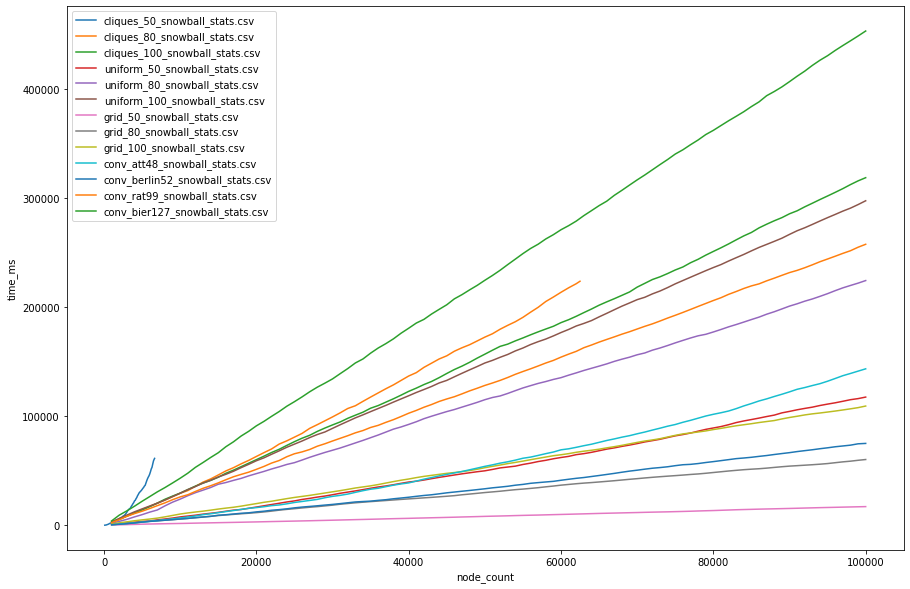

opt_count


oracle_count


edge_count


num_subsinks


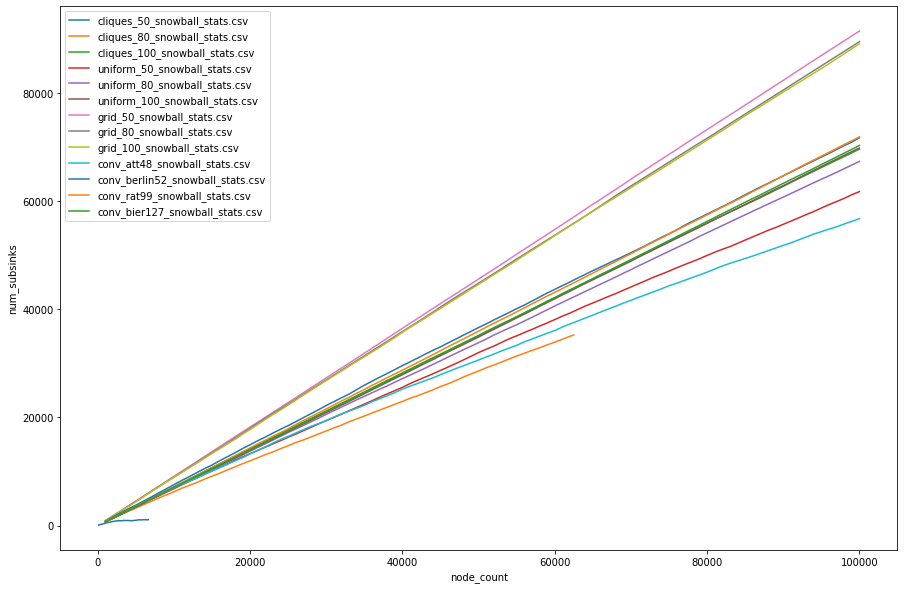

edge_to_node


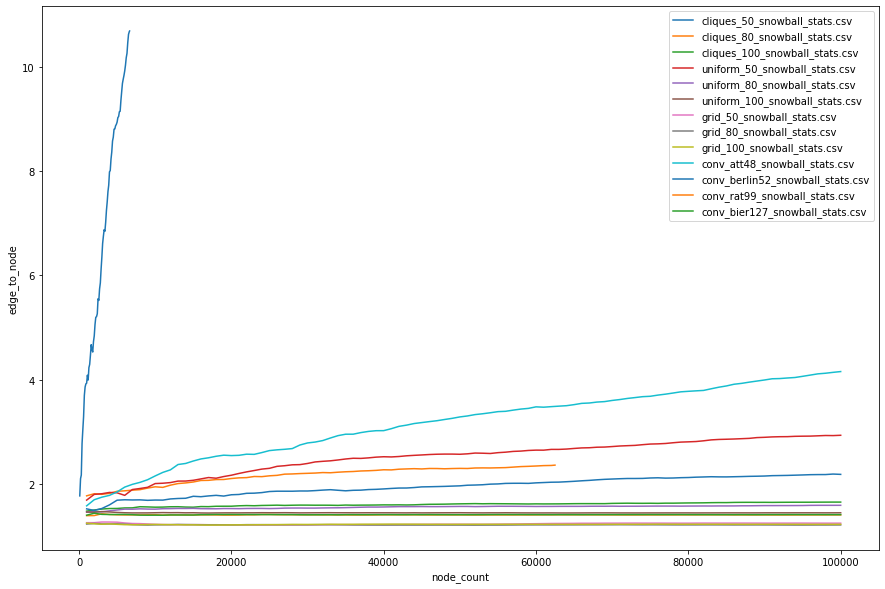

avg_fitness


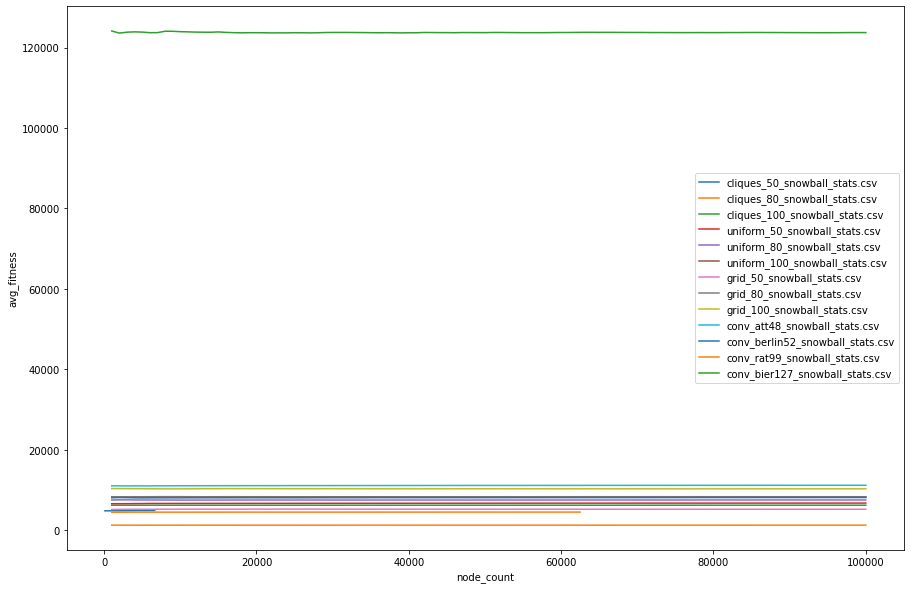

distLO


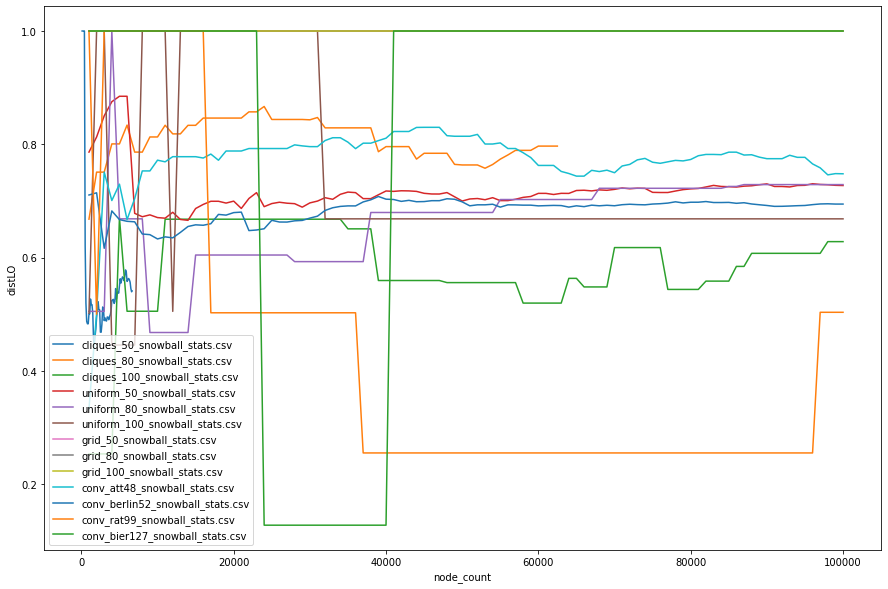

conrel


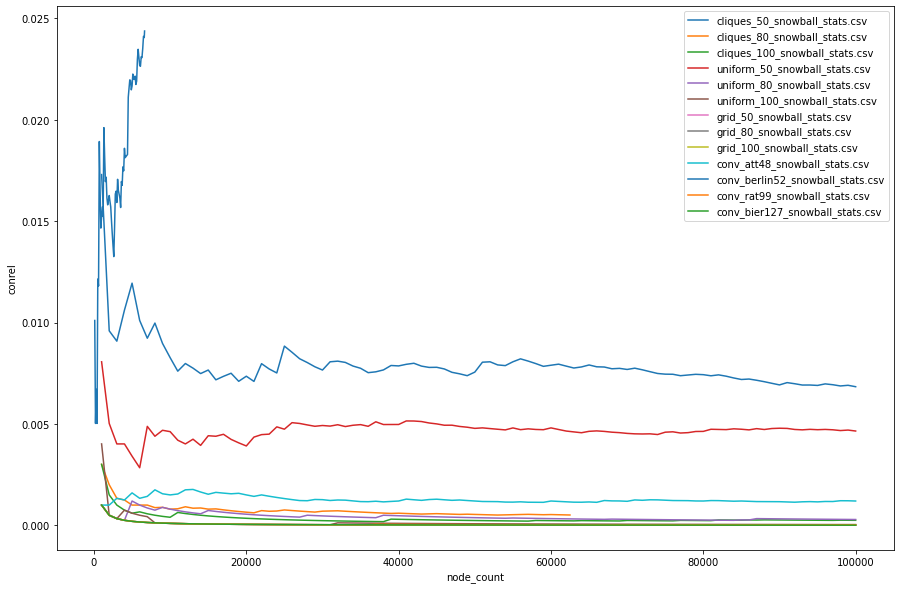

avg_loop_weight


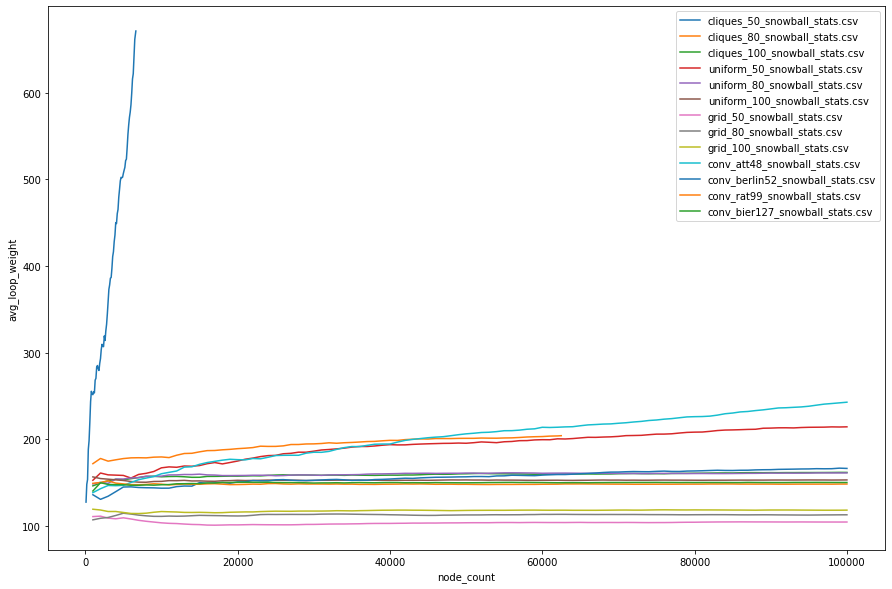

go_path_ratio


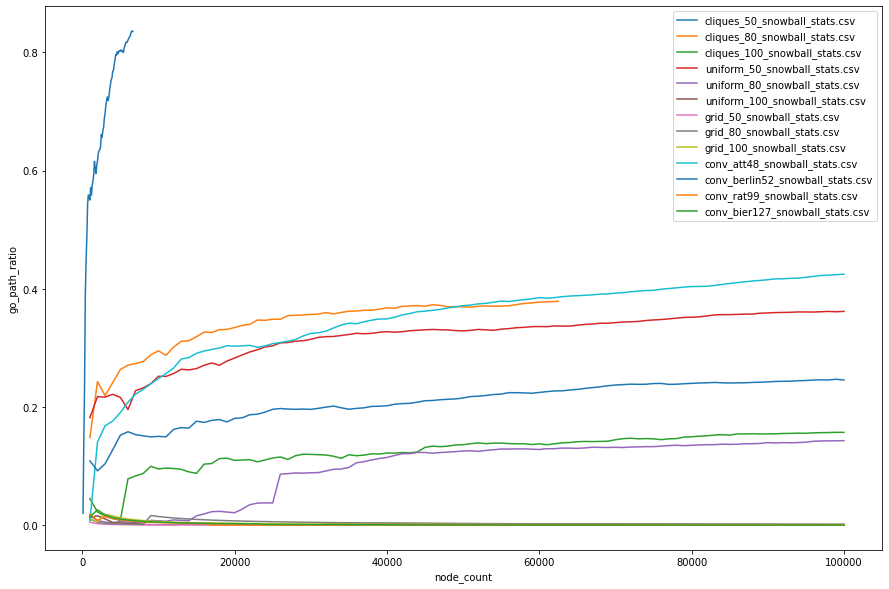

avg_go_path_len


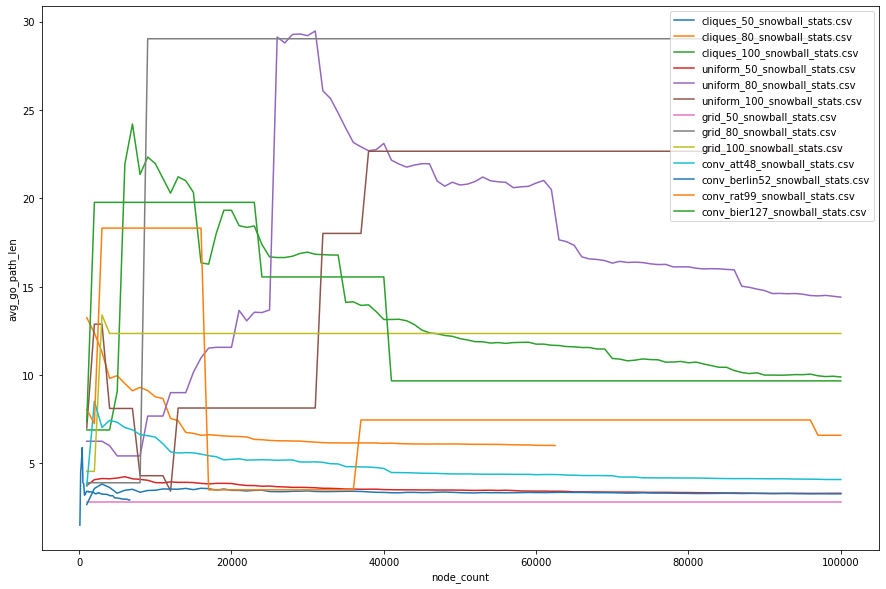

max_go_path_len


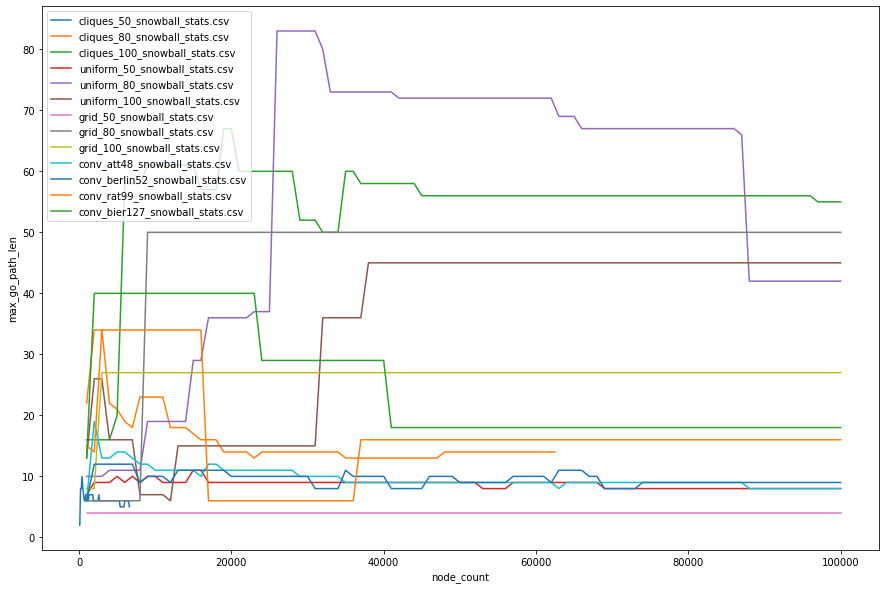

num_sinks


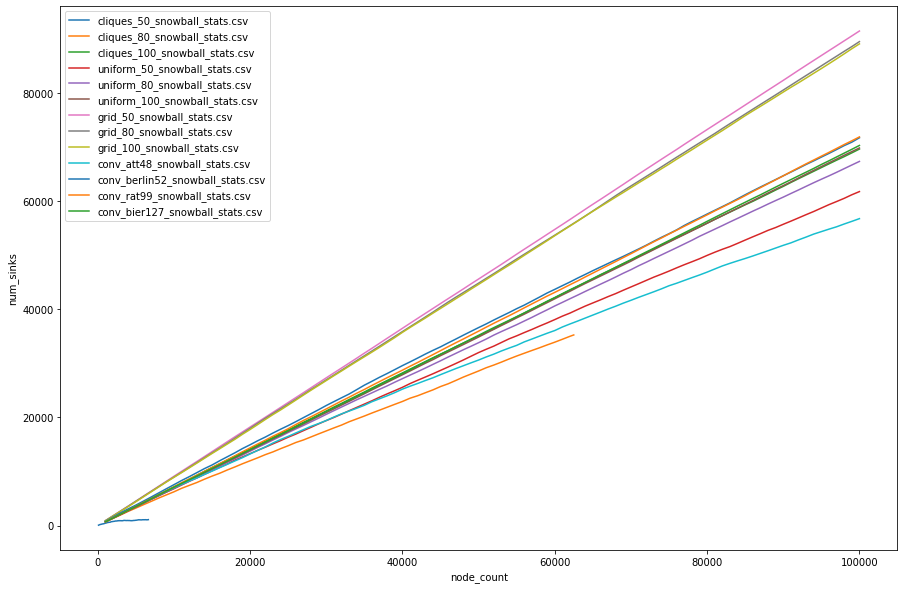

num_sources


funnel_num


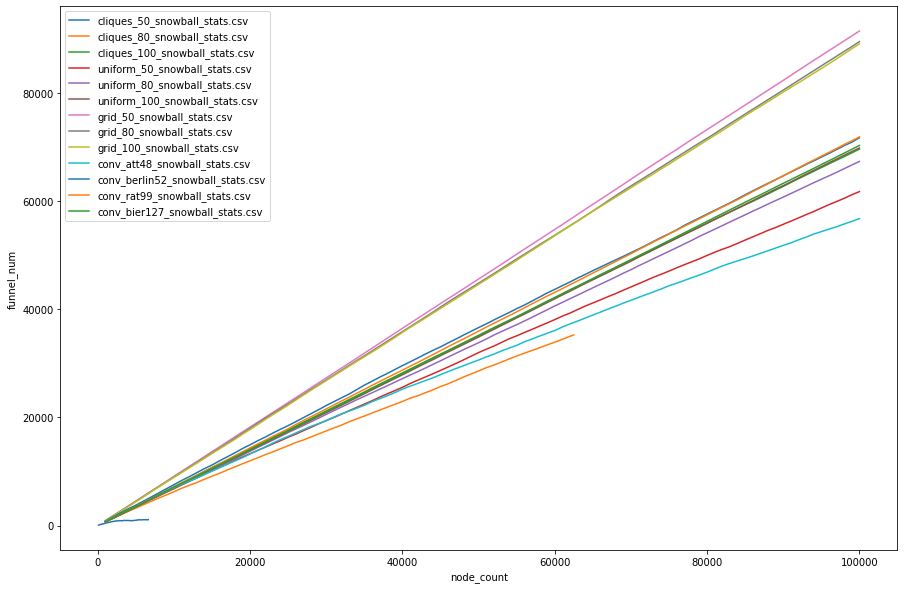

mean_funnel_size


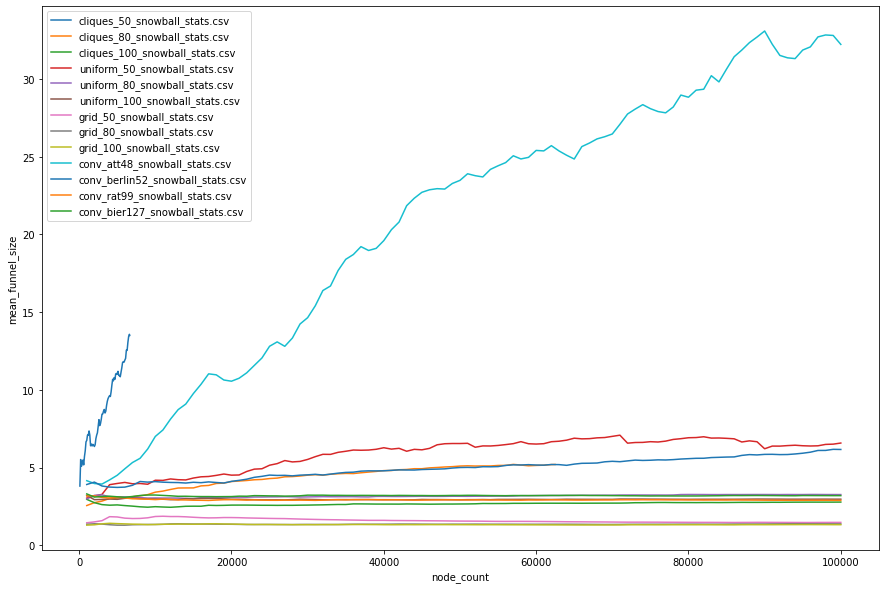

max_funnel_size


max_out_degree


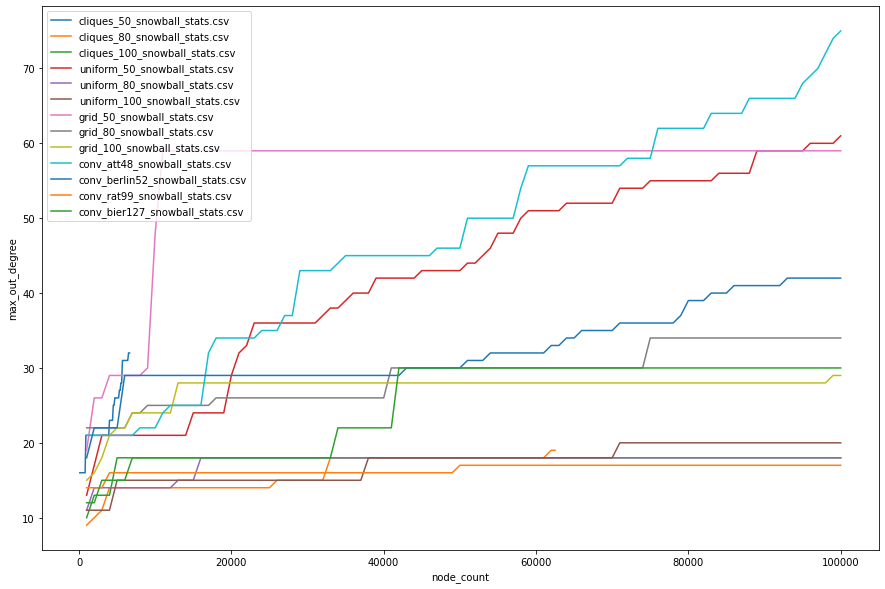

avg_out_degree


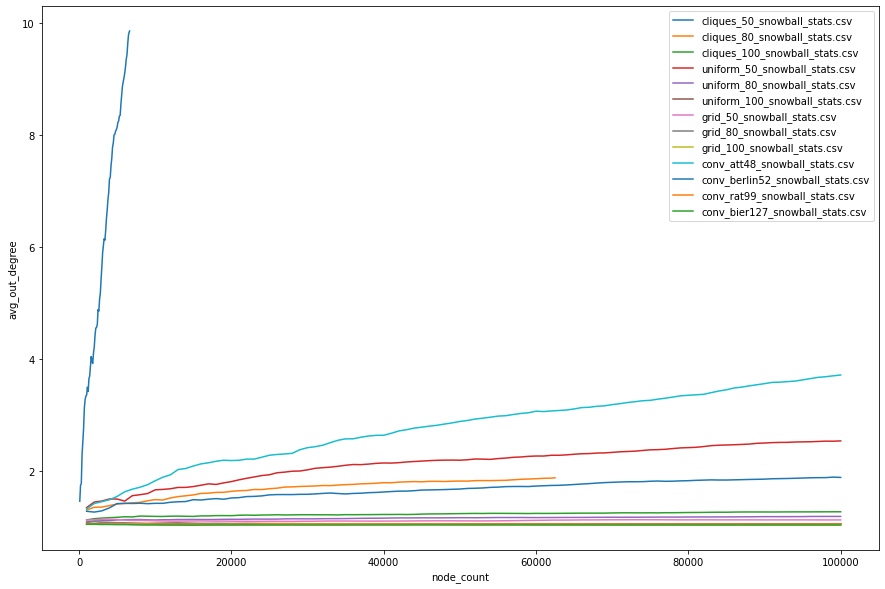

max_in_degree


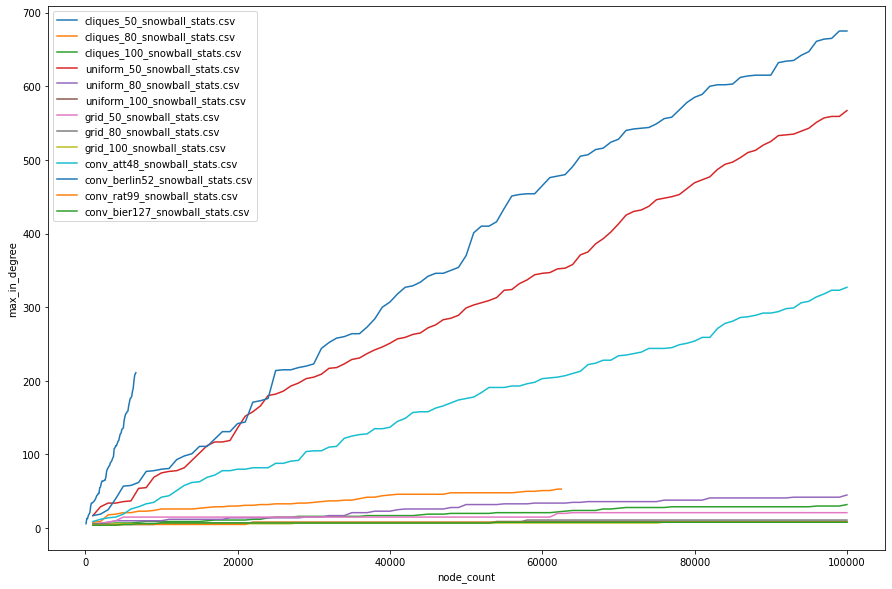

avg_in_degree


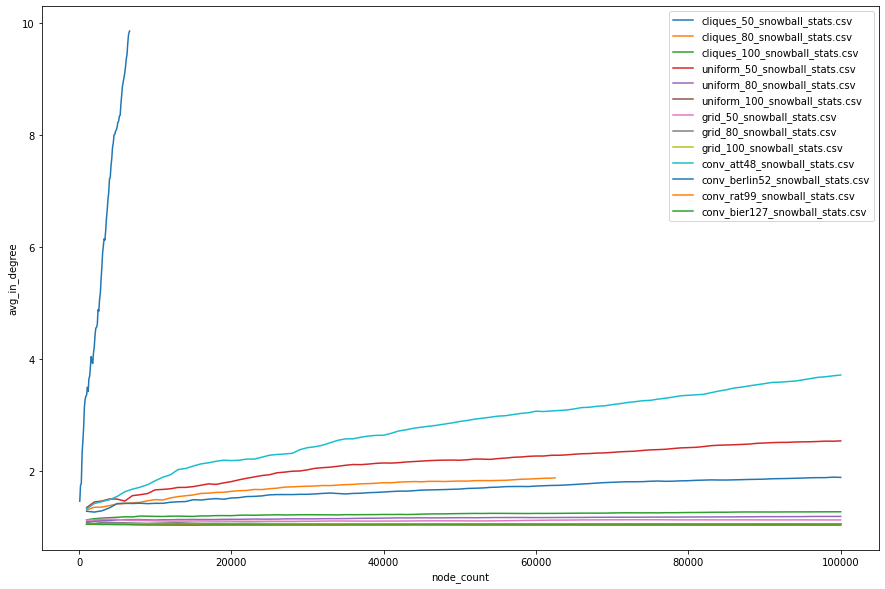

assortativity_deg


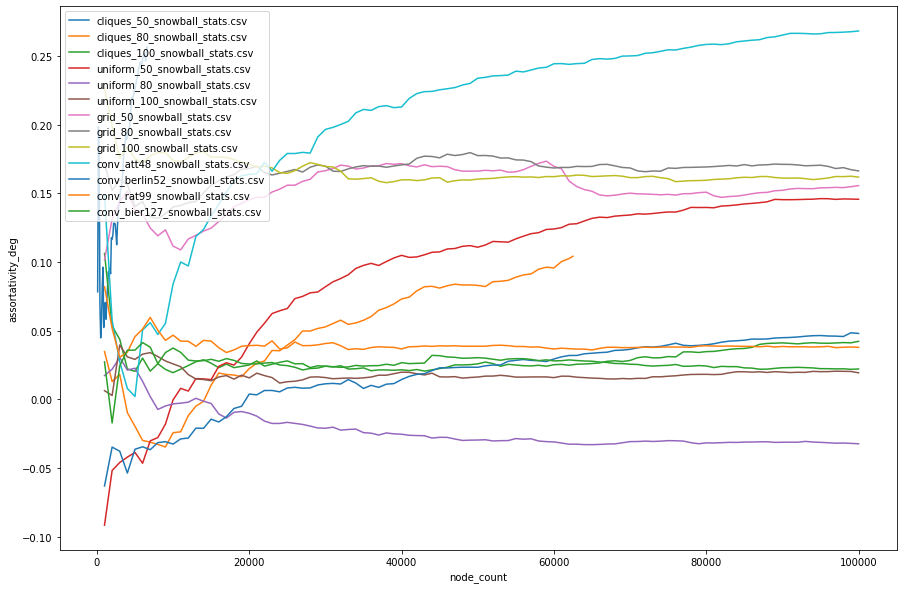

density


num_cc


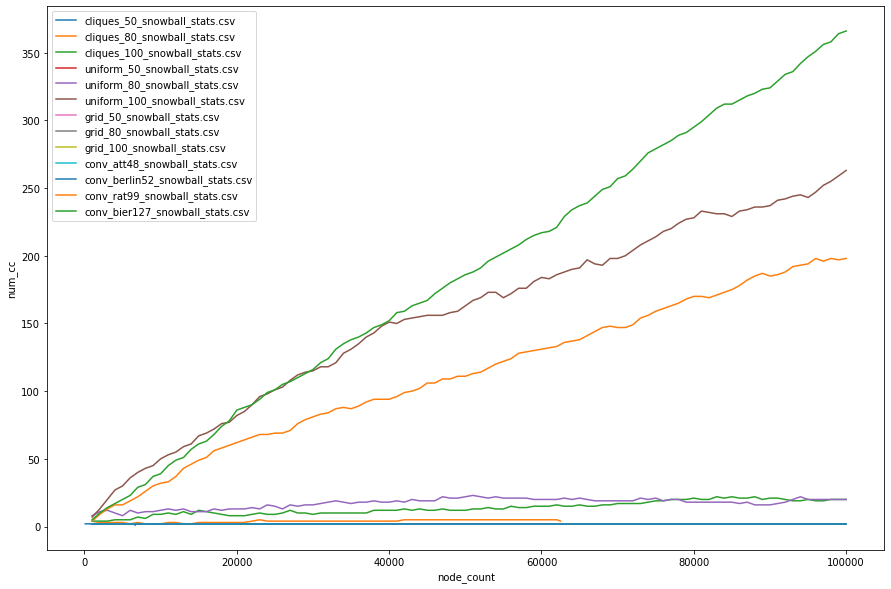

largest_cc


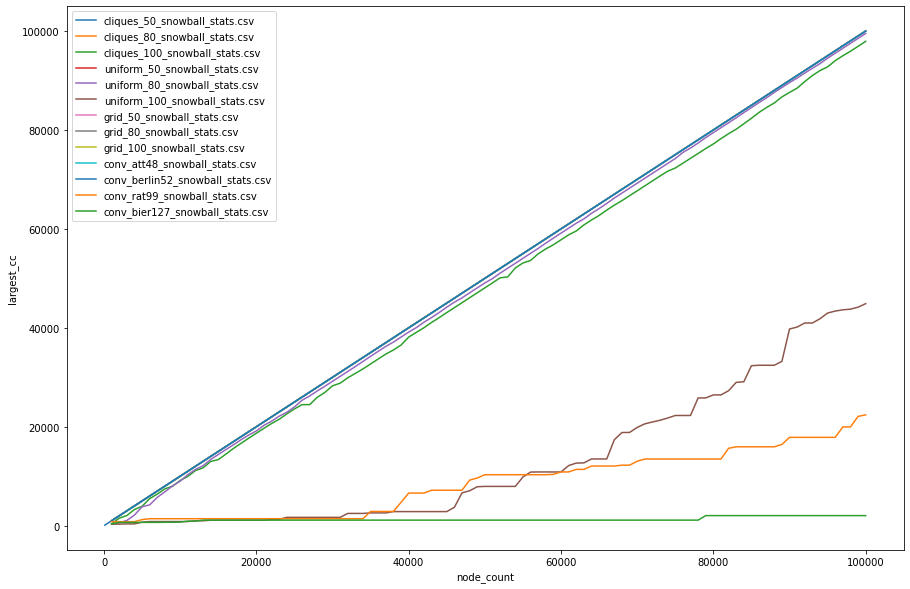

largest_cc_radius


avg_path_len


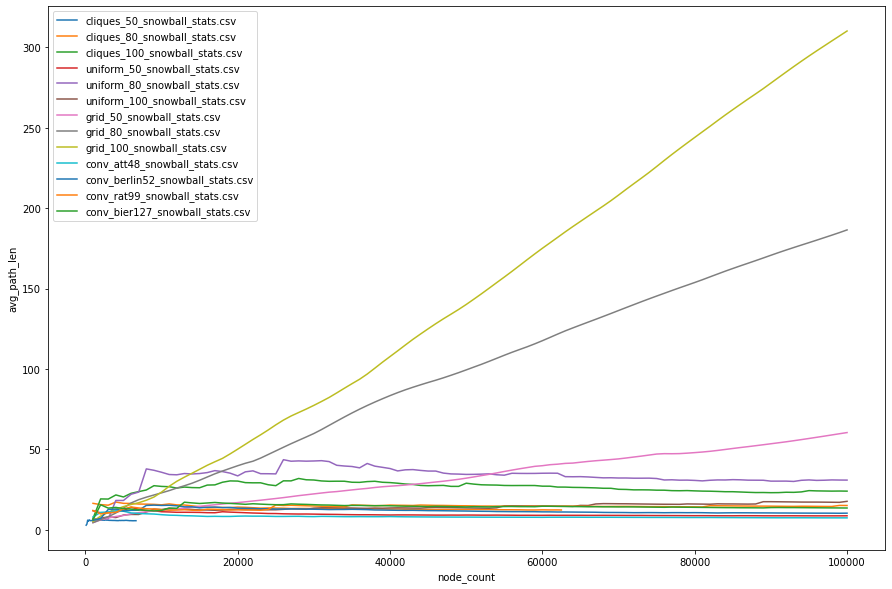

cliques_num


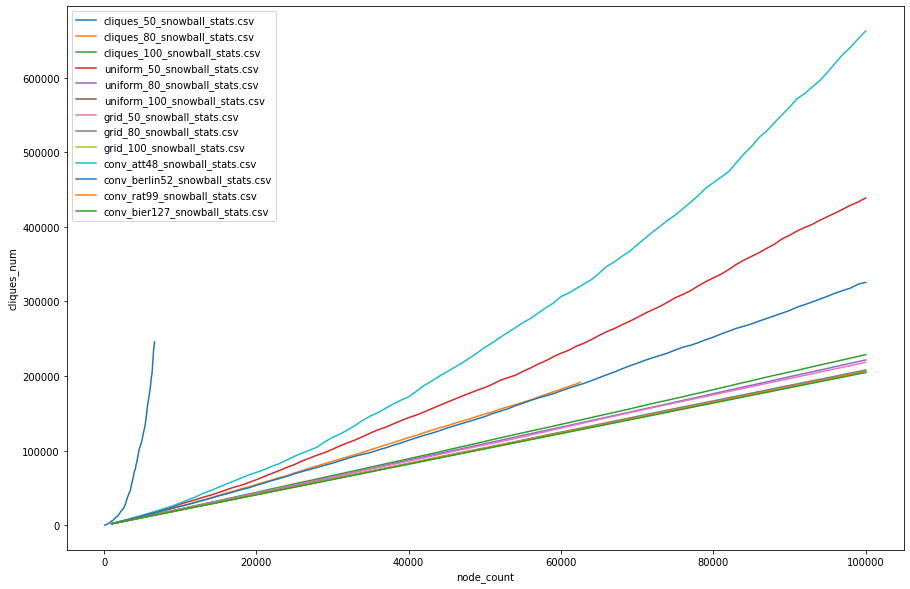

maximal_cliques_num


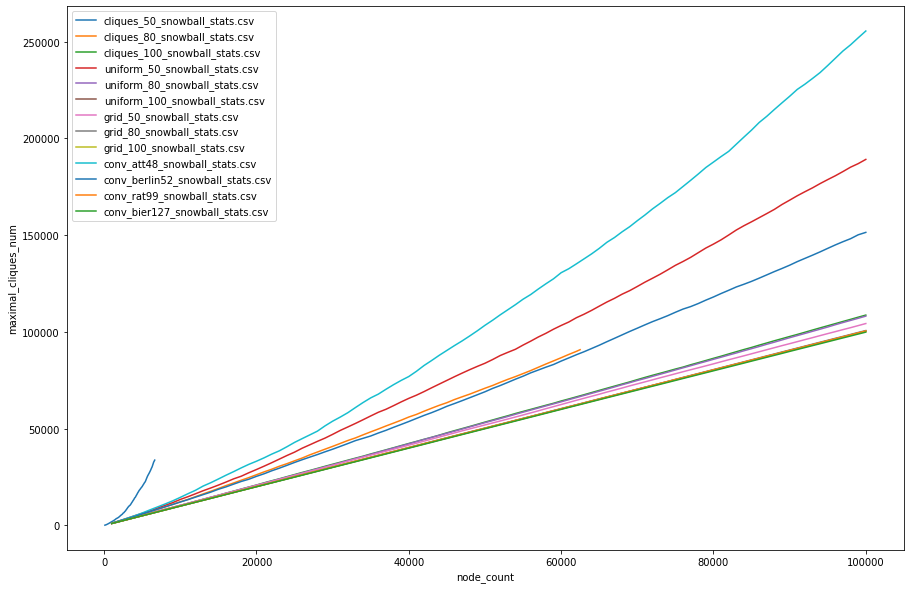

largest_clique_size


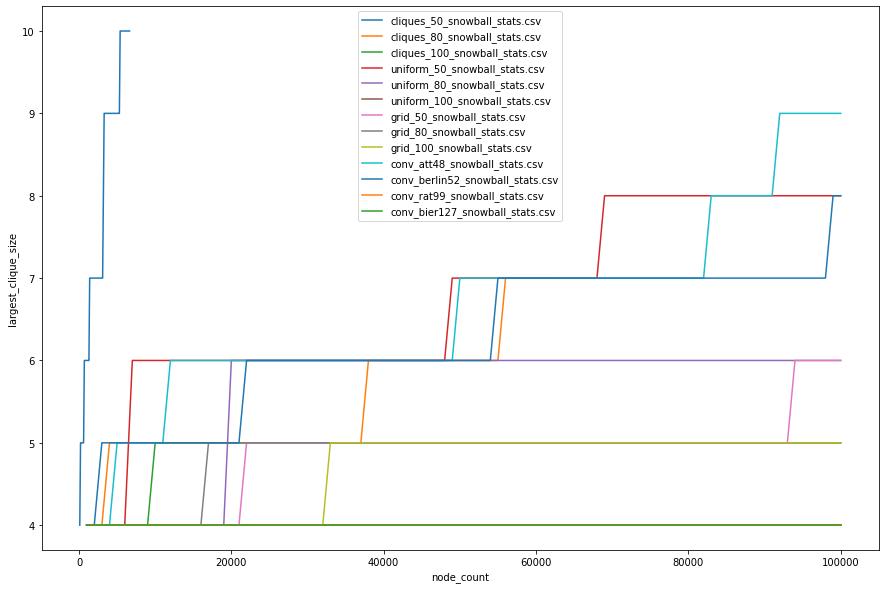

reciprocity


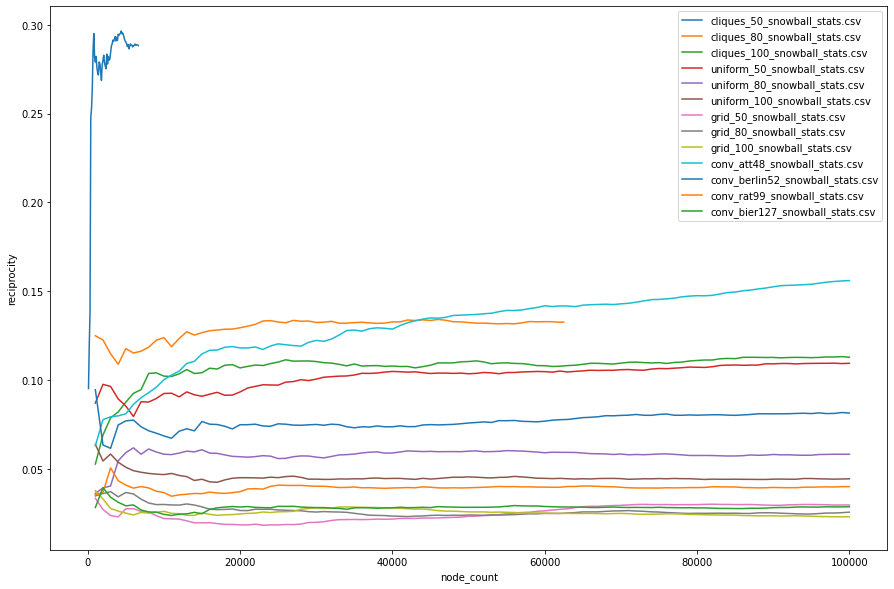

In [83]:
columns = list(dfs[files[0]].columns.values)

for column in columns:
    if column == "node_count":
        continue

    fig = plt.figure(figsize = (15,10))

    for key in dfs:
        df = dfs[key]
        x = df["node_count"]
        y = df[column]
        plt.plot(x,y, label=key.split("/")[-1])

    print(column)
    plt.ylabel(column)
    plt.xlabel("node_count")
    plt.legend()
    plt.show()
    # plt.clear()

edge_count
num_subsinks
edge_to_node
avg_fitness
distLO
conrel
avg_loop_weight
go_path_ratio
avg_go_path_len
max_go_path_len
num_sinks
num_sources
funnel_num
mean_funnel_size
max_funnel_size
max_out_degree
avg_out_degree
max_in_degree
avg_in_degree
assortativity_deg


/tmp/ipykernel_46304/149483270.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize = (20, 30))


density
num_cc
largest_cc
largest_cc_radius
avg_path_len
largest_clique_size
reciprocity
missed


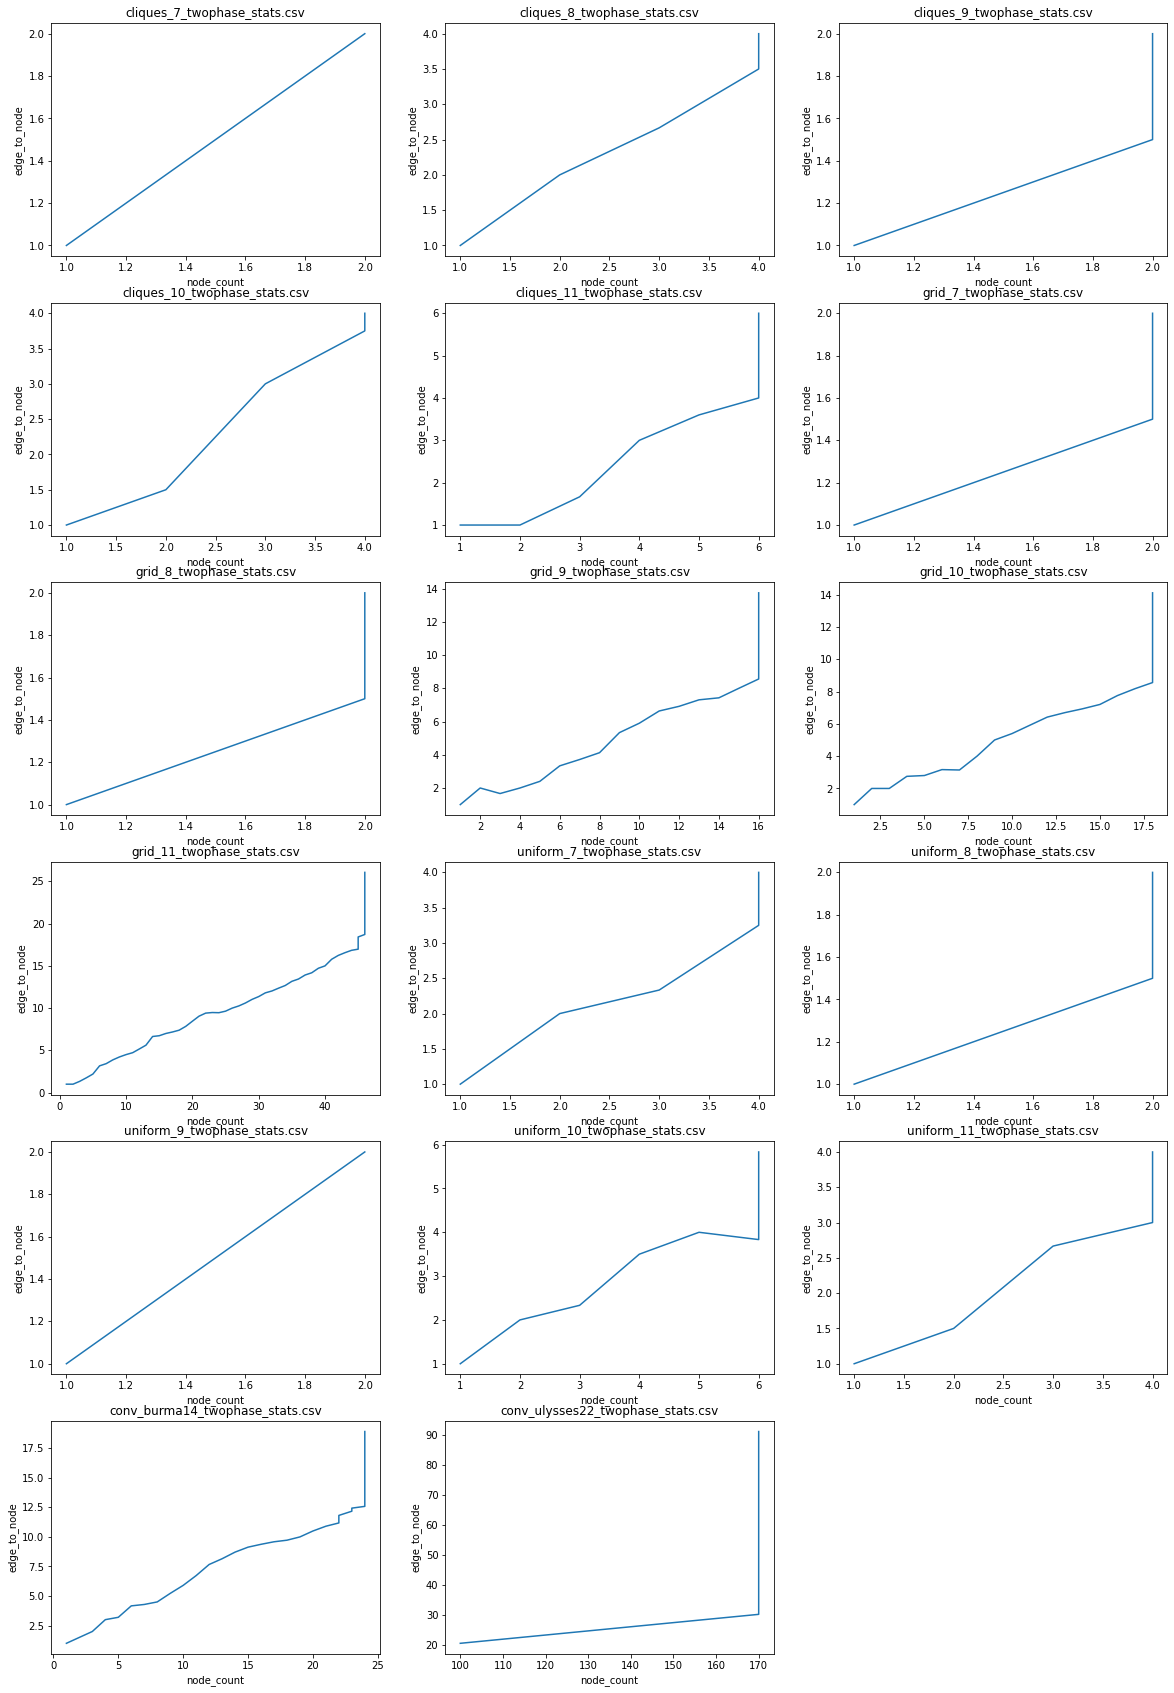

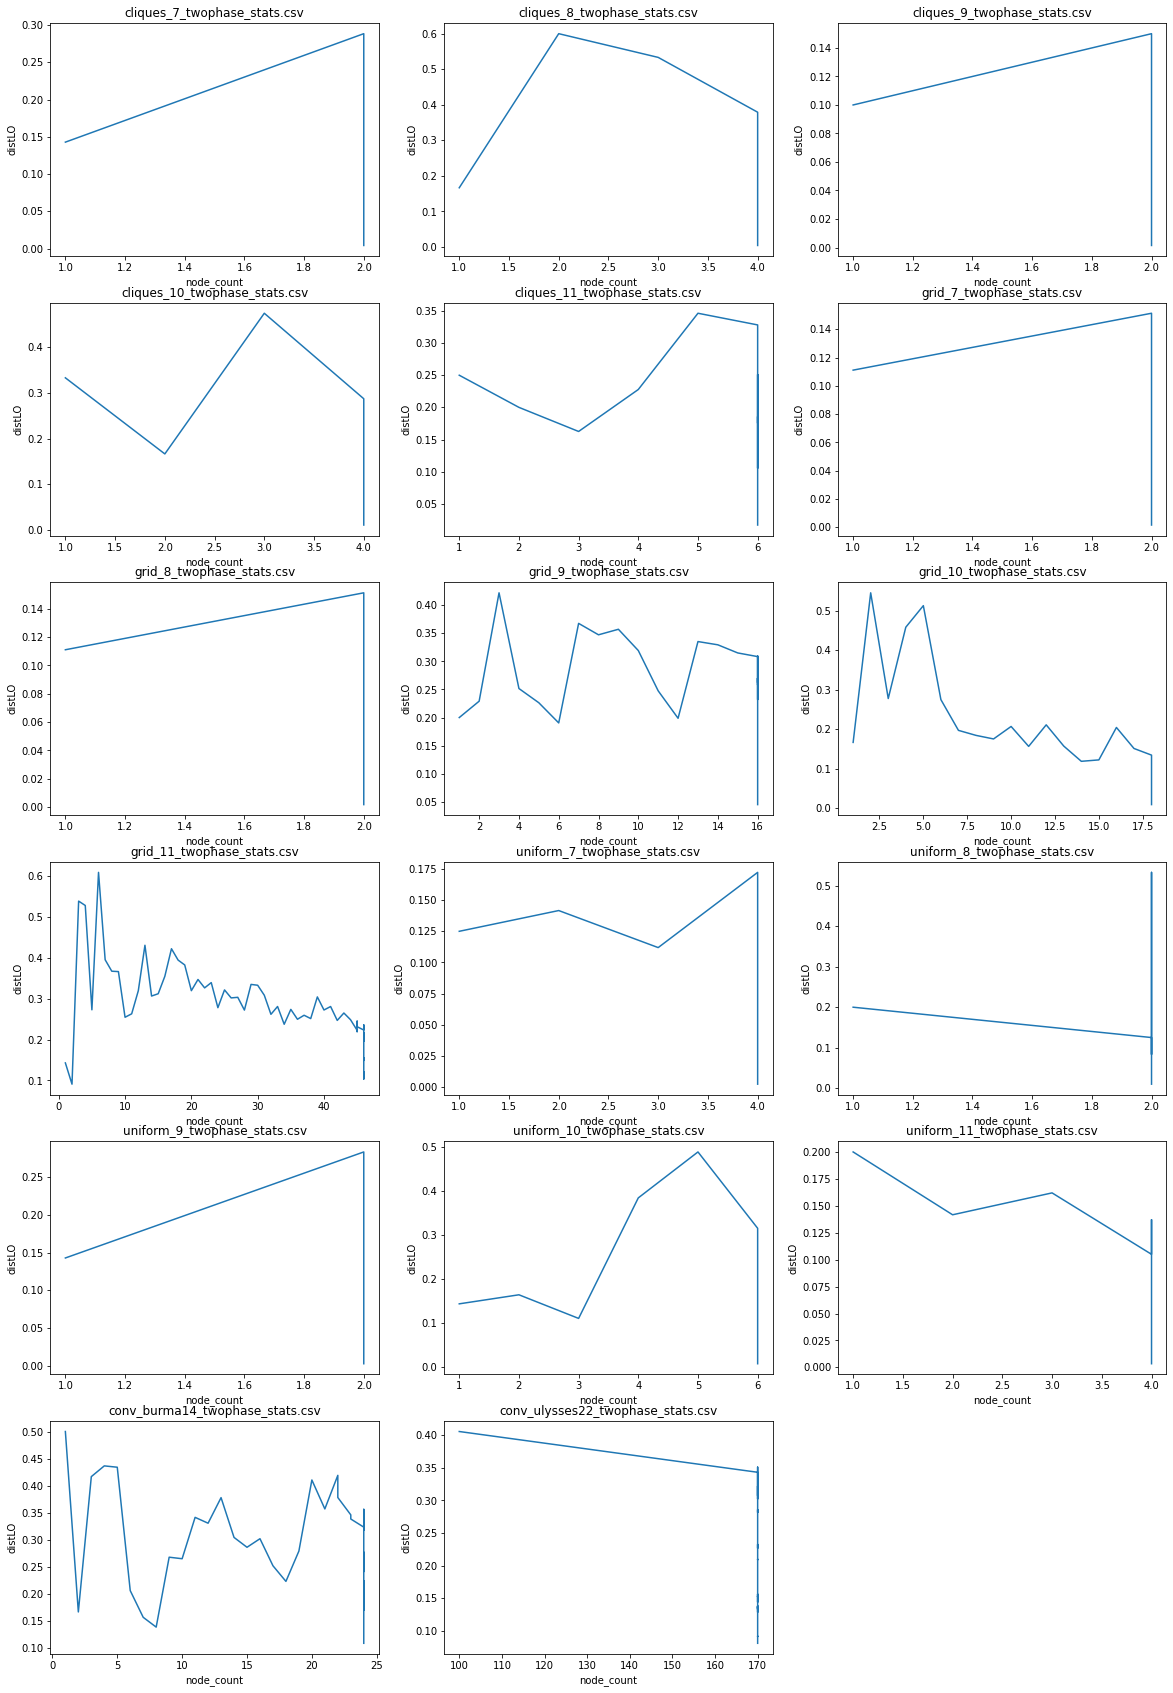

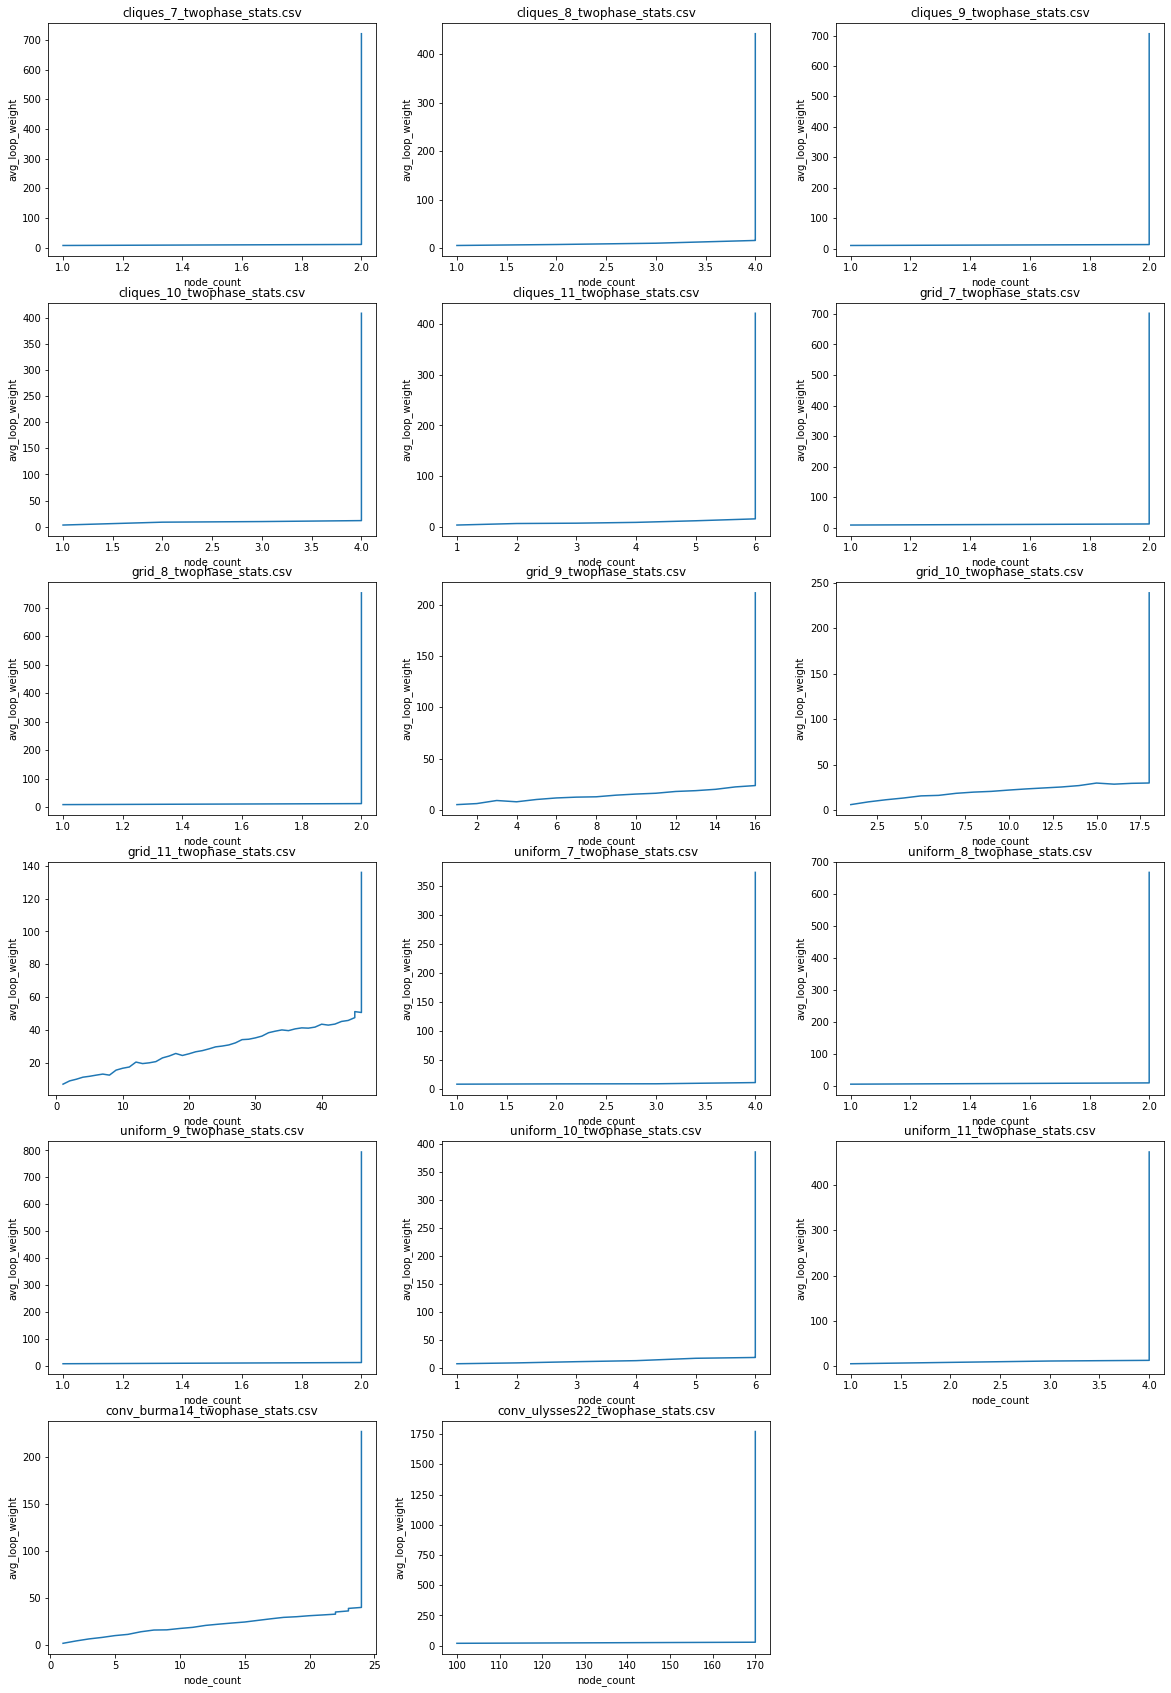

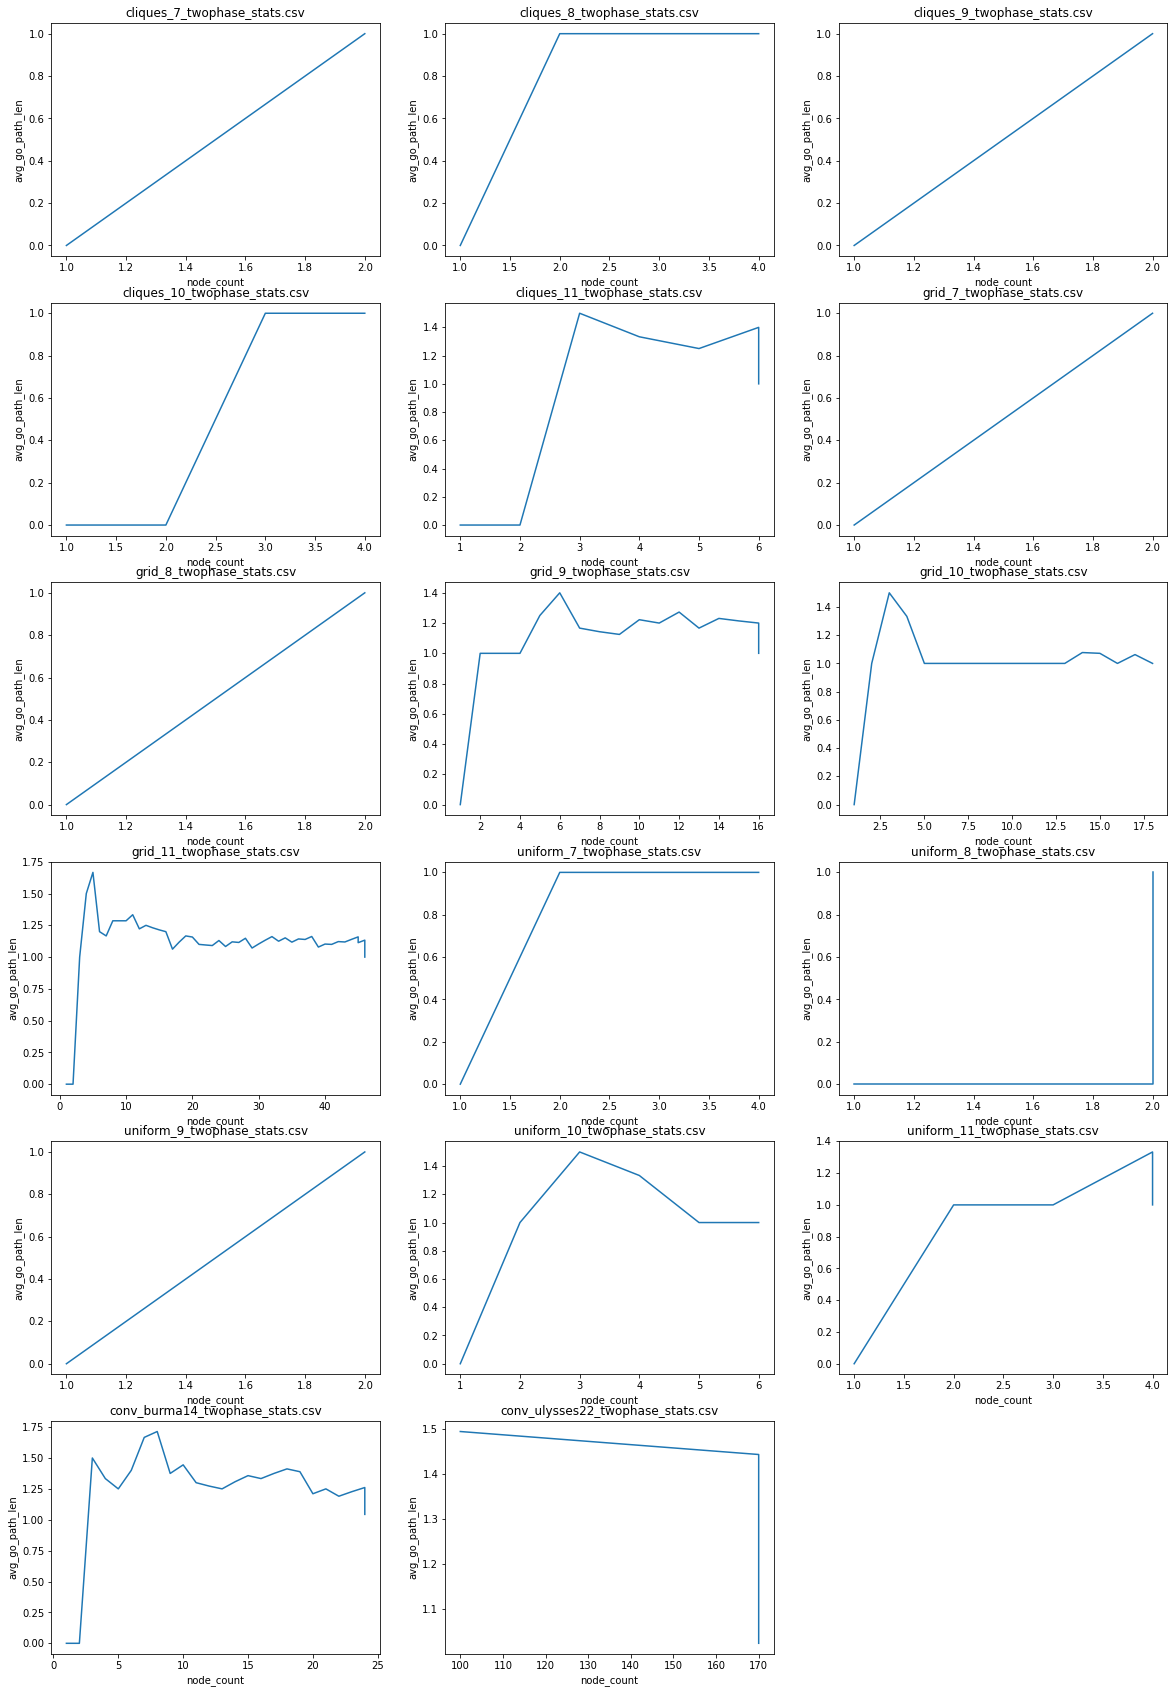

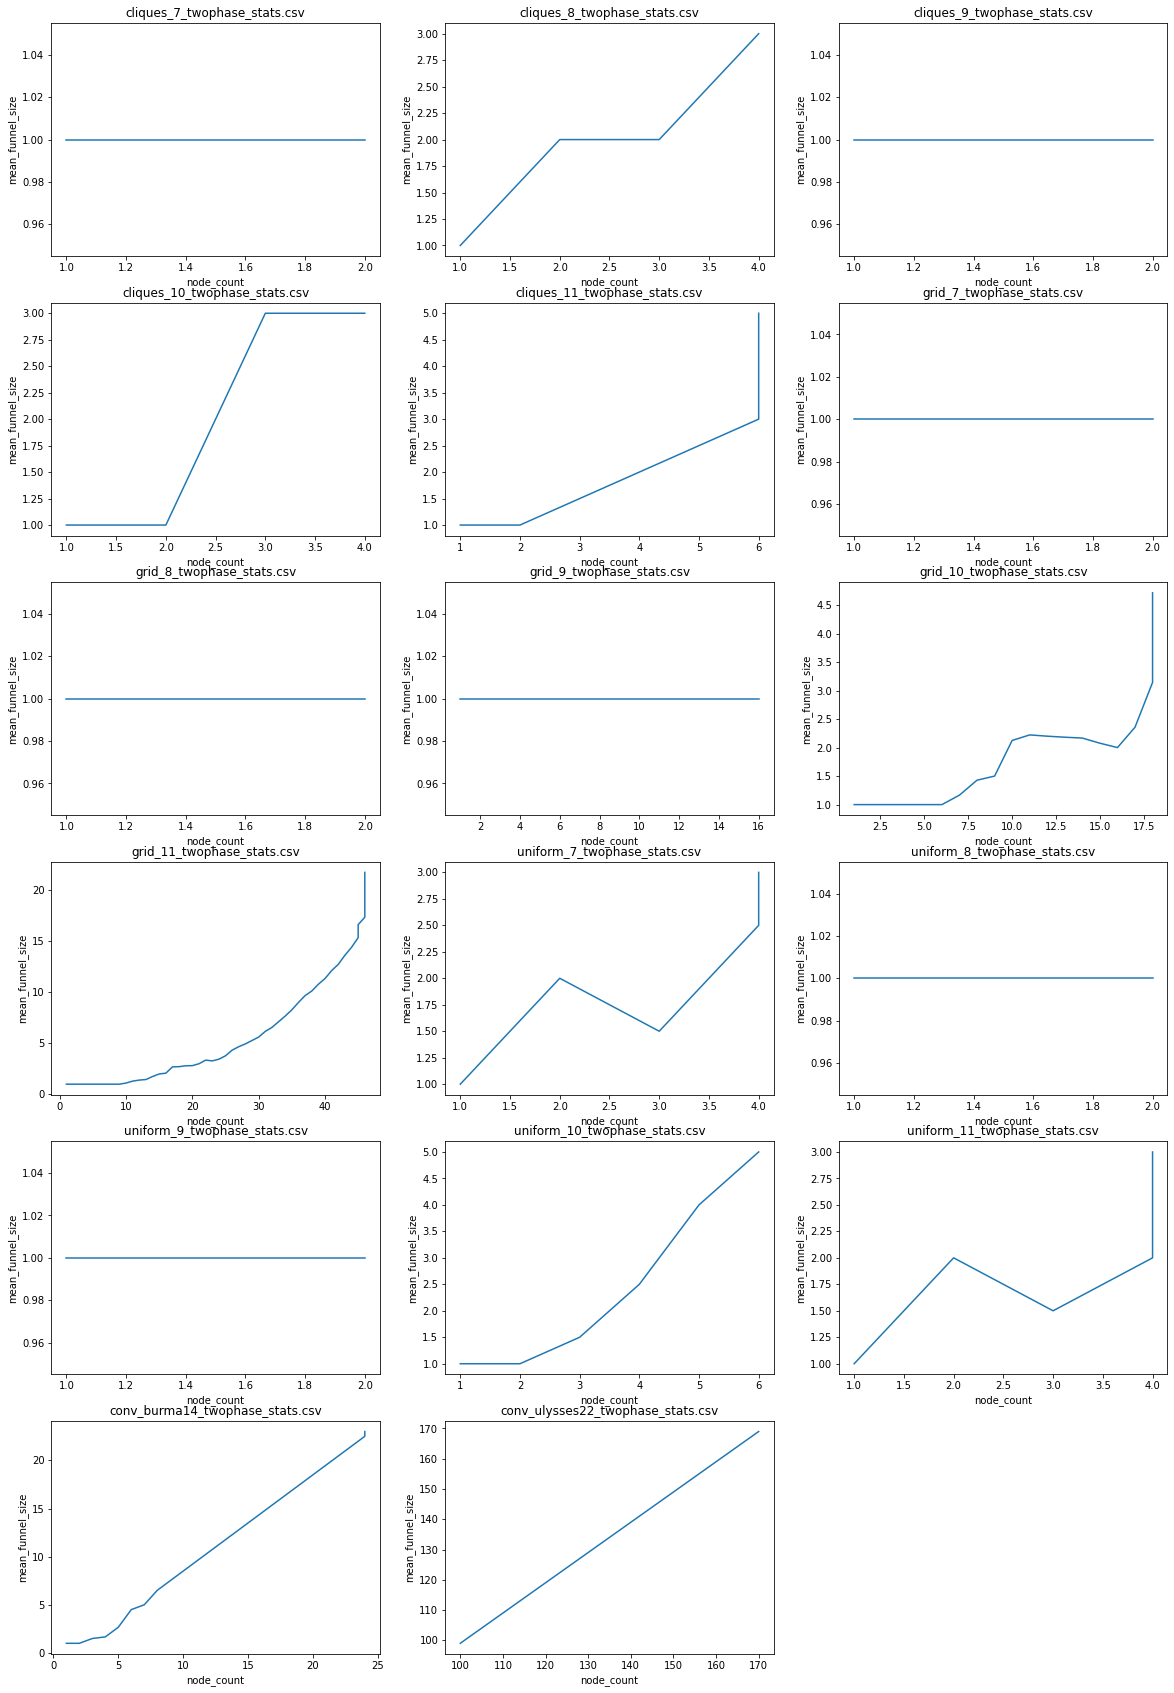

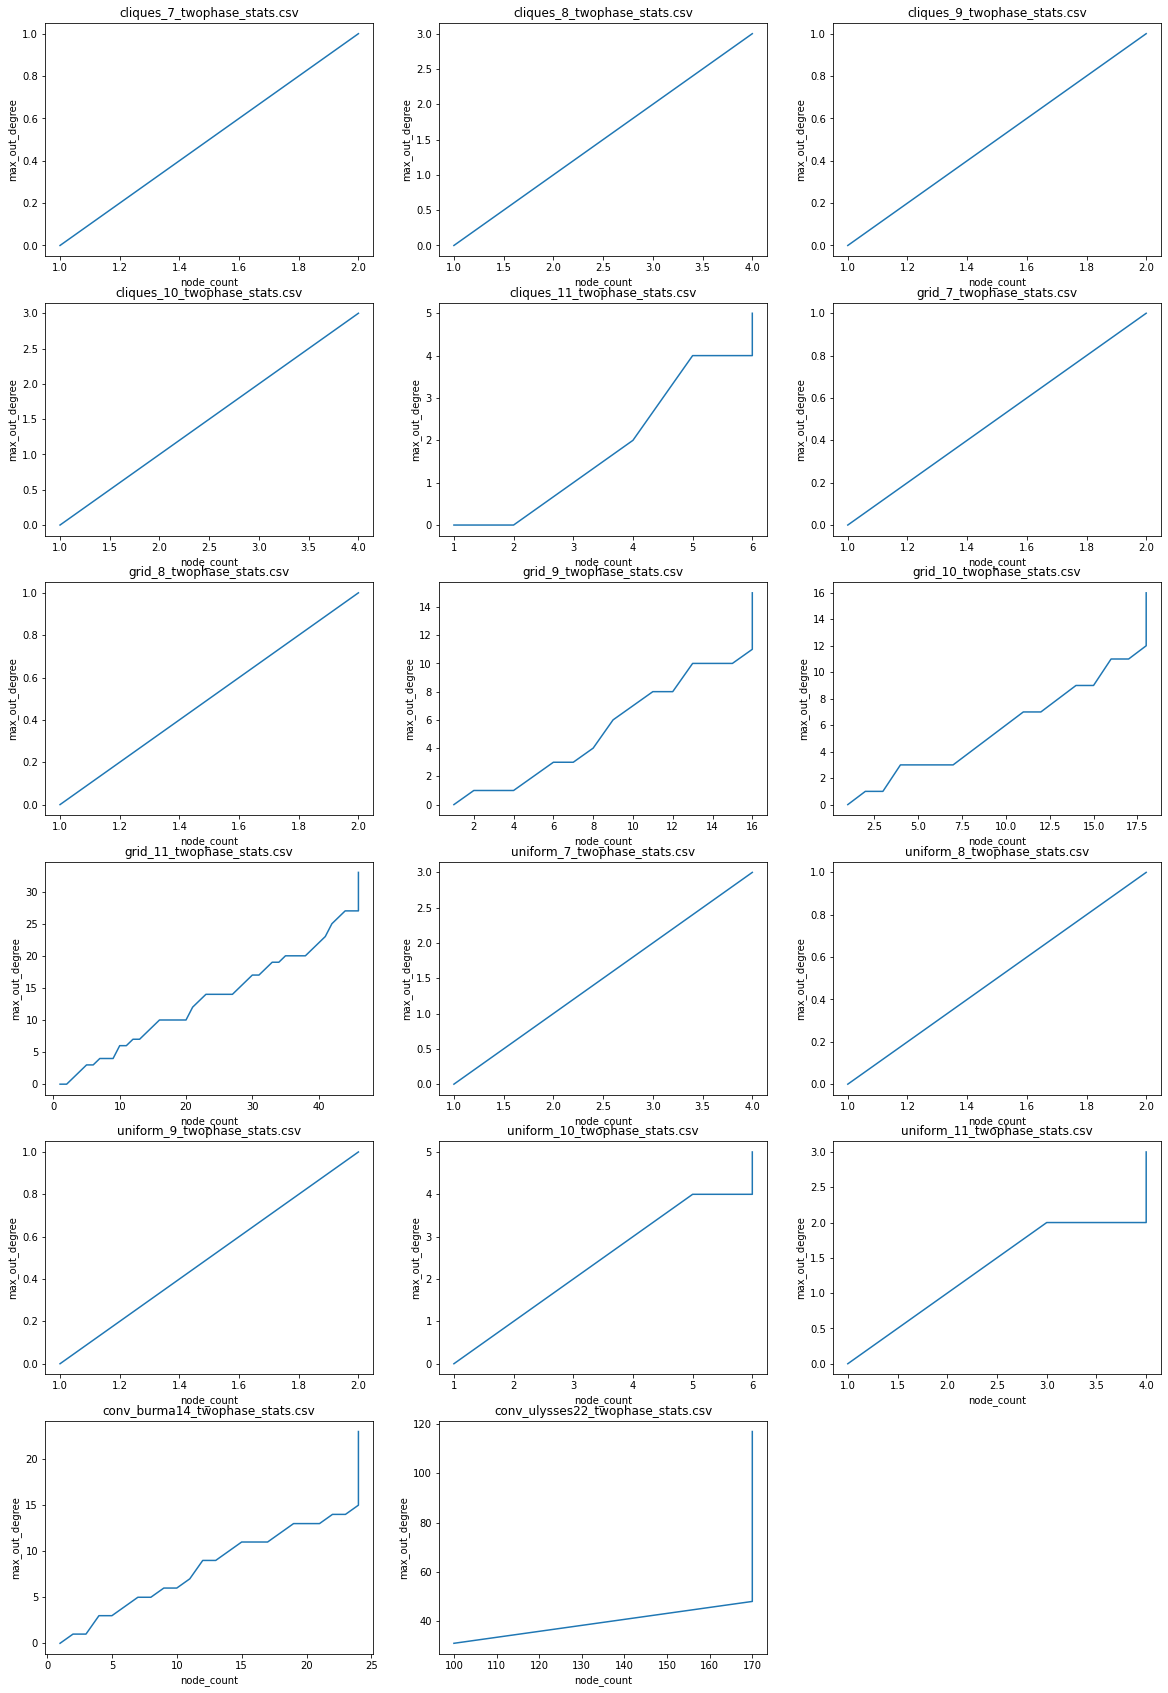

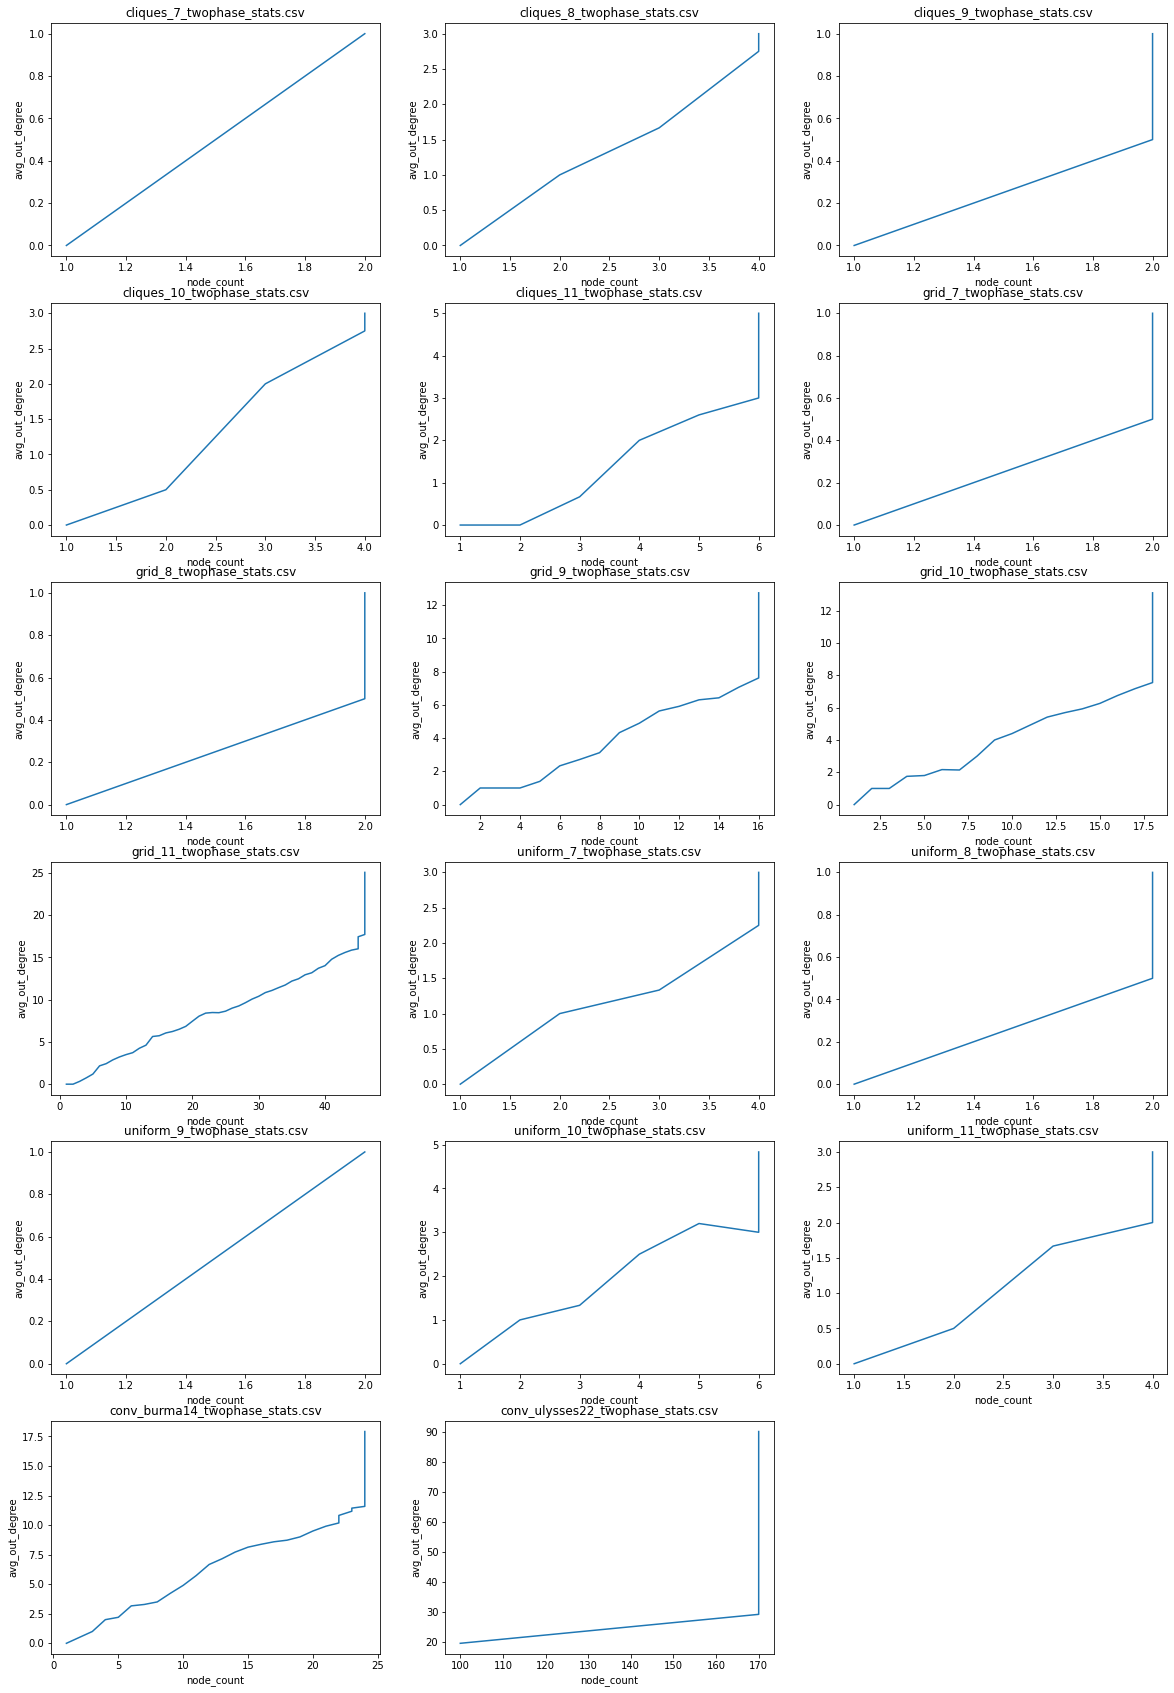

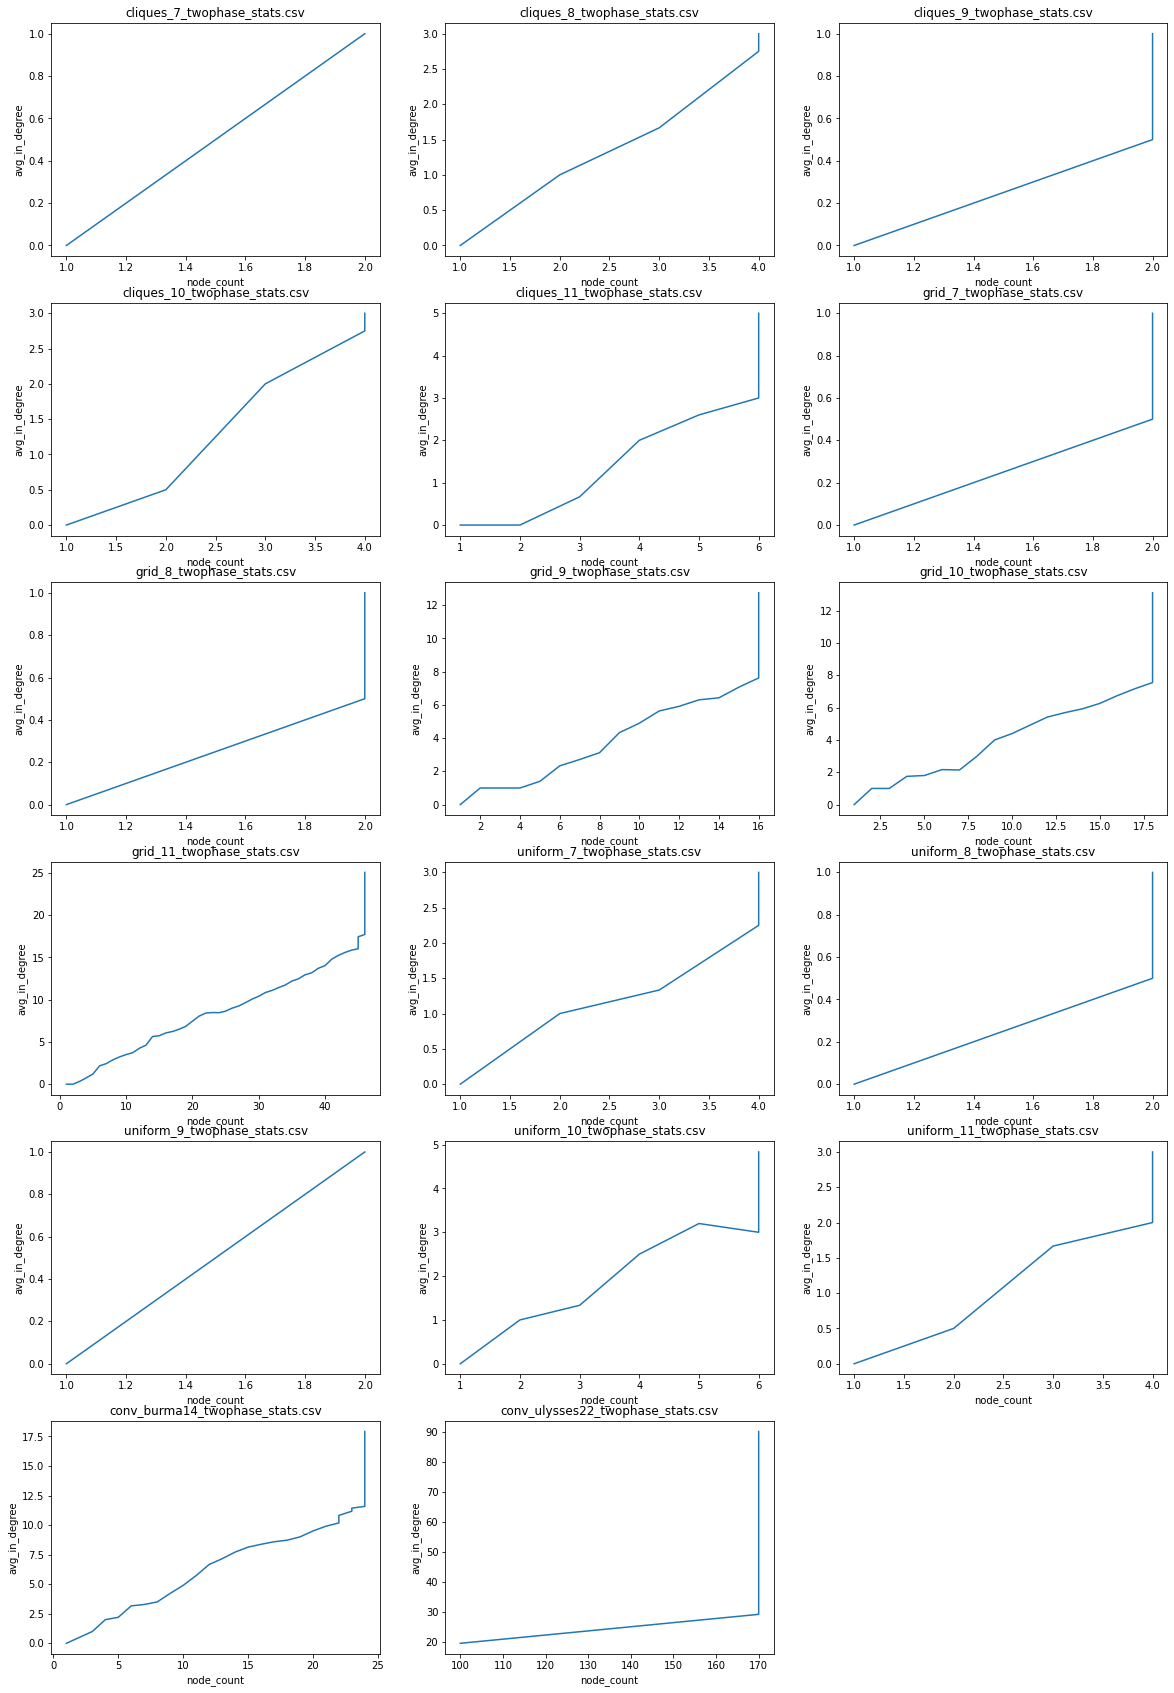

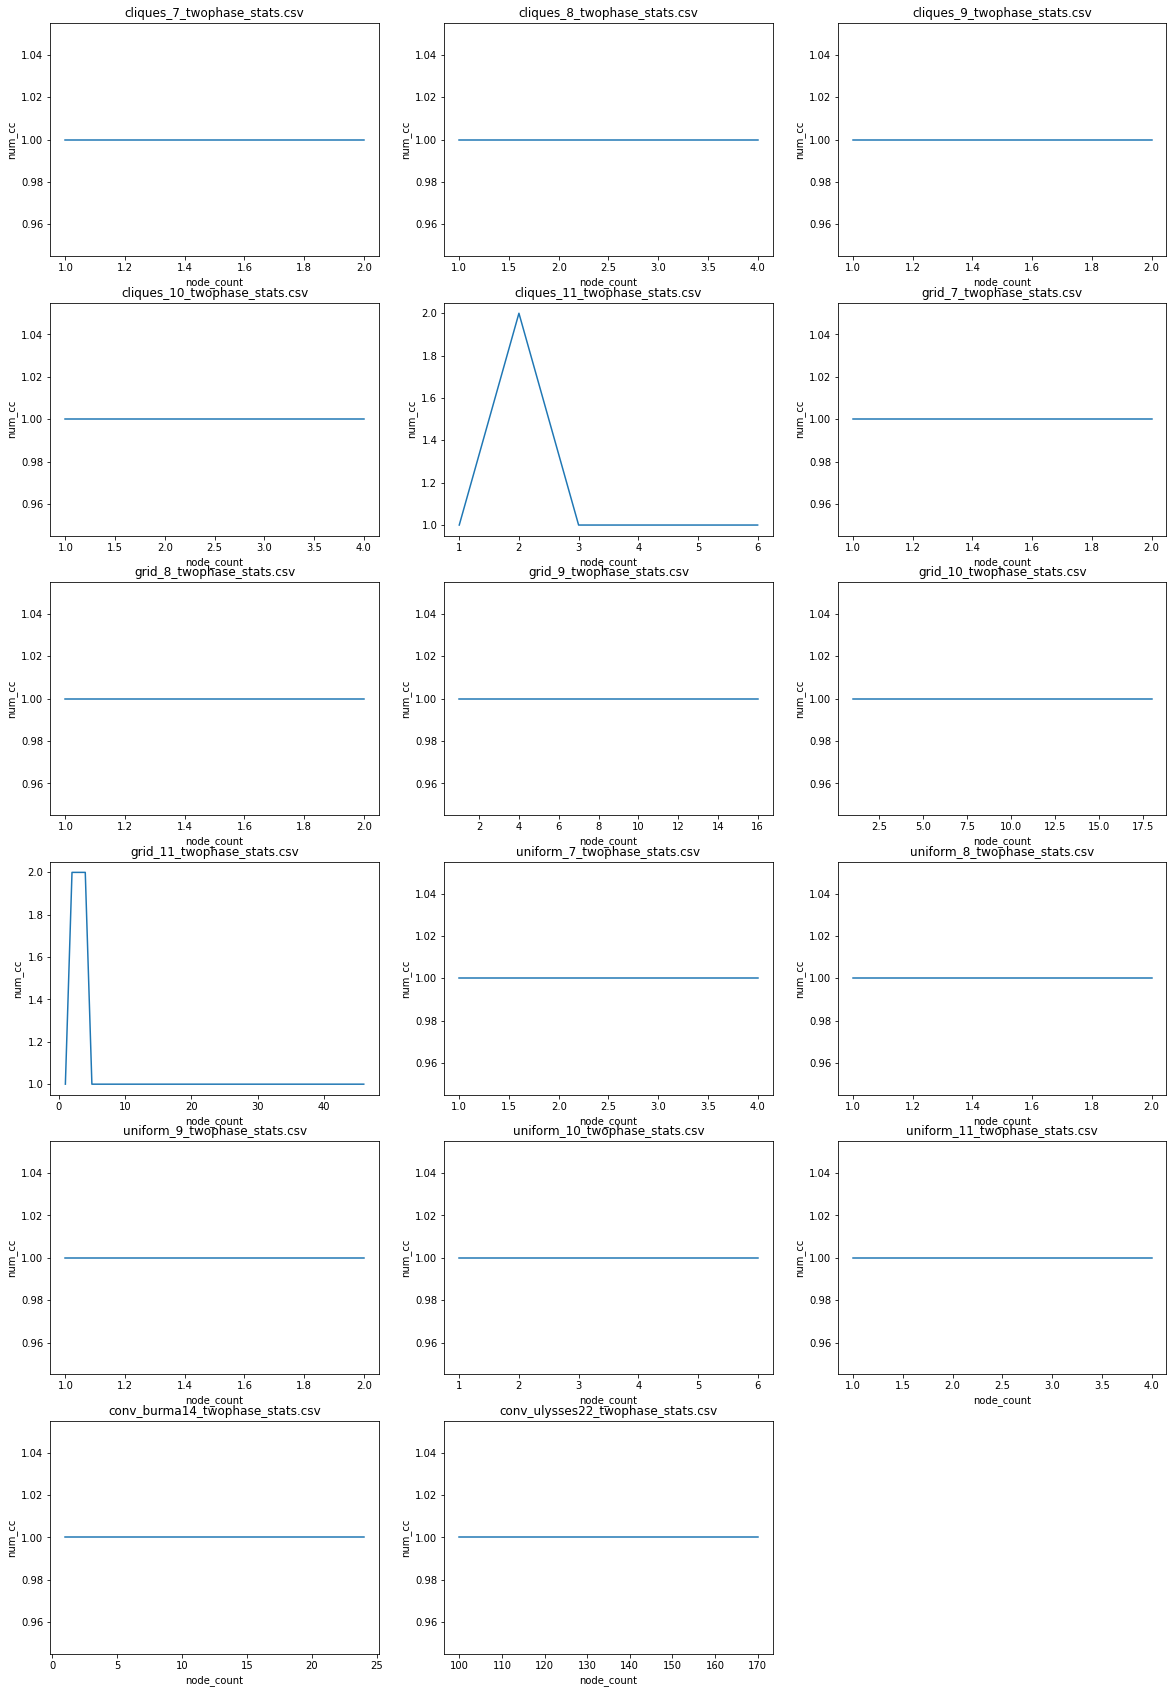

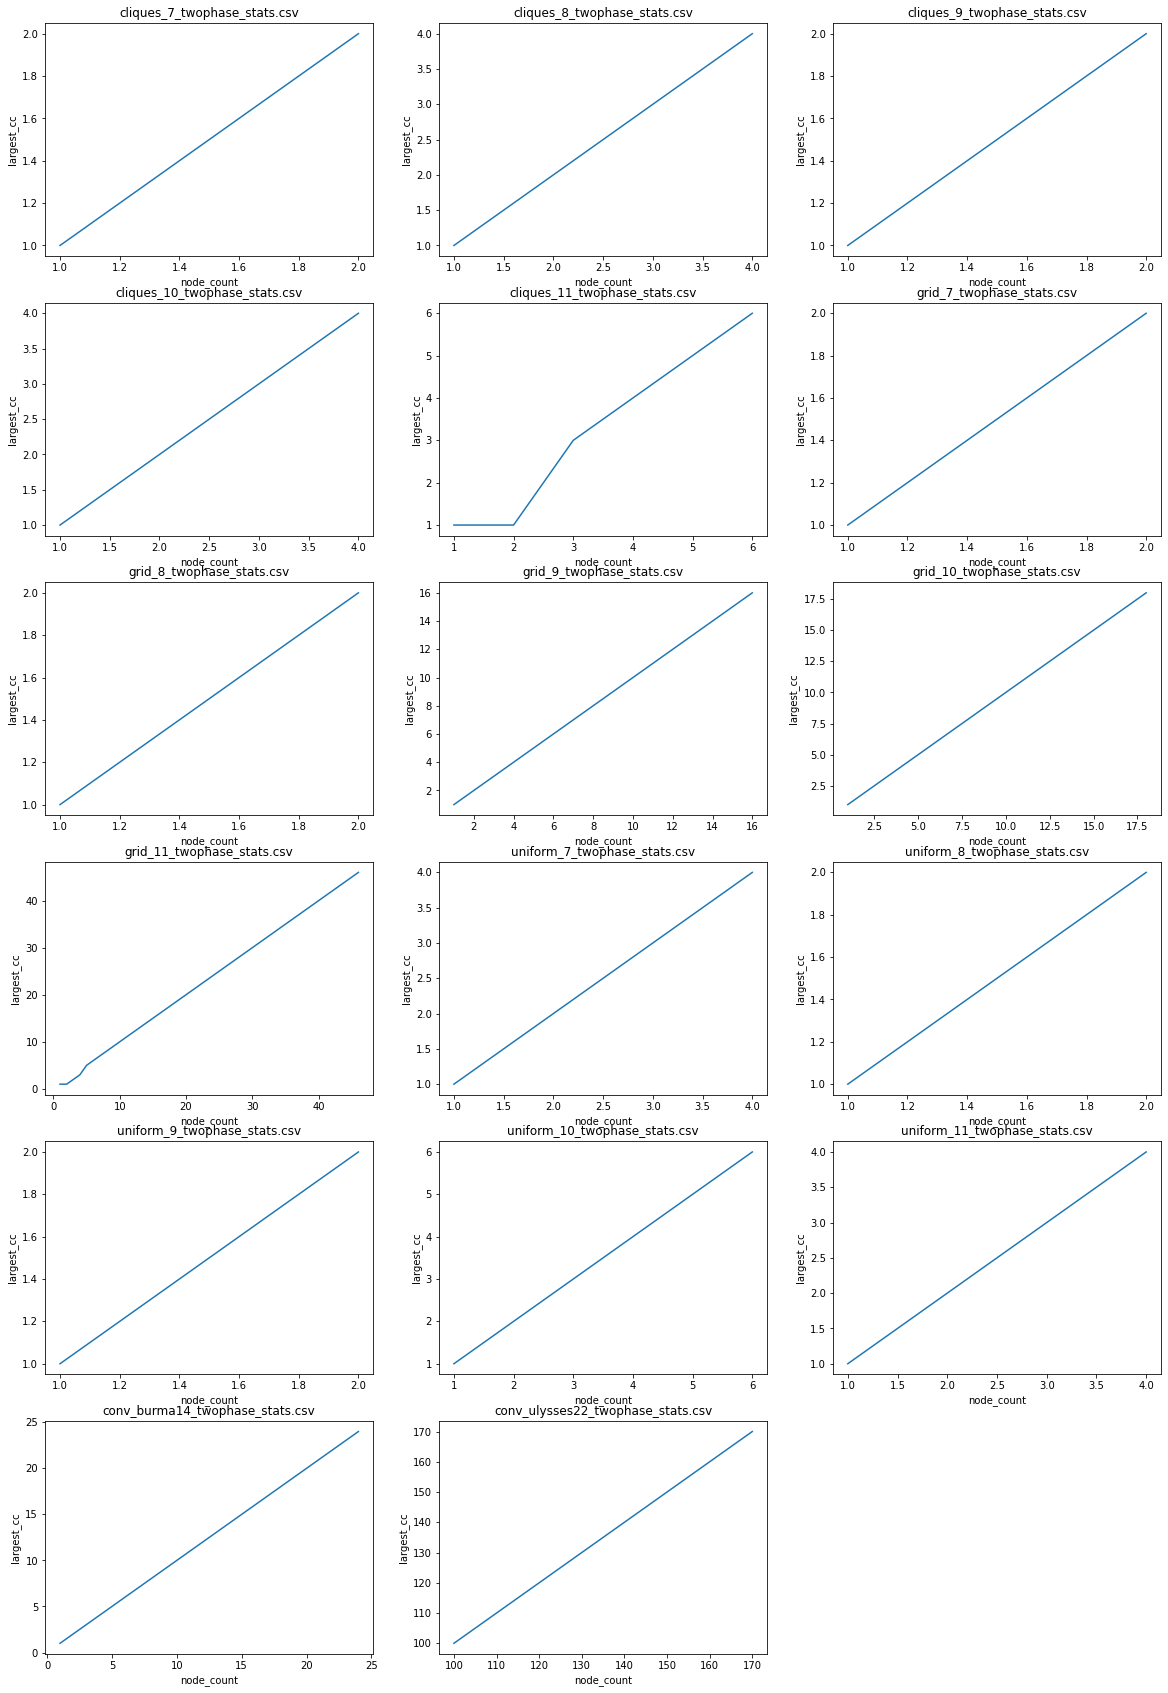

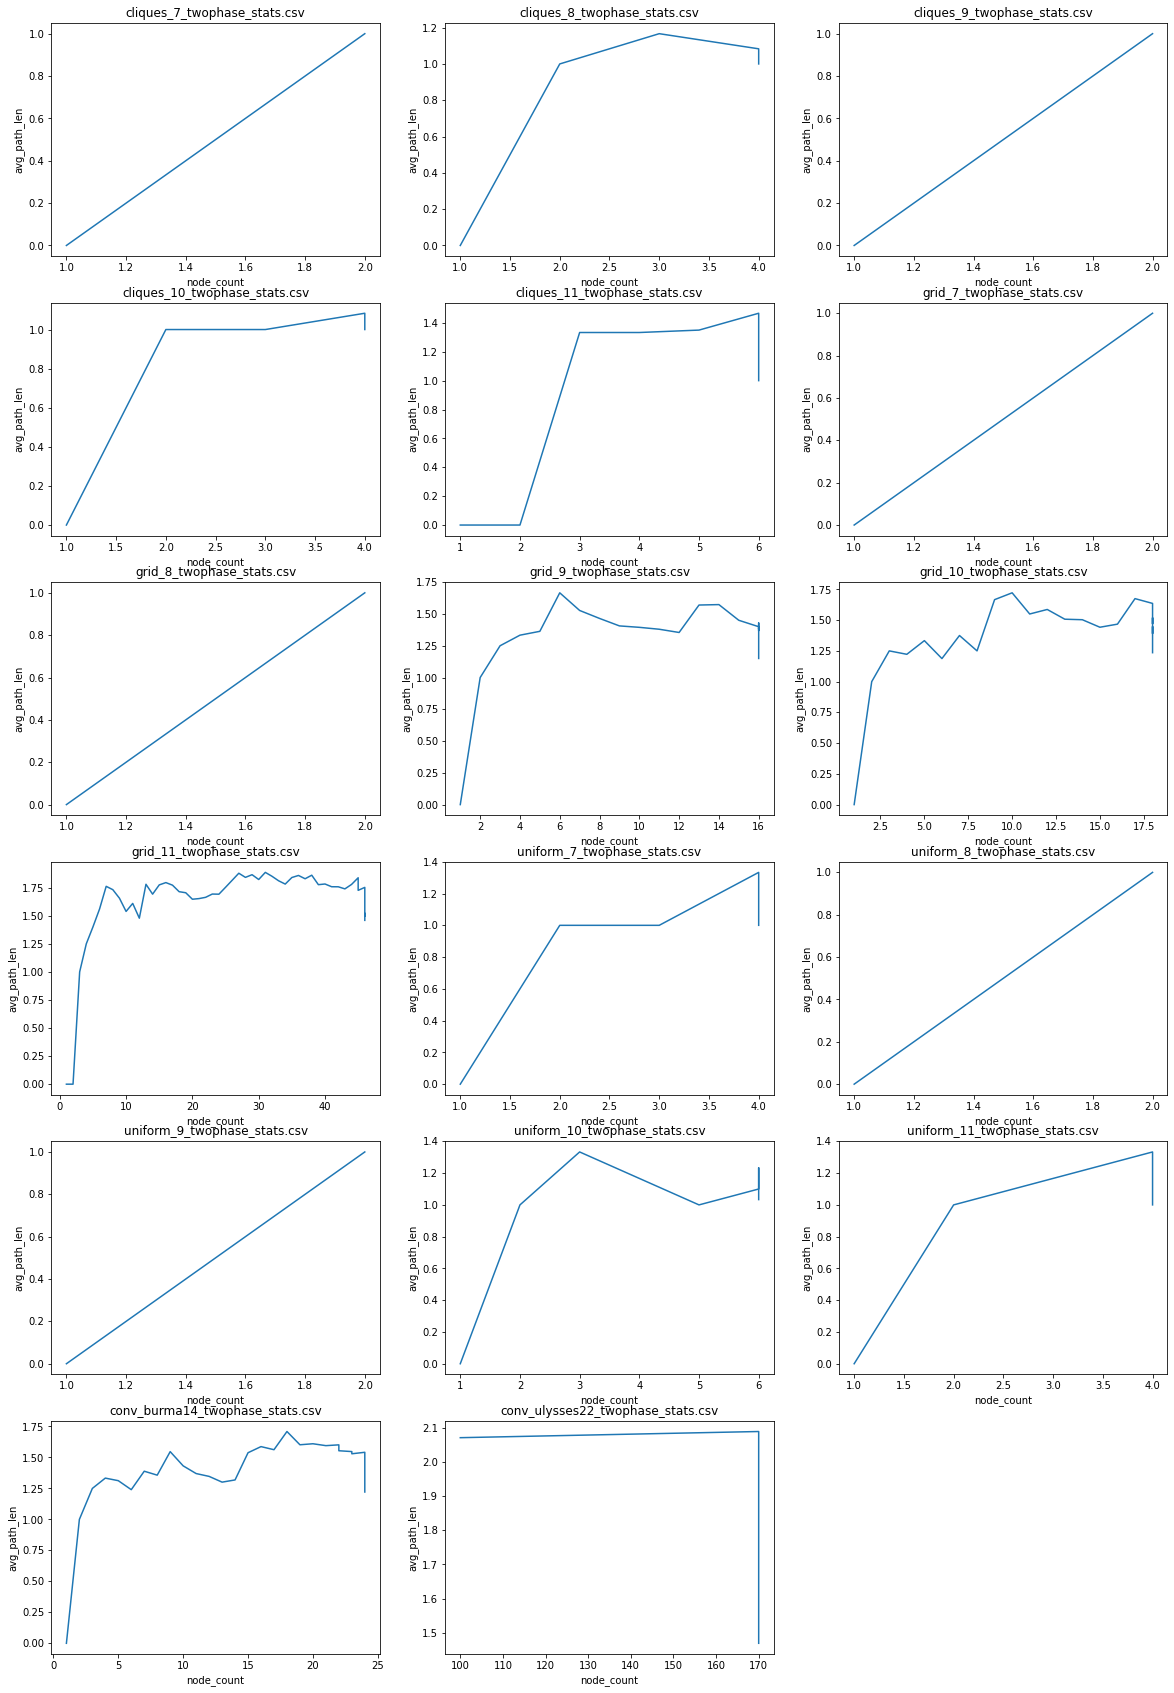

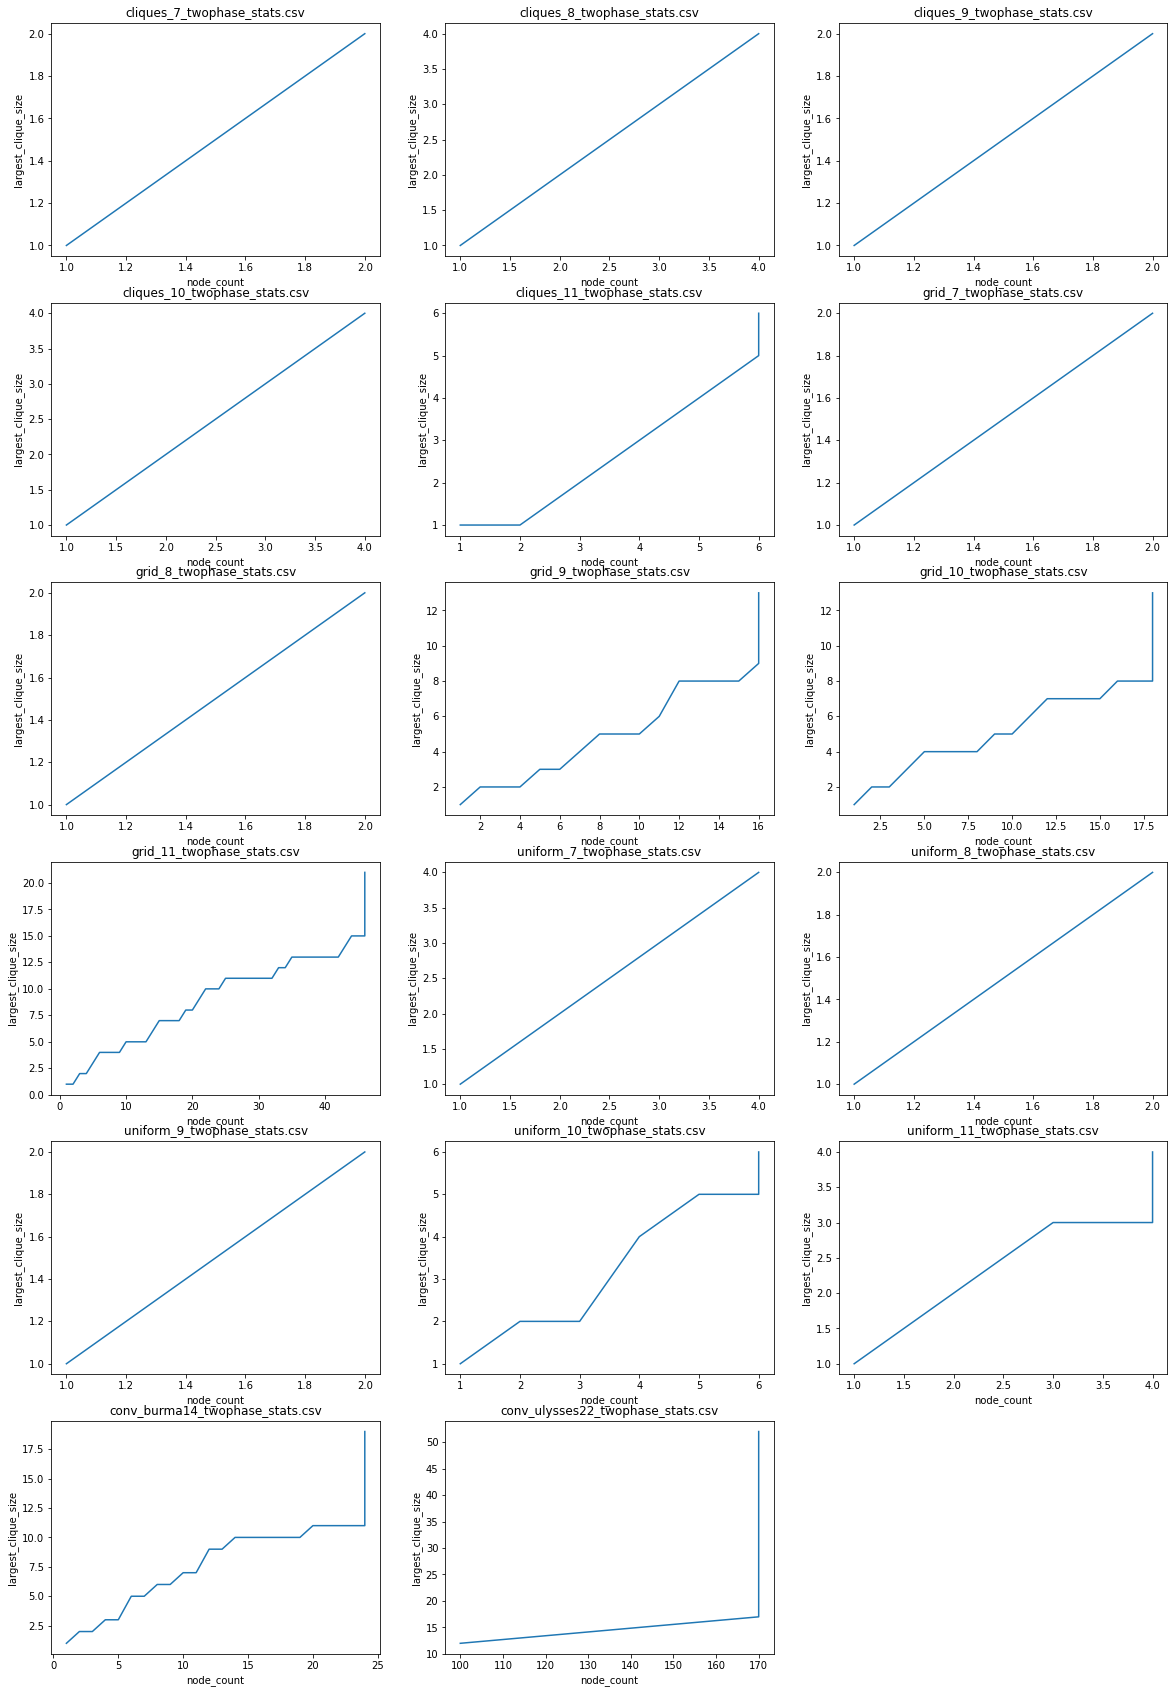

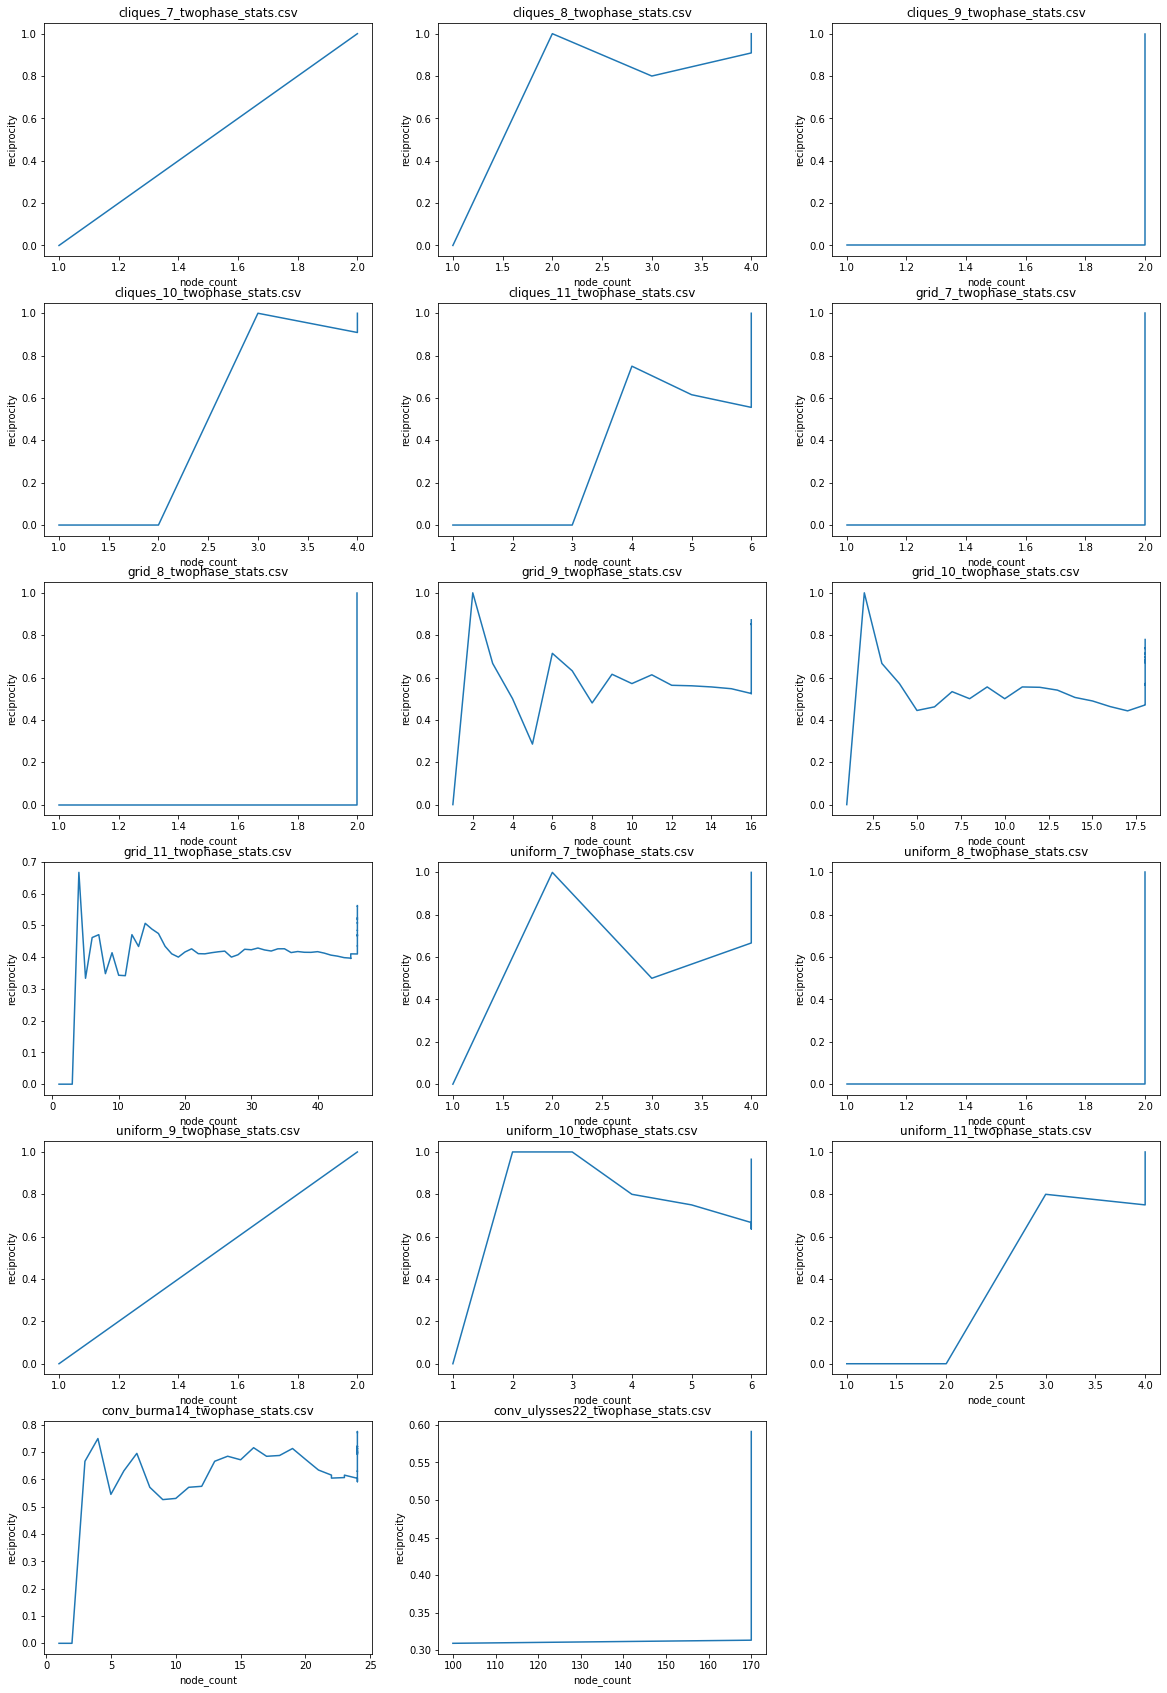

In [10]:
from math import ceil
import math
from pathlib import Path

OUT_DIR = "merged_plots"

columns = list(dfs[files[0]].columns.values)

for column in columns[4:]:
    if column == "node_count":
        continue

    rows = ceil(len(dfs) / 3)
    fig = plt.figure(figsize = (20, 30))

    for i, key in enumerate(dfs):
        df = dfs[key]
        x = df["node_count"]
        y = df[column]
        y=y.fillna(0)
        plt.subplot(rows, 3, i+1)
        plt.ylabel(column)
        plt.xlabel("node_count")
        # plt.xlim(0, 100000)
        plt.title(key.split("/")[-1])
        plt.plot(x,y)

    print(column)
    path = OUT_DIR + "/" + desc + "/"
    p = Path(path)
    p.mkdir(exist_ok=True)

    # plt.show()
    plt.savefig(path + column + ".png")
    # plt.clear()

UWAGA: WYpełnianie NAN zerem avg_go_path len